In [1]:
# Gym stuff
import gym
import gym_anytrading
from stable_baselines3 import PPO

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Reliance.csv')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'SUPERT_7_1.0', 'SUPERTd_7_1.0', 'SUPERTl_7_1.0',
       'SUPERTs_7_1.0', 'SMA_5', 'WMA_10', 'SMA_14', 'WMA_28', 'SMA_44',
       'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2',
       'PSARr_0.02_0.2'],
      dtype='object')

In [5]:
df['Date']

0       1996-01-01 00:00:00+05:30
1       1996-01-02 00:00:00+05:30
2       1996-01-03 00:00:00+05:30
3       1996-01-04 00:00:00+05:30
4       1996-01-05 00:00:00+05:30
                  ...            
6790    2023-01-02 00:00:00+05:30
6791    2023-01-03 00:00:00+05:30
6792    2023-01-04 00:00:00+05:30
6793    2023-01-05 00:00:00+05:30
6794    2023-01-06 00:00:00+05:30
Name: Date, Length: 6795, dtype: object

In [6]:
df.set_index('Date', inplace=True)
df.head()

Open       High        Low      Close  \
Date                                                                    
1996-01-01 00:00:00+05:30  10.439797  10.495815  10.371046  10.477991   
1996-01-02 00:00:00+05:30  10.452527  10.503452  10.320119  10.396508   
1996-01-03 00:00:00+05:30  10.567110  11.048360  10.452527  10.475444   
1996-01-04 00:00:00+05:30  10.376140  10.409242  10.238640  10.378686   
1996-01-05 00:00:00+05:30  10.337946  10.337946  10.218270  10.307390   

                              Volume  Dividends  Stock Splits  SUPERT_7_1.0  \
Date                                                                          
1996-01-01 00:00:00+05:30   48051995        0.0           0.0           0.0   
1996-01-02 00:00:00+05:30   77875009        0.0           0.0           NaN   
1996-01-03 00:00:00+05:30   96602936        0.0           0.0           NaN   
1996-01-04 00:00:00+05:30  100099436        0.0           0.0           NaN   
1996-01-05 00:00:00+05:30   76935930        0.0           0.0           NaN   

                           SUPERTd_7_1.0  SUPERTl_7_1.0  SUPERTs_7_1.0  \
Date                                                                     
1996-01-01 00:00:00+05:30              1            NaN            NaN   
1996-01-02 00:00:00+05:30              1            NaN            NaN   
1996-01-03 00:00:00+05:30              1            NaN            NaN   
1996-01-04 00:00:00+05:30              1            NaN            NaN   
1996-01-05 00:00:00+05:30              1            NaN            NaN   

                               SMA_5  WMA_10  SMA_14  WMA_28  SMA_44  \
Date                                                                   
1996-01-01 00:00:00+05:30        NaN     NaN     NaN     NaN     NaN   
1996-01-02 00:00:00+05:30        NaN     NaN     NaN     NaN     NaN   
1996-01-03 00:00:00+05:30        NaN     NaN     NaN     NaN     NaN   
1996-01-04 00:00:00+05:30        NaN     NaN     NaN     NaN     NaN   
1996-01-05 00:00:00+05:30  10.407204     NaN     NaN     NaN     NaN   

                           PSARl_0.02_0.2  PSARs_0.02_0.2  PSARaf_0.02_0.2  \
Date                                                                         
1996-01-01 00:00:00+05:30             NaN             NaN             0.02   
1996-01-02 00:00:00+05:30       10.320119             NaN             0.02   
1996-01-03 00:00:00+05:30       10.320119             NaN             0.04   
1996-01-04 00:00:00+05:30             NaN        11.04836             0.02   
1996-01-05 00:00:00+05:30             NaN        11.04836             0.04   

                           PSARr_0.02_0.2  
Date                                       
1996-01-01 00:00:00+05:30               0  
1996-01-02 00:00:00+05:30               1  
1996-01-03 00:00:00+05:30               0  
1996-01-04 00:00:00+05:30               1  
1996-01-05 00:00:00+05:30               0

In [7]:
df

Open         High          Low        Close  \
Date                                                                            
1996-01-01 00:00:00+05:30    10.439797    10.495815    10.371046    10.477991   
1996-01-02 00:00:00+05:30    10.452527    10.503452    10.320119    10.396508   
1996-01-03 00:00:00+05:30    10.567110    11.048360    10.452527    10.475444   
1996-01-04 00:00:00+05:30    10.376140    10.409242    10.238640    10.378686   
1996-01-05 00:00:00+05:30    10.337946    10.337946    10.218270    10.307390   
...                                ...          ...          ...          ...   
2023-01-02 00:00:00+05:30  2550.000000  2579.000000  2548.199951  2575.899902   
2023-01-03 00:00:00+05:30  2565.050049  2573.000000  2547.800049  2557.050049   
2023-01-04 00:00:00+05:30  2557.000000  2561.050049  2514.000000  2518.550049   
2023-01-05 00:00:00+05:30  2523.500000  2536.399902  2504.000000  2514.050049   
2023-01-06 00:00:00+05:30  2526.649902  2547.949951  2518.300049  2536.899902   

                              Volume  Dividends  Stock Splits  SUPERT_7_1.0  \
Date                                                                          
1996-01-01 00:00:00+05:30   48051995        0.0           0.0      0.000000   
1996-01-02 00:00:00+05:30   77875009        0.0           0.0           NaN   
1996-01-03 00:00:00+05:30   96602936        0.0           0.0           NaN   
1996-01-04 00:00:00+05:30  100099436        0.0           0.0           NaN   
1996-01-05 00:00:00+05:30   76935930        0.0           0.0           NaN   
...                              ...        ...           ...           ...   
2023-01-02 00:00:00+05:30    2453414        0.0           0.0   2522.412696   
2023-01-03 00:00:00+05:30    3534596        0.0           0.0   2522.412696   
2023-01-04 00:00:00+05:30    4275746        0.0           0.0   2577.947301   
2023-01-05 00:00:00+05:30    6293519        0.0           0.0   2559.476174   
2023-01-06 00:00:00+05:30    2929567        0.0           0.0   2559.476174   

                           SUPERTd_7_1.0  SUPERTl_7_1.0  SUPERTs_7_1.0  \
Date                                                                     
1996-01-01 00:00:00+05:30              1            NaN            NaN   
1996-01-02 00:00:00+05:30              1            NaN            NaN   
1996-01-03 00:00:00+05:30              1            NaN            NaN   
1996-01-04 00:00:00+05:30              1            NaN            NaN   
1996-01-05 00:00:00+05:30              1            NaN            NaN   
...                                  ...            ...            ...   
2023-01-02 00:00:00+05:30              1    2522.412696            NaN   
2023-01-03 00:00:00+05:30              1    2522.412696            NaN   
2023-01-04 00:00:00+05:30             -1            NaN    2577.947301   
2023-01-05 00:00:00+05:30             -1            NaN    2559.476174   
2023-01-06 00:00:00+05:30             -1            NaN    2559.476174   

                                 SMA_5       WMA_10       SMA_14       WMA_28  \
Date                                                                            
1996-01-01 00:00:00+05:30          NaN          NaN          NaN          NaN   
1996-01-02 00:00:00+05:30          NaN          NaN          NaN          NaN   
1996-01-03 00:00:00+05:30          NaN          NaN          NaN          NaN   
1996-01-04 00:00:00+05:30          NaN          NaN          NaN          NaN   
1996-01-05 00:00:00+05:30    10.407204          NaN          NaN          NaN   
...                                ...          ...          ...          ...   
2023-01-02 00:00:00+05:30  2551.109961  2550.232702  2566.046439  2587.494342   
2023-01-03 00:00:00+05:30  2553.579980  2550.316349  2561.871443  2583.454689   
2023-01-04 00:00:00+05:30  2548.400000  2544.577268  2557.600010  2576.814174   
2023-01-05 00:00:00+05:30  2542.550000  2539.219096  2553.917864  2570.107280   
2023-01-06 00:00:

In [8]:
df.rename(columns={'close': 'Close', 'open':'Open', 'low':'Low', 'volume':'Volume'}, inplace=True)

In [9]:
df.shape

(6795, 20)

In [20]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,5000), window_size=5)

In [21]:
env.signal_features.shape


(5000, 2)

In [11]:
df

Open     high      Low    Close  Volume  SUPERT_7_1.0  \
DateTime                                                                        
2022-11-04 09:15:00  7121.60  7192.65  7121.60  7191.00  134427      0.000000   
2022-11-04 09:30:00  7191.00  7221.00  7191.00  7200.00  109590           NaN   
2022-11-04 09:45:00  7196.10  7209.90  7184.05  7196.45   38163           NaN   
2022-11-04 10:00:00  7196.45  7224.90  7195.00  7202.50   42806           NaN   
2022-11-04 10:15:00  7205.00  7205.00  7166.10  7172.00   39409           NaN   
...                      ...      ...      ...      ...     ...           ...   
2023-01-03 14:15:00  6601.00  6624.45  6601.00  6618.50   23805   6596.664018   
2023-01-03 14:30:00  6619.90  6622.90  6615.00  6618.00   10374   6601.991481   
2023-01-03 14:45:00  6618.00  6629.70  6611.00  6618.65   27316   6603.142698   
2023-01-03 15:00:00  6617.95  6621.95  6602.00  6609.90   37035   6603.142698   
2023-01-03 15:15:00  6606.85  6612.00  6593.00  6602.05   39852   6620.299242   

                     SUPERTd_7_1.0  SUPERTl_7_1.0  SUPERTs_7_1.0    SMA_5  \
DateTime                                                                    
2022-11-04 09:15:00              1            NaN            NaN      NaN   
2022-11-04 09:30:00              1            NaN            NaN      NaN   
2022-11-04 09:45:00              1            NaN            NaN      NaN   
2022-11-04 10:00:00              1            NaN            NaN      NaN   
2022-11-04 10:15:00              1            NaN            NaN  7192.39   
...                            ...            ...            ...      ...   
2023-01-03 14:15:00              1    6596.664018            NaN  6611.04   
2023-01-03 14:30:00              1    6601.991481            NaN  6612.50   
2023-01-03 14:45:00              1    6603.142698            NaN  6614.20   
2023-01-03 15:00:00              1    6603.142698            NaN  6613.41   
2023-01-03 15:15:00             -1            NaN    6620.299242  6613.42   

                          WMA_10       SMA_14       WMA_28       SMA_44  \
DateTime                                                                  
2022-11-04 09:15:00          NaN          NaN          NaN          NaN   
2022-11-04 09:30:00          NaN          NaN          NaN          NaN   
2022-11-04 09:45:00          NaN          NaN          NaN          NaN   
2022-11-04 10:00:00          NaN          NaN          NaN          NaN   
2022-11-04 10:15:00          NaN          NaN          NaN          NaN   
...                          ...          ...          ...          ...   
2023-01-03 14:15:00  6606.963636  6608.389286  6607.913793  6578.578409   
2023-01-03 14:30:00  6609.663636  6607.882143  6609.223399  6580.777273   
2023-01-03 14:45:00  6612.192727  6607.367857  6610.415271  6583.188636   
2023-01-03 15:00:00  6612.533636  6606.364286  6610.859236  6585.320455   
2023-01-03 15:15:00  6611.177273  6605.721429  6610.604433  6587.003409   

                     PSARl_0.02_0.2  PSARs_0.02_0.2  PSARaf_0.02_0.2  \
DateTime                                                               
2022-11-04 09:15:00             NaN             NaN             0.02   
2022-11-04 09:30:00     6593.000000             NaN             0.04   
2022-11-04 09:45:00     6618.120000             NaN             0.04   
2022-11-04 10:00:00     6642.235200             NaN             0.06   
2022-11-04 10:15:00     6677.195088             NaN             0.06   
...                             ...             ...              ...   
2023-01-03 14:15:00             NaN     6647.098463             0.02   
2023-01-03 14:30:00             NaN     6645.627494             0.02   
2023-01-03 14:45:00             NaN     6644.185944             0.02   
2023-01-03 15:00:00             NaN     6642.773225             0.02   
2023-01-03 15:15:00             NaN     6641.388761             0.02   

                     PSARr_0.02_0.2  
DateTime         

In [41]:
env.env.reward_range

(-inf, inf)

info {'total_reward': 106.53106403350853, 'total_profit': 7.171812676972237e-08, 'position': 0}


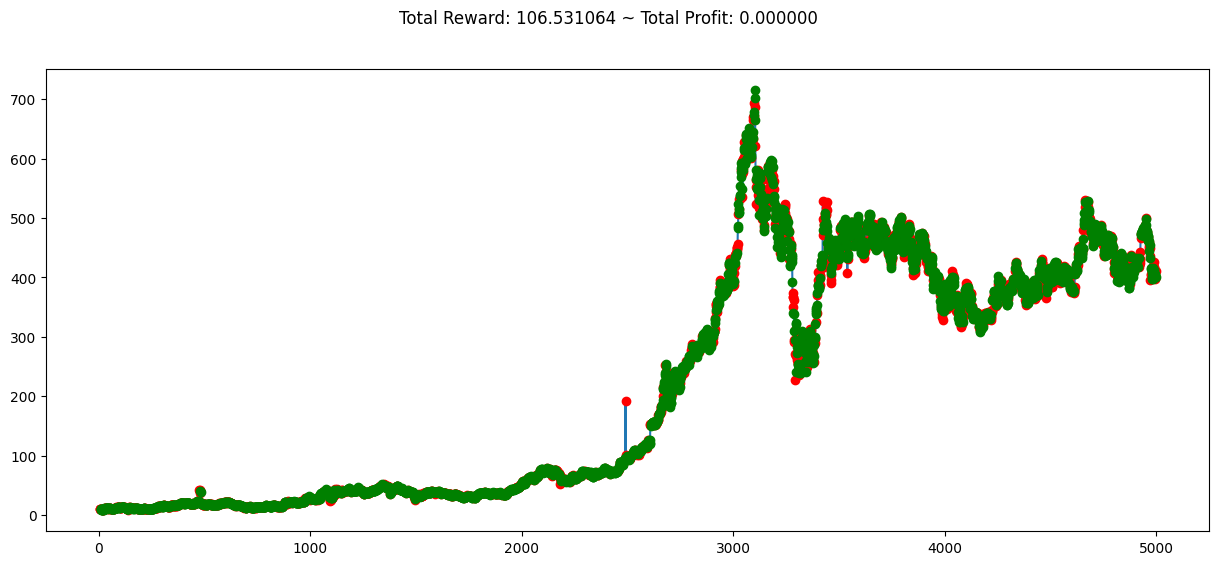

In [38]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [51]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10,5000), window_size=10)
env = DummyVecEnv([env_maker])

In [52]:
df['SUPERTd_7_1.0'].value_counts()

 1    3577
-1    3218
Name: SUPERTd_7_1.0, dtype: int64

In [53]:
import pandas_ta as ta

In [54]:
df['RSI'] = df.ta.rsi(14)

In [55]:
df['PSARr_0.02_0.2'].value_counts()

0    6195
1     600
Name: PSARr_0.02_0.2, dtype: int64

In [56]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'SUPERT_7_1.0', 'SUPERTd_7_1.0', 'SUPERTl_7_1.0', 'SUPERTs_7_1.0',
       'SMA_5', 'WMA_10', 'SMA_14', 'WMA_28', 'SMA_44', 'PSARl_0.02_0.2',
       'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'RSI'],
      dtype='object')

In [57]:
df.fillna(0)

Open         High          Low        Close  \
Date                                                                            
1996-01-01 00:00:00+05:30    10.439797    10.495815    10.371046    10.477991   
1996-01-02 00:00:00+05:30    10.452527    10.503452    10.320119    10.396508   
1996-01-03 00:00:00+05:30    10.567110    11.048360    10.452527    10.475444   
1996-01-04 00:00:00+05:30    10.376140    10.409242    10.238640    10.378686   
1996-01-05 00:00:00+05:30    10.337946    10.337946    10.218270    10.307390   
...                                ...          ...          ...          ...   
2023-01-02 00:00:00+05:30  2550.000000  2579.000000  2548.199951  2575.899902   
2023-01-03 00:00:00+05:30  2565.050049  2573.000000  2547.800049  2557.050049   
2023-01-04 00:00:00+05:30  2557.000000  2561.050049  2514.000000  2518.550049   
2023-01-05 00:00:00+05:30  2523.500000  2536.399902  2504.000000  2514.050049   
2023-01-06 00:00:00+05:30  2526.649902  2547.949951  2518.300049  2536.899902   

                              Volume  Dividends  Stock Splits  SUPERT_7_1.0  \
Date                                                                          
1996-01-01 00:00:00+05:30   48051995        0.0           0.0      0.000000   
1996-01-02 00:00:00+05:30   77875009        0.0           0.0      0.000000   
1996-01-03 00:00:00+05:30   96602936        0.0           0.0      0.000000   
1996-01-04 00:00:00+05:30  100099436        0.0           0.0      0.000000   
1996-01-05 00:00:00+05:30   76935930        0.0           0.0      0.000000   
...                              ...        ...           ...           ...   
2023-01-02 00:00:00+05:30    2453414        0.0           0.0   2522.412696   
2023-01-03 00:00:00+05:30    3534596        0.0           0.0   2522.412696   
2023-01-04 00:00:00+05:30    4275746        0.0           0.0   2577.947301   
2023-01-05 00:00:00+05:30    6293519        0.0           0.0   2559.476174   
2023-01-06 00:00:00+05:30    2929567        0.0           0.0   2559.476174   

                           SUPERTd_7_1.0  SUPERTl_7_1.0  ...        SMA_5  \
Date                                                     ...                
1996-01-01 00:00:00+05:30              1       0.000000  ...     0.000000   
1996-01-02 00:00:00+05:30              1       0.000000  ...     0.000000   
1996-01-03 00:00:00+05:30              1       0.000000  ...     0.000000   
1996-01-04 00:00:00+05:30              1       0.000000  ...     0.000000   
1996-01-05 00:00:00+05:30              1       0.000000  ...    10.407204   
...                                  ...            ...  ...          ...   
2023-01-02 00:00:00+05:30              1    2522.412696  ...  2551.109961   
2023-01-03 00:00:00+05:30              1    2522.412696  ...  2553.579980   
2023-01-04 00:00:00+05:30             -1       0.000000  ...  2548.400000   
2023-01-05 00:00:00+05:30             -1       0.000000  ...  2542.550000   
2023-01-06 00:00:00+05:30             -1       0.000000  ...  2540.489990   

                                WMA_10       SMA_14       WMA_28       SMA_44  \
Date                                                                            
1996-01-01 00:00:00+05:30     0.000000     0.000000     0.000000     0.000000   
1996-01-02 00:00:00+05:30     0.000000     0.000000     0.000000     0.000000   
1996-01-03 00:00:00+05:30     0.000000     0.000000     0.000000     0.000000   
1996-01-04 00:00:00+05:30     0.000000     0.000000     0.000000     0.000000   
1996-01-05 00:00:00+05:30     0.000000     0.000000     0.000000     0.000000   
...                                ...          ...          ...          ...   
2023-01-02 00:00:00+05:30  2550.232702  2566.046439  2587.494342  2603.731834   
2023-01-03 00:00:00+05:30  2550.316349  2561.871443  2583.454689  2604.350014   
2023-01-04 00:00:00+05:30  2544.577268  2557.600010  2576.814174  2603.734109   
2023-01-05 00:00:00+05:30  2539.219096  2553.917864  2570.1

In [58]:
env.df.loc[:, ['Low', 'Volume','SMA_5', 'RSI', 'SUPERTd_7_1.0', 'PSARr_0.02_0.2']].fillna(0).to_numpy()

AttributeError: 'DummyVecEnv' object has no attribute 'df'

In [59]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA_5', 'RSI', 'SUPERTd_7_1.0', 'PSARr_0.02_0.2']].fillna(0).to_numpy()[start:end]
    return prices, signal_features

In [67]:
from gym_anytrading.envs import StocksEnv

class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,5000))

In [68]:
env2.signal_features

array([[ 1.03710464e+01,  4.80519950e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03201192e+01,  7.78750090e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.04525269e+01,  9.66029360e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.94652159e+02,  5.36476900e+06,  4.04600623e+02,
         3.75337633e+01, -1.00000000e+00,  0.00000000e+00],
       [ 3.93413934e+02,  7.31637400e+06,  4.01043170e+02,
         3.99135617e+01, -1.00000000e+00,  1.00000000e+00],
       [ 3.99319180e+02,  7.98026400e+06,  4.02414697e+02,
         4.71081063e+01,  1.00000000e+00,  0.00000000e+00]])

In [69]:
import wandb
from wandb.integration.sb3 import WandbCallback

In [70]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [71]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-Latest",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=True,  # optional
)

model_with_signals_A2C = A2C(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_A2C.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Logging to runs/l57u9tn8/A2C_1
------------------------------------
| time/                 |          |
|    fps                | 2744     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00782 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.417    |
|    value_loss         | 0.649    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0.023    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -

------------------------------------
| time/                 |          |
|    fps                | 2895     |
|    iterations         | 1700     |
|    time_elapsed       | 2        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | -0.0233  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 10.7     |
|    value_loss         | 269      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2902     |
|    iterations         | 1800     |
|    time_elapsed       | 3        |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.59    |
|    explained_variance | 0.00424  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -1.55    |
|    value_loss         | 8.74     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2916      |
|    iterations         | 3300      |
|    time_elapsed       | 5         |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.493    |
|    explained_variance | -0.000107 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -0.283    |
|    value_loss         | 0.168     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2918     |
|    iterations         | 3400     |
|    time_elapsed       | 5        |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.413   |
|    explained_variance | -12.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -0.0224  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2918     |
|    iterations         | 4900     |
|    time_elapsed       | 8        |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | -0.0782  |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | -5.8     |
|    value_loss         | 129      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2921     |
|    iterations         | 5000     |
|    time_elapsed       | 8        |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.657   |
|    explained_variance | -0.585   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.0546   |
|    value_loss         | 0.0109   |
-

------------------------------------
| time/                 |          |
|    fps                | 2944     |
|    iterations         | 6500     |
|    time_elapsed       | 11       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | 0.00846  |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | -1.9     |
|    value_loss         | 6.74     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2945      |
|    iterations         | 6600      |
|    time_elapsed       | 11        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.59     |
|    explained_variance | -0.000287 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -11.5     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2945     |
|    iterations         | 8100     |
|    time_elapsed       | 13       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.393   |
|    explained_variance | -5.61    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.00243  |
|    value_loss         | 0.00133  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2947     |
|    iterations         | 8200     |
|    time_elapsed       | 13       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.507   |
|    explained_variance | -0.0196  |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 2.57     |
|    value_loss         | 32.4     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2956      |
|    iterations         | 9700      |
|    time_elapsed       | 16        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.0997   |
|    explained_variance | -0.000638 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | 0.12      |
|    value_loss         | 136       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2958     |
|    iterations         | 9800     |
|    time_elapsed       | 16       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.443   |
|    explained_variance | -0.804   |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | -1.64    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2959     |
|    iterations         | 11300    |
|    time_elapsed       | 19       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0.0941   |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 0.0196   |
|    value_loss         | 0.443    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2960     |
|    iterations         | 11400    |
|    time_elapsed       | 19       |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -0.374   |
|    explained_variance | 0.00902  |
|    learning_rate      | 0.0007   |
|    n_updates          | 11399    |
|    policy_loss        | 0.425    |
|    value_loss         | 1.54     |
-

------------------------------------
| time/                 |          |
|    fps                | 2941     |
|    iterations         | 12900    |
|    time_elapsed       | 21       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.263   |
|    explained_variance | -0.0299  |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 2.61     |
|    value_loss         | 121      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2938      |
|    iterations         | 13000     |
|    time_elapsed       | 22        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.0408   |
|    explained_variance | -204      |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -0.000302 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2941     |
|    iterations         | 14500    |
|    time_elapsed       | 24       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 0.00187  |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | 0.129    |
|    value_loss         | 117      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2942      |
|    iterations         | 14600     |
|    time_elapsed       | 24        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.259    |
|    explained_variance | -9.54e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | 0.171     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2888     |
|    iterations         | 16100    |
|    time_elapsed       | 27       |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.485   |
|    explained_variance | 0.00374  |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | 0.0163   |
|    value_loss         | 0.0102   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2889     |
|    iterations         | 16200    |
|    time_elapsed       | 28       |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0.321    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | -0.125   |
|    value_loss         | 0.0292   |
-

------------------------------------
| time/                 |          |
|    fps                | 2898     |
|    iterations         | 17700    |
|    time_elapsed       | 30       |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0.145    |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 0.0743   |
|    value_loss         | 0.686    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2899      |
|    iterations         | 17800     |
|    time_elapsed       | 30        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.269    |
|    explained_variance | -2.03e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 2.66      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2909     |
|    iterations         | 19300    |
|    time_elapsed       | 33       |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.245   |
|    explained_variance | -0.227   |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | 0.0404   |
|    value_loss         | 0.00873  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2910     |
|    iterations         | 19400    |
|    time_elapsed       | 33       |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | -1.57    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | -0.12    |
|    value_loss         | 6.09     |
-

------------------------------------
| time/                 |          |
|    fps                | 2871     |
|    iterations         | 20900    |
|    time_elapsed       | 36       |
|    total_timesteps    | 104500   |
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | -0.109   |
|    learning_rate      | 0.0007   |
|    n_updates          | 20899    |
|    policy_loss        | -0.0275  |
|    value_loss         | 0.291    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2868     |
|    iterations         | 21000    |
|    time_elapsed       | 36       |
|    total_timesteps    | 105000   |
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | -2.86    |
|    learning_rate      | 0.0007   |
|    n_updates          | 20999    |
|    policy_loss        | 0.0335   |
|    value_loss         | 0.745    |
-

------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 22500    |
|    time_elapsed       | 39       |
|    total_timesteps    | 112500   |
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | -0.182   |
|    learning_rate      | 0.0007   |
|    n_updates          | 22499    |
|    policy_loss        | -0.00468 |
|    value_loss         | 0.000665 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2846     |
|    iterations         | 22600    |
|    time_elapsed       | 39       |
|    total_timesteps    | 113000   |
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | -0.0952  |
|    learning_rate      | 0.0007   |
|    n_updates          | 22599    |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.11     |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 24100    |
|    time_elapsed       | 42       |
|    total_timesteps    | 120500   |
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0.0279   |
|    learning_rate      | 0.0007   |
|    n_updates          | 24099    |
|    policy_loss        | -0.0965  |
|    value_loss         | 0.0868   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 24200    |
|    time_elapsed       | 42       |
|    total_timesteps    | 121000   |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | -0.91    |
|    learning_rate      | 0.0007   |
|    n_updates          | 24199    |
|    policy_loss        | 0.027    |
|    value_loss         | 0.207    |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 25700    |
|    time_elapsed       | 45       |
|    total_timesteps    | 128500   |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0.0391   |
|    learning_rate      | 0.0007   |
|    n_updates          | 25699    |
|    policy_loss        | 0.467    |
|    value_loss         | 6.56     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2849     |
|    iterations         | 25800    |
|    time_elapsed       | 45       |
|    total_timesteps    | 129000   |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | -0.603   |
|    learning_rate      | 0.0007   |
|    n_updates          | 25799    |
|    policy_loss        | -0.00457 |
|    value_loss         | 0.013    |
-

------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 27300    |
|    time_elapsed       | 48       |
|    total_timesteps    | 136500   |
| train/                |          |
|    entropy_loss       | -0.0564  |
|    explained_variance | 0.304    |
|    learning_rate      | 0.0007   |
|    n_updates          | 27299    |
|    policy_loss        | -0.00749 |
|    value_loss         | 0.000276 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2842     |
|    iterations         | 27400    |
|    time_elapsed       | 48       |
|    total_timesteps    | 137000   |
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 0.0315   |
|    learning_rate      | 0.0007   |
|    n_updates          | 27399    |
|    policy_loss        | -0.352   |
|    value_loss         | 0.717    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2836      |
|    iterations         | 28900     |
|    time_elapsed       | 50        |
|    total_timesteps    | 144500    |
| train/                |           |
|    entropy_loss       | -0.0331   |
|    explained_variance | -2.22     |
|    learning_rate      | 0.0007    |
|    n_updates          | 28899     |
|    policy_loss        | -8.02e-05 |
|    value_loss         | 0.000546  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2837     |
|    iterations         | 29000    |
|    time_elapsed       | 51       |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.0125  |
|    explained_variance | -2.09    |
|    learning_rate      | 0.0007   |
|    n_updates          | 28999    |
|    policy_loss        | 0.00282  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 30500    |
|    time_elapsed       | 53       |
|    total_timesteps    | 152500   |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0.0332   |
|    learning_rate      | 0.0007   |
|    n_updates          | 30499    |
|    policy_loss        | -0.00149 |
|    value_loss         | 2.77     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2824     |
|    iterations         | 30600    |
|    time_elapsed       | 54       |
|    total_timesteps    | 153000   |
| train/                |          |
|    entropy_loss       | -0.0228  |
|    explained_variance | 0.00805  |
|    learning_rate      | 0.0007   |
|    n_updates          | 30599    |
|    policy_loss        | 0.0176   |
|    value_loss         | 11.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 32100    |
|    time_elapsed       | 56       |
|    total_timesteps    | 160500   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -0.226   |
|    learning_rate      | 0.0007   |
|    n_updates          | 32099    |
|    policy_loss        | 0.00726  |
|    value_loss         | 0.0149   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2822      |
|    iterations         | 32200     |
|    time_elapsed       | 57        |
|    total_timesteps    | 161000    |
| train/                |           |
|    entropy_loss       | -0.0633   |
|    explained_variance | -0.14     |
|    learning_rate      | 0.0007    |
|    n_updates          | 32199     |
|    policy_loss        | -0.000466 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 33700    |
|    time_elapsed       | 59       |
|    total_timesteps    | 168500   |
| train/                |          |
|    entropy_loss       | -0.0934  |
|    explained_variance | -2.21    |
|    learning_rate      | 0.0007   |
|    n_updates          | 33699    |
|    policy_loss        | -0.124   |
|    value_loss         | 14.7     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2832      |
|    iterations         | 33800     |
|    time_elapsed       | 59        |
|    total_timesteps    | 169000    |
| train/                |           |
|    entropy_loss       | -0.0333   |
|    explained_variance | -0.000894 |
|    learning_rate      | 0.0007    |
|    n_updates          | 33799     |
|    policy_loss        | 0.0159    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2827     |
|    iterations         | 35300    |
|    time_elapsed       | 62       |
|    total_timesteps    | 176500   |
| train/                |          |
|    entropy_loss       | -0.081   |
|    explained_variance | -3.65    |
|    learning_rate      | 0.0007   |
|    n_updates          | 35299    |
|    policy_loss        | 0.000324 |
|    value_loss         | 0.00131  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2828     |
|    iterations         | 35400    |
|    time_elapsed       | 62       |
|    total_timesteps    | 177000   |
| train/                |          |
|    entropy_loss       | -0.0936  |
|    explained_variance | -0.133   |
|    learning_rate      | 0.0007   |
|    n_updates          | 35399    |
|    policy_loss        | 0.0173   |
|    value_loss         | 3.19     |
-

------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 36900    |
|    time_elapsed       | 65       |
|    total_timesteps    | 184500   |
| train/                |          |
|    entropy_loss       | -0.442   |
|    explained_variance | 0.00701  |
|    learning_rate      | 0.0007   |
|    n_updates          | 36899    |
|    policy_loss        | -1.29    |
|    value_loss         | 42.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 37000    |
|    time_elapsed       | 65       |
|    total_timesteps    | 185000   |
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0.000538 |
|    learning_rate      | 0.0007   |
|    n_updates          | 36999    |
|    policy_loss        | -4.54    |
|    value_loss         | 64       |
-

------------------------------------
| time/                 |          |
|    fps                | 2807     |
|    iterations         | 38500    |
|    time_elapsed       | 68       |
|    total_timesteps    | 192500   |
| train/                |          |
|    entropy_loss       | -0.0776  |
|    explained_variance | 0.00392  |
|    learning_rate      | 0.0007   |
|    n_updates          | 38499    |
|    policy_loss        | -0.228   |
|    value_loss         | 448      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2807      |
|    iterations         | 38600     |
|    time_elapsed       | 68        |
|    total_timesteps    | 193000    |
| train/                |           |
|    entropy_loss       | -0.348    |
|    explained_variance | -0.000695 |
|    learning_rate      | 0.0007    |
|    n_updates          | 38599     |
|    policy_loss        | -3.4      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 40100    |
|    time_elapsed       | 71       |
|    total_timesteps    | 200500   |
| train/                |          |
|    entropy_loss       | -0.0226  |
|    explained_variance | -5.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 40099    |
|    policy_loss        | 0.00472  |
|    value_loss         | 1.2      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 40200    |
|    time_elapsed       | 71       |
|    total_timesteps    | 201000   |
| train/                |          |
|    entropy_loss       | -0.064   |
|    explained_variance | -0.133   |
|    learning_rate      | 0.0007   |
|    n_updates          | 40199    |
|    policy_loss        | -0.00303 |
|    value_loss         | 0.444    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2800      |
|    iterations         | 41700     |
|    time_elapsed       | 74        |
|    total_timesteps    | 208500    |
| train/                |           |
|    entropy_loss       | -0.247    |
|    explained_variance | -1.18e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 41699     |
|    policy_loss        | -0.413    |
|    value_loss         | 3.54      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 41800    |
|    time_elapsed       | 74       |
|    total_timesteps    | 209000   |
| train/                |          |
|    entropy_loss       | -0.0937  |
|    explained_variance | -0.46    |
|    learning_rate      | 0.0007   |
|    n_updates          | 41799    |
|    policy_loss        | 0.223    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2803     |
|    iterations         | 43300    |
|    time_elapsed       | 77       |
|    total_timesteps    | 216500   |
| train/                |          |
|    entropy_loss       | -0.0405  |
|    explained_variance | -0.0112  |
|    learning_rate      | 0.0007   |
|    n_updates          | 43299    |
|    policy_loss        | 0.0515   |
|    value_loss         | 21.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2802     |
|    iterations         | 43400    |
|    time_elapsed       | 77       |
|    total_timesteps    | 217000   |
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0.124    |
|    learning_rate      | 0.0007   |
|    n_updates          | 43399    |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.238    |
-

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 44900    |
|    time_elapsed       | 80       |
|    total_timesteps    | 224500   |
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0.00624  |
|    learning_rate      | 0.0007   |
|    n_updates          | 44899    |
|    policy_loss        | 0.056    |
|    value_loss         | 0.199    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 45000    |
|    time_elapsed       | 80       |
|    total_timesteps    | 225000   |
| train/                |          |
|    entropy_loss       | -0.0271  |
|    explained_variance | -0.251   |
|    learning_rate      | 0.0007   |
|    n_updates          | 44999    |
|    policy_loss        | 0.00464  |
|    value_loss         | 0.822    |
-

------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 46500    |
|    time_elapsed       | 83       |
|    total_timesteps    | 232500   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -0.00165 |
|    learning_rate      | 0.0007   |
|    n_updates          | 46499    |
|    policy_loss        | 1.78     |
|    value_loss         | 308      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 46600    |
|    time_elapsed       | 83       |
|    total_timesteps    | 233000   |
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | -20.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 46599    |
|    policy_loss        | -0.0225  |
|    value_loss         | 0.0429   |
-

------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 48100    |
|    time_elapsed       | 86       |
|    total_timesteps    | 240500   |
| train/                |          |
|    entropy_loss       | -0.0491  |
|    explained_variance | -66.7    |
|    learning_rate      | 0.0007   |
|    n_updates          | 48099    |
|    policy_loss        | 0.00103  |
|    value_loss         | 0.00957  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2790      |
|    iterations         | 48200     |
|    time_elapsed       | 86        |
|    total_timesteps    | 241000    |
| train/                |           |
|    entropy_loss       | -0.00151  |
|    explained_variance | 0.126     |
|    learning_rate      | 0.0007    |
|    n_updates          | 48199     |
|    policy_loss        | -2.52e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2796     |
|    iterations         | 49700    |
|    time_elapsed       | 88       |
|    total_timesteps    | 248500   |
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | -6.09    |
|    learning_rate      | 0.0007   |
|    n_updates          | 49699    |
|    policy_loss        | -0.105   |
|    value_loss         | 0.0241   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2797     |
|    iterations         | 49800    |
|    time_elapsed       | 89       |
|    total_timesteps    | 249000   |
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0.128    |
|    learning_rate      | 0.0007   |
|    n_updates          | 49799    |
|    policy_loss        | -0.118   |
|    value_loss         | 5.14     |
-

------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 51300    |
|    time_elapsed       | 91       |
|    total_timesteps    | 256500   |
| train/                |          |
|    entropy_loss       | -0.0305  |
|    explained_variance | -2.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 51299    |
|    policy_loss        | 0.000468 |
|    value_loss         | 0.0264   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2799     |
|    iterations         | 51400    |
|    time_elapsed       | 91       |
|    total_timesteps    | 257000   |
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 0.00237  |
|    learning_rate      | 0.0007   |
|    n_updates          | 51399    |
|    policy_loss        | 0.189    |
|    value_loss         | 52       |
-

-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 52900     |
|    time_elapsed       | 94        |
|    total_timesteps    | 264500    |
| train/                |           |
|    entropy_loss       | -0.0367   |
|    explained_variance | 0.497     |
|    learning_rate      | 0.0007    |
|    n_updates          | 52899     |
|    policy_loss        | -0.000199 |
|    value_loss         | 0.0214    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2786      |
|    iterations         | 53000     |
|    time_elapsed       | 95        |
|    total_timesteps    | 265000    |
| train/                |           |
|    entropy_loss       | -0.0753   |
|    explained_variance | -5.34e+06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 52999     |
|    policy_loss        | -0.0196   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 54500    |
|    time_elapsed       | 97       |
|    total_timesteps    | 272500   |
| train/                |          |
|    entropy_loss       | -0.0494  |
|    explained_variance | -0.0746  |
|    learning_rate      | 0.0007   |
|    n_updates          | 54499    |
|    policy_loss        | -0.00168 |
|    value_loss         | 6.14     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 54600    |
|    time_elapsed       | 98       |
|    total_timesteps    | 273000   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.121    |
|    learning_rate      | 0.0007   |
|    n_updates          | 54599    |
|    policy_loss        | -0.604   |
|    value_loss         | 20.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 56100    |
|    time_elapsed       | 100      |
|    total_timesteps    | 280500   |
| train/                |          |
|    entropy_loss       | -0.0167  |
|    explained_variance | 0.0724   |
|    learning_rate      | 0.0007   |
|    n_updates          | 56099    |
|    policy_loss        | 9.71e-05 |
|    value_loss         | 0.238    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 56200    |
|    time_elapsed       | 101      |
|    total_timesteps    | 281000   |
| train/                |          |
|    entropy_loss       | -0.294   |
|    explained_variance | -0.574   |
|    learning_rate      | 0.0007   |
|    n_updates          | 56199    |
|    policy_loss        | 0.0399   |
|    value_loss         | 0.293    |
-

------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 57700    |
|    time_elapsed       | 103      |
|    total_timesteps    | 288500   |
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0.0674   |
|    learning_rate      | 0.0007   |
|    n_updates          | 57699    |
|    policy_loss        | 0.509    |
|    value_loss         | 1.92     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2777     |
|    iterations         | 57800    |
|    time_elapsed       | 104      |
|    total_timesteps    | 289000   |
| train/                |          |
|    entropy_loss       | -0.0682  |
|    explained_variance | -0.0144  |
|    learning_rate      | 0.0007   |
|    n_updates          | 57799    |
|    policy_loss        | -0.0036  |
|    value_loss         | 52.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 59300    |
|    time_elapsed       | 106      |
|    total_timesteps    | 296500   |
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 0.0837   |
|    learning_rate      | 0.0007   |
|    n_updates          | 59299    |
|    policy_loss        | 0.938    |
|    value_loss         | 2.93     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2778      |
|    iterations         | 59400     |
|    time_elapsed       | 106       |
|    total_timesteps    | 297000    |
| train/                |           |
|    entropy_loss       | -0.000188 |
|    explained_variance | 0.0246    |
|    learning_rate      | 0.0007    |
|    n_updates          | 59399     |
|    policy_loss        | 1.27e-06  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 60900    |
|    time_elapsed       | 109      |
|    total_timesteps    | 304500   |
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | -0.361   |
|    learning_rate      | 0.0007   |
|    n_updates          | 60899    |
|    policy_loss        | -0.0425  |
|    value_loss         | 0.0343   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 61000    |
|    time_elapsed       | 109      |
|    total_timesteps    | 305000   |
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | -0.166   |
|    learning_rate      | 0.0007   |
|    n_updates          | 60999    |
|    policy_loss        | -0.167   |
|    value_loss         | 0.384    |
-

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 62500    |
|    time_elapsed       | 112      |
|    total_timesteps    | 312500   |
| train/                |          |
|    entropy_loss       | -0.0268  |
|    explained_variance | 0.000959 |
|    learning_rate      | 0.0007   |
|    n_updates          | 62499    |
|    policy_loss        | -0.0216  |
|    value_loss         | 18.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 62600    |
|    time_elapsed       | 112      |
|    total_timesteps    | 313000   |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0.029    |
|    learning_rate      | 0.0007   |
|    n_updates          | 62599    |
|    policy_loss        | 0.389    |
|    value_loss         | 33.3     |
-

------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 64100    |
|    time_elapsed       | 115      |
|    total_timesteps    | 320500   |
| train/                |          |
|    entropy_loss       | -0.00311 |
|    explained_variance | -0.192   |
|    learning_rate      | 0.0007   |
|    n_updates          | 64099    |
|    policy_loss        | 0.000767 |
|    value_loss         | 2.67     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 64200    |
|    time_elapsed       | 115      |
|    total_timesteps    | 321000   |
| train/                |          |
|    entropy_loss       | -0.0401  |
|    explained_variance | 0.00268  |
|    learning_rate      | 0.0007   |
|    n_updates          | 64199    |
|    policy_loss        | -0.00765 |
|    value_loss         | 0.547    |
-

------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 65700    |
|    time_elapsed       | 118      |
|    total_timesteps    | 328500   |
| train/                |          |
|    entropy_loss       | -0.0101  |
|    explained_variance | -5.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 65699    |
|    policy_loss        | 9.44e-05 |
|    value_loss         | 0.0149   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 65800    |
|    time_elapsed       | 118      |
|    total_timesteps    | 329000   |
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | -0.00407 |
|    learning_rate      | 0.0007   |
|    n_updates          | 65799    |
|    policy_loss        | -3.9     |
|    value_loss         | 364      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2768      |
|    iterations         | 67300     |
|    time_elapsed       | 121       |
|    total_timesteps    | 336500    |
| train/                |           |
|    entropy_loss       | -0.0174   |
|    explained_variance | -0.313    |
|    learning_rate      | 0.0007    |
|    n_updates          | 67299     |
|    policy_loss        | -2.08e-05 |
|    value_loss         | 0.0545    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 67400    |
|    time_elapsed       | 121      |
|    total_timesteps    | 337000   |
| train/                |          |
|    entropy_loss       | -0.0146  |
|    explained_variance | -0.0285  |
|    learning_rate      | 0.0007   |
|    n_updates          | 67399    |
|    policy_loss        | 0.0408   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2769      |
|    iterations         | 68900     |
|    time_elapsed       | 124       |
|    total_timesteps    | 344500    |
| train/                |           |
|    entropy_loss       | -6.83e-06 |
|    explained_variance | -3.63     |
|    learning_rate      | 0.0007    |
|    n_updates          | 68899     |
|    policy_loss        | -6.59e-08 |
|    value_loss         | 0.0106    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 69000    |
|    time_elapsed       | 124      |
|    total_timesteps    | 345000   |
| train/                |          |
|    entropy_loss       | -0.203   |
|    explained_variance | -0.0969  |
|    learning_rate      | 0.0007   |
|    n_updates          | 68999    |
|    policy_loss        | -0.0969  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 70500    |
|    time_elapsed       | 127      |
|    total_timesteps    | 352500   |
| train/                |          |
|    entropy_loss       | -0.00603 |
|    explained_variance | -3.64    |
|    learning_rate      | 0.0007   |
|    n_updates          | 70499    |
|    policy_loss        | 3.17e-05 |
|    value_loss         | 0.00719  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 70600    |
|    time_elapsed       | 127      |
|    total_timesteps    | 353000   |
| train/                |          |
|    entropy_loss       | -0.0102  |
|    explained_variance | -0.0673  |
|    learning_rate      | 0.0007   |
|    n_updates          | 70599    |
|    policy_loss        | -0.0026  |
|    value_loss         | 1.97     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2773      |
|    iterations         | 72100     |
|    time_elapsed       | 129       |
|    total_timesteps    | 360500    |
| train/                |           |
|    entropy_loss       | -0.0059   |
|    explained_variance | -0.697    |
|    learning_rate      | 0.0007    |
|    n_updates          | 72099     |
|    policy_loss        | -0.000291 |
|    value_loss         | 0.112     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 72200    |
|    time_elapsed       | 130      |
|    total_timesteps    | 361000   |
| train/                |          |
|    entropy_loss       | -0.0417  |
|    explained_variance | 0.00361  |
|    learning_rate      | 0.0007   |
|    n_updates          | 72199    |
|    policy_loss        | 0.00186  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 73700    |
|    time_elapsed       | 133      |
|    total_timesteps    | 368500   |
| train/                |          |
|    entropy_loss       | -0.083   |
|    explained_variance | -0.0644  |
|    learning_rate      | 0.0007   |
|    n_updates          | 73699    |
|    policy_loss        | -0.00714 |
|    value_loss         | 13.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 73800    |
|    time_elapsed       | 133      |
|    total_timesteps    | 369000   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -0.0103  |
|    learning_rate      | 0.0007   |
|    n_updates          | 73799    |
|    policy_loss        | -0.547   |
|    value_loss         | 89.9     |
-

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 75300    |
|    time_elapsed       | 135      |
|    total_timesteps    | 376500   |
| train/                |          |
|    entropy_loss       | -0.0257  |
|    explained_variance | 0.0903   |
|    learning_rate      | 0.0007   |
|    n_updates          | 75299    |
|    policy_loss        | -0.00324 |
|    value_loss         | 0.196    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 75400    |
|    time_elapsed       | 136      |
|    total_timesteps    | 377000   |
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | -0.0299  |
|    learning_rate      | 0.0007   |
|    n_updates          | 75399    |
|    policy_loss        | 0.877    |
|    value_loss         | 93.1     |
-

------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 76900    |
|    time_elapsed       | 138      |
|    total_timesteps    | 384500   |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | -0.81    |
|    learning_rate      | 0.0007   |
|    n_updates          | 76899    |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.0208   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2768      |
|    iterations         | 77000     |
|    time_elapsed       | 139       |
|    total_timesteps    | 385000    |
| train/                |           |
|    entropy_loss       | -0.000188 |
|    explained_variance | -2.97     |
|    learning_rate      | 0.0007    |
|    n_updates          | 76999     |
|    policy_loss        | -6.5e-08  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 78500    |
|    time_elapsed       | 141      |
|    total_timesteps    | 392500   |
| train/                |          |
|    entropy_loss       | -0.0853  |
|    explained_variance | 0.249    |
|    learning_rate      | 0.0007   |
|    n_updates          | 78499    |
|    policy_loss        | 0.402    |
|    value_loss         | 97.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 78600    |
|    time_elapsed       | 141      |
|    total_timesteps    | 393000   |
| train/                |          |
|    entropy_loss       | -0.00954 |
|    explained_variance | 0.0304   |
|    learning_rate      | 0.0007   |
|    n_updates          | 78599    |
|    policy_loss        | -0.00724 |
|    value_loss         | 18.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 80100    |
|    time_elapsed       | 144      |
|    total_timesteps    | 400500   |
| train/                |          |
|    entropy_loss       | -0.00242 |
|    explained_variance | -0.0214  |
|    learning_rate      | 0.0007   |
|    n_updates          | 80099    |
|    policy_loss        | 0.000308 |
|    value_loss         | 0.924    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 80200    |
|    time_elapsed       | 144      |
|    total_timesteps    | 401000   |
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | -0.0551  |
|    learning_rate      | 0.0007   |
|    n_updates          | 80199    |
|    policy_loss        | 0.012    |
|    value_loss         | 0.163    |
-

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 81700    |
|    time_elapsed       | 146      |
|    total_timesteps    | 408500   |
| train/                |          |
|    entropy_loss       | -0.0333  |
|    explained_variance | 0.00502  |
|    learning_rate      | 0.0007   |
|    n_updates          | 81699    |
|    policy_loss        | 0.00319  |
|    value_loss         | 5.66     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 81800    |
|    time_elapsed       | 147      |
|    total_timesteps    | 409000   |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | -15.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 81799    |
|    policy_loss        | -0.00789 |
|    value_loss         | 0.0279   |
-

------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 83300    |
|    time_elapsed       | 149      |
|    total_timesteps    | 416500   |
| train/                |          |
|    entropy_loss       | -0.0739  |
|    explained_variance | 0.115    |
|    learning_rate      | 0.0007   |
|    n_updates          | 83299    |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.677    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 83400    |
|    time_elapsed       | 149      |
|    total_timesteps    | 417000   |
| train/                |          |
|    entropy_loss       | -0.0537  |
|    explained_variance | -0.00325 |
|    learning_rate      | 0.0007   |
|    n_updates          | 83399    |
|    policy_loss        | -0.0124  |
|    value_loss         | 181      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2785      |
|    iterations         | 84900     |
|    time_elapsed       | 152       |
|    total_timesteps    | 424500    |
| train/                |           |
|    entropy_loss       | -0.00429  |
|    explained_variance | 0.196     |
|    learning_rate      | 0.0007    |
|    n_updates          | 84899     |
|    policy_loss        | -0.000103 |
|    value_loss         | 0.0392    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2785     |
|    iterations         | 85000    |
|    time_elapsed       | 152      |
|    total_timesteps    | 425000   |
| train/                |          |
|    entropy_loss       | -0.0765  |
|    explained_variance | -1.86    |
|    learning_rate      | 0.0007   |
|    n_updates          | 84999    |
|    policy_loss        | -0.00807 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 86500     |
|    time_elapsed       | 155       |
|    total_timesteps    | 432500    |
| train/                |           |
|    entropy_loss       | -2.16e-06 |
|    explained_variance | 0.0264    |
|    learning_rate      | 0.0007    |
|    n_updates          | 86499     |
|    policy_loss        | -2.39e-08 |
|    value_loss         | 14.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 86600     |
|    time_elapsed       | 155       |
|    total_timesteps    | 433000    |
| train/                |           |
|    entropy_loss       | -0.00404  |
|    explained_variance | -1.7      |
|    learning_rate      | 0.0007    |
|    n_updates          | 86599     |
|    policy_loss        | -6.99e-05 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2791     |
|    iterations         | 88100    |
|    time_elapsed       | 157      |
|    total_timesteps    | 440500   |
| train/                |          |
|    entropy_loss       | -0.0158  |
|    explained_variance | 0.481    |
|    learning_rate      | 0.0007   |
|    n_updates          | 88099    |
|    policy_loss        | -0.00436 |
|    value_loss         | 1.63     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2791     |
|    iterations         | 88200    |
|    time_elapsed       | 157      |
|    total_timesteps    | 441000   |
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 0.0635   |
|    learning_rate      | 0.0007   |
|    n_updates          | 88199    |
|    policy_loss        | -0.0353  |
|    value_loss         | 0.0752   |
-

------------------------------------
| time/                 |          |
|    fps                | 2794     |
|    iterations         | 89700    |
|    time_elapsed       | 160      |
|    total_timesteps    | 448500   |
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | -0.0427  |
|    learning_rate      | 0.0007   |
|    n_updates          | 89699    |
|    policy_loss        | 0.0624   |
|    value_loss         | 98.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2795     |
|    iterations         | 89800    |
|    time_elapsed       | 160      |
|    total_timesteps    | 449000   |
| train/                |          |
|    entropy_loss       | -0.00582 |
|    explained_variance | -11.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 89799    |
|    policy_loss        | -5.9e-05 |
|    value_loss         | 0.0365   |
-

------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 91300    |
|    time_elapsed       | 163      |
|    total_timesteps    | 456500   |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0.0699   |
|    learning_rate      | 0.0007   |
|    n_updates          | 91299    |
|    policy_loss        | 6.21     |
|    value_loss         | 464      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2792     |
|    iterations         | 91400    |
|    time_elapsed       | 163      |
|    total_timesteps    | 457000   |
| train/                |          |
|    entropy_loss       | -0.00869 |
|    explained_variance | 0.00295  |
|    learning_rate      | 0.0007   |
|    n_updates          | 91399    |
|    policy_loss        | -0.00766 |
|    value_loss         | 86       |
-

------------------------------------
| time/                 |          |
|    fps                | 2785     |
|    iterations         | 92900    |
|    time_elapsed       | 166      |
|    total_timesteps    | 464500   |
| train/                |          |
|    entropy_loss       | -0.0511  |
|    explained_variance | -1.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 92899    |
|    policy_loss        | 0.00158  |
|    value_loss         | 0.00563  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2785      |
|    iterations         | 93000     |
|    time_elapsed       | 166       |
|    total_timesteps    | 465000    |
| train/                |           |
|    entropy_loss       | -0.00679  |
|    explained_variance | -63.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 92999     |
|    policy_loss        | -0.000374 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 94500    |
|    time_elapsed       | 169      |
|    total_timesteps    | 472500   |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | 0.627    |
|    learning_rate      | 0.0007   |
|    n_updates          | 94499    |
|    policy_loss        | 0.077    |
|    value_loss         | 0.871    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 94600    |
|    time_elapsed       | 169      |
|    total_timesteps    | 473000   |
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 0.053    |
|    learning_rate      | 0.0007   |
|    n_updates          | 94599    |
|    policy_loss        | 0.028    |
|    value_loss         | 258      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2783      |
|    iterations         | 96100     |
|    time_elapsed       | 172       |
|    total_timesteps    | 480500    |
| train/                |           |
|    entropy_loss       | -0.00209  |
|    explained_variance | 0.298     |
|    learning_rate      | 0.0007    |
|    n_updates          | 96099     |
|    policy_loss        | -8.53e-06 |
|    value_loss         | 0.00289   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 96200    |
|    time_elapsed       | 172      |
|    total_timesteps    | 481000   |
| train/                |          |
|    entropy_loss       | -0.0966  |
|    explained_variance | -2.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 96199    |
|    policy_loss        | -0.00936 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 97700    |
|    time_elapsed       | 176      |
|    total_timesteps    | 488500   |
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | -2.72    |
|    learning_rate      | 0.0007   |
|    n_updates          | 97699    |
|    policy_loss        | 0.00856  |
|    value_loss         | 0.016    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 97800    |
|    time_elapsed       | 176      |
|    total_timesteps    | 489000   |
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | -0.0987  |
|    learning_rate      | 0.0007   |
|    n_updates          | 97799    |
|    policy_loss        | 0.125    |
|    value_loss         | 0.209    |
-

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 99300    |
|    time_elapsed       | 179      |
|    total_timesteps    | 496500   |
| train/                |          |
|    entropy_loss       | -0.0971  |
|    explained_variance | -0.0229  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99299    |
|    policy_loss        | 0.0371   |
|    value_loss         | 21.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 99400    |
|    time_elapsed       | 179      |
|    total_timesteps    | 497000   |
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | -0.0113  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99399    |
|    policy_loss        | -4.36    |
|    value_loss         | 592      |
-

------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 100900   |
|    time_elapsed       | 182      |
|    total_timesteps    | 504500   |
| train/                |          |
|    entropy_loss       | -0.00389 |
|    explained_variance | 0.311    |
|    learning_rate      | 0.0007   |
|    n_updates          | 100899   |
|    policy_loss        | 0.000671 |
|    value_loss         | 1.23     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 101000   |
|    time_elapsed       | 182      |
|    total_timesteps    | 505000   |
| train/                |          |
|    entropy_loss       | -0.00871 |
|    explained_variance | 0.362    |
|    learning_rate      | 0.0007   |
|    n_updates          | 100999   |
|    policy_loss        | 0.000689 |
|    value_loss         | 0.68     |
-

------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 102500   |
|    time_elapsed       | 185      |
|    total_timesteps    | 512500   |
| train/                |          |
|    entropy_loss       | -0.00167 |
|    explained_variance | -0.0507  |
|    learning_rate      | 0.0007   |
|    n_updates          | 102499   |
|    policy_loss        | 0.000464 |
|    value_loss         | 5.09     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 102600   |
|    time_elapsed       | 185      |
|    total_timesteps    | 513000   |
| train/                |          |
|    entropy_loss       | -0.00145 |
|    explained_variance | -0.00796 |
|    learning_rate      | 0.0007   |
|    n_updates          | 102599   |
|    policy_loss        | 3.95e-05 |
|    value_loss         | 0.0667   |
-

------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 104100   |
|    time_elapsed       | 188      |
|    total_timesteps    | 520500   |
| train/                |          |
|    entropy_loss       | -0.00969 |
|    explained_variance | -0.824   |
|    learning_rate      | 0.0007   |
|    n_updates          | 104099   |
|    policy_loss        | 0.000737 |
|    value_loss         | 0.1      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 104200   |
|    time_elapsed       | 188      |
|    total_timesteps    | 521000   |
| train/                |          |
|    entropy_loss       | -0.00754 |
|    explained_variance | 0.0225   |
|    learning_rate      | 0.0007   |
|    n_updates          | 104199   |
|    policy_loss        | 0.00047  |
|    value_loss         | 0.668    |
-

------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 105700   |
|    time_elapsed       | 191      |
|    total_timesteps    | 528500   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.438    |
|    learning_rate      | 0.0007   |
|    n_updates          | 105699   |
|    policy_loss        | -3.14    |
|    value_loss         | 478      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2767     |
|    iterations         | 105800   |
|    time_elapsed       | 191      |
|    total_timesteps    | 529000   |
| train/                |          |
|    entropy_loss       | -0.0972  |
|    explained_variance | -0.0438  |
|    learning_rate      | 0.0007   |
|    n_updates          | 105799   |
|    policy_loss        | 0.00337  |
|    value_loss         | 1.71     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2770      |
|    iterations         | 107300    |
|    time_elapsed       | 193       |
|    total_timesteps    | 536500    |
| train/                |           |
|    entropy_loss       | -0.0152   |
|    explained_variance | -4.15     |
|    learning_rate      | 0.0007    |
|    n_updates          | 107299    |
|    policy_loss        | -0.000654 |
|    value_loss         | 0.0277    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2770     |
|    iterations         | 107400   |
|    time_elapsed       | 193      |
|    total_timesteps    | 537000   |
| train/                |          |
|    entropy_loss       | -0.0517  |
|    explained_variance | -3.25    |
|    learning_rate      | 0.0007   |
|    n_updates          | 107399   |
|    policy_loss        | -0.0812  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 108900   |
|    time_elapsed       | 196      |
|    total_timesteps    | 544500   |
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | -0.51    |
|    learning_rate      | 0.0007   |
|    n_updates          | 108899   |
|    policy_loss        | -0.224   |
|    value_loss         | 0.707    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 109000   |
|    time_elapsed       | 196      |
|    total_timesteps    | 545000   |
| train/                |          |
|    entropy_loss       | -0.026   |
|    explained_variance | -2.03    |
|    learning_rate      | 0.0007   |
|    n_updates          | 108999   |
|    policy_loss        | 1.96e-05 |
|    value_loss         | 0.00803  |
-

------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 110500   |
|    time_elapsed       | 198      |
|    total_timesteps    | 552500   |
| train/                |          |
|    entropy_loss       | -0.00423 |
|    explained_variance | 0.108    |
|    learning_rate      | 0.0007   |
|    n_updates          | 110499   |
|    policy_loss        | -0.00205 |
|    value_loss         | 5.86     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2776      |
|    iterations         | 110600    |
|    time_elapsed       | 199       |
|    total_timesteps    | 553000    |
| train/                |           |
|    entropy_loss       | -0.000321 |
|    explained_variance | 0.0252    |
|    learning_rate      | 0.0007    |
|    n_updates          | 110599    |
|    policy_loss        | 0.000402  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 112100   |
|    time_elapsed       | 201      |
|    total_timesteps    | 560500   |
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 0.112    |
|    learning_rate      | 0.0007   |
|    n_updates          | 112099   |
|    policy_loss        | -0.0761  |
|    value_loss         | 0.791    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 112200   |
|    time_elapsed       | 201      |
|    total_timesteps    | 561000   |
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | -0.0881  |
|    learning_rate      | 0.0007   |
|    n_updates          | 112199   |
|    policy_loss        | 0.031    |
|    value_loss         | 1.34     |
-

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 113700   |
|    time_elapsed       | 204      |
|    total_timesteps    | 568500   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0.0271   |
|    learning_rate      | 0.0007   |
|    n_updates          | 113699   |
|    policy_loss        | 0.402    |
|    value_loss         | 126      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2783      |
|    iterations         | 113800    |
|    time_elapsed       | 204       |
|    total_timesteps    | 569000    |
| train/                |           |
|    entropy_loss       | -4.01e-05 |
|    explained_variance | -43.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 113799    |
|    policy_loss        | -2.06e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2786     |
|    iterations         | 115300   |
|    time_elapsed       | 206      |
|    total_timesteps    | 576500   |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 0.0102   |
|    learning_rate      | 0.0007   |
|    n_updates          | 115299   |
|    policy_loss        | -0.0211  |
|    value_loss         | 302      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2786     |
|    iterations         | 115400   |
|    time_elapsed       | 207      |
|    total_timesteps    | 577000   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | -0.0017  |
|    learning_rate      | 0.0007   |
|    n_updates          | 115399   |
|    policy_loss        | -3.23    |
|    value_loss         | 106      |
-

------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 116900   |
|    time_elapsed       | 209      |
|    total_timesteps    | 584500   |
| train/                |          |
|    entropy_loss       | -0.00379 |
|    explained_variance | 0.509    |
|    learning_rate      | 0.0007   |
|    n_updates          | 116899   |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 0.0247   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 117000   |
|    time_elapsed       | 209      |
|    total_timesteps    | 585000   |
| train/                |          |
|    entropy_loss       | -0.0568  |
|    explained_variance | -13.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 116999   |
|    policy_loss        | 0.113    |
|    value_loss         | 0.198    |
-

------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 118500   |
|    time_elapsed       | 212      |
|    total_timesteps    | 592500   |
| train/                |          |
|    entropy_loss       | -0.0635  |
|    explained_variance | -0.0551  |
|    learning_rate      | 0.0007   |
|    n_updates          | 118499   |
|    policy_loss        | 1.37     |
|    value_loss         | 4.37     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 118600   |
|    time_elapsed       | 212      |
|    total_timesteps    | 593000   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.024    |
|    learning_rate      | 0.0007   |
|    n_updates          | 118599   |
|    policy_loss        | 1.81     |
|    value_loss         | 177      |
-

------------------------------------
| time/                 |          |
|    fps                | 2796     |
|    iterations         | 120100   |
|    time_elapsed       | 214      |
|    total_timesteps    | 600500   |
| train/                |          |
|    entropy_loss       | -0.00736 |
|    explained_variance | -0.0588  |
|    learning_rate      | 0.0007   |
|    n_updates          | 120099   |
|    policy_loss        | 0.00038  |
|    value_loss         | 7.28     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2797     |
|    iterations         | 120200   |
|    time_elapsed       | 214      |
|    total_timesteps    | 601000   |
| train/                |          |
|    entropy_loss       | -0.0199  |
|    explained_variance | -4.63    |
|    learning_rate      | 0.0007   |
|    n_updates          | 120199   |
|    policy_loss        | 0.000236 |
|    value_loss         | 0.0272   |
-

------------------------------------
| time/                 |          |
|    fps                | 2799     |
|    iterations         | 121700   |
|    time_elapsed       | 217      |
|    total_timesteps    | 608500   |
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0.126    |
|    learning_rate      | 0.0007   |
|    n_updates          | 121699   |
|    policy_loss        | -0.0155  |
|    value_loss         | 0.0362   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 121800   |
|    time_elapsed       | 217      |
|    total_timesteps    | 609000   |
| train/                |          |
|    entropy_loss       | -0.0595  |
|    explained_variance | -0.569   |
|    learning_rate      | 0.0007   |
|    n_updates          | 121799   |
|    policy_loss        | 0.0033   |
|    value_loss         | 0.103    |
-

------------------------------------
| time/                 |          |
|    fps                | 2802     |
|    iterations         | 123300   |
|    time_elapsed       | 219      |
|    total_timesteps    | 616500   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -0.0031  |
|    learning_rate      | 0.0007   |
|    n_updates          | 123299   |
|    policy_loss        | -15.7    |
|    value_loss         | 8.94e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2803     |
|    iterations         | 123400   |
|    time_elapsed       | 220      |
|    total_timesteps    | 617000   |
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | -2.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 123399   |
|    policy_loss        | -2.34    |
|    value_loss         | 322      |
-

------------------------------------
| time/                 |          |
|    fps                | 2805     |
|    iterations         | 124900   |
|    time_elapsed       | 222      |
|    total_timesteps    | 624500   |
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | -29      |
|    learning_rate      | 0.0007   |
|    n_updates          | 124899   |
|    policy_loss        | -0.0574  |
|    value_loss         | 0.222    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2805      |
|    iterations         | 125000    |
|    time_elapsed       | 222       |
|    total_timesteps    | 625000    |
| train/                |           |
|    entropy_loss       | -0.0406   |
|    explained_variance | -1.9      |
|    learning_rate      | 0.0007    |
|    n_updates          | 124999    |
|    policy_loss        | -0.000172 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 2807      |
|    iterations         | 126500    |
|    time_elapsed       | 225       |
|    total_timesteps    | 632500    |
| train/                |           |
|    entropy_loss       | -0.00143  |
|    explained_variance | 0.0196    |
|    learning_rate      | 0.0007    |
|    n_updates          | 126499    |
|    policy_loss        | -7.13e-05 |
|    value_loss         | 9.84      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2807     |
|    iterations         | 126600   |
|    time_elapsed       | 225      |
|    total_timesteps    | 633000   |
| train/                |          |
|    entropy_loss       | -0.00425 |
|    explained_variance | 0.181    |
|    learning_rate      | 0.0007   |
|    n_updates          | 126599   |
|    policy_loss        | 0.000259 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2809     |
|    iterations         | 128100   |
|    time_elapsed       | 227      |
|    total_timesteps    | 640500   |
| train/                |          |
|    entropy_loss       | -0.00499 |
|    explained_variance | -4.95    |
|    learning_rate      | 0.0007   |
|    n_updates          | 128099   |
|    policy_loss        | -0.00129 |
|    value_loss         | 3.8      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2810      |
|    iterations         | 128200    |
|    time_elapsed       | 228       |
|    total_timesteps    | 641000    |
| train/                |           |
|    entropy_loss       | -0.000645 |
|    explained_variance | -0.11     |
|    learning_rate      | 0.0007    |
|    n_updates          | 128199    |
|    policy_loss        | 0.000168  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2812     |
|    iterations         | 129700   |
|    time_elapsed       | 230      |
|    total_timesteps    | 648500   |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0.689    |
|    learning_rate      | 0.0007   |
|    n_updates          | 129699   |
|    policy_loss        | 0.0198   |
|    value_loss         | 0.00978  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2812     |
|    iterations         | 129800   |
|    time_elapsed       | 230      |
|    total_timesteps    | 649000   |
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | -123     |
|    learning_rate      | 0.0007   |
|    n_updates          | 129799   |
|    policy_loss        | -0.0136  |
|    value_loss         | 0.423    |
-

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 131300   |
|    time_elapsed       | 233      |
|    total_timesteps    | 656500   |
| train/                |          |
|    entropy_loss       | -0.0459  |
|    explained_variance | 0.000233 |
|    learning_rate      | 0.0007   |
|    n_updates          | 131299   |
|    policy_loss        | -0.498   |
|    value_loss         | 2.11e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 131400   |
|    time_elapsed       | 233      |
|    total_timesteps    | 657000   |
| train/                |          |
|    entropy_loss       | -0.00394 |
|    explained_variance | 0.261    |
|    learning_rate      | 0.0007   |
|    n_updates          | 131399   |
|    policy_loss        | -0.00158 |
|    value_loss         | 9.92     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 132900    |
|    time_elapsed       | 236       |
|    total_timesteps    | 664500    |
| train/                |           |
|    entropy_loss       | -0.000832 |
|    explained_variance | -3.91     |
|    learning_rate      | 0.0007    |
|    n_updates          | 132899    |
|    policy_loss        | 1.42e-05  |
|    value_loss         | 0.0281    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 133000   |
|    time_elapsed       | 236      |
|    total_timesteps    | 665000   |
| train/                |          |
|    entropy_loss       | -0.0116  |
|    explained_variance | 0.578    |
|    learning_rate      | 0.0007   |
|    n_updates          | 132999   |
|    policy_loss        | 0.00227  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 134500   |
|    time_elapsed       | 238      |
|    total_timesteps    | 672500   |
| train/                |          |
|    entropy_loss       | -0.0294  |
|    explained_variance | 0.723    |
|    learning_rate      | 0.0007   |
|    n_updates          | 134499   |
|    policy_loss        | 0.00259  |
|    value_loss         | 0.231    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 134600    |
|    time_elapsed       | 239       |
|    total_timesteps    | 673000    |
| train/                |           |
|    entropy_loss       | -0.000985 |
|    explained_variance | -0.00836  |
|    learning_rate      | 0.0007    |
|    n_updates          | 134599    |
|    policy_loss        | -0.00147  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 136100   |
|    time_elapsed       | 241      |
|    total_timesteps    | 680500   |
| train/                |          |
|    entropy_loss       | -0.00138 |
|    explained_variance | 0.172    |
|    learning_rate      | 0.0007   |
|    n_updates          | 136099   |
|    policy_loss        | 5.88e-05 |
|    value_loss         | 2.94     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 136200   |
|    time_elapsed       | 241      |
|    total_timesteps    | 681000   |
| train/                |          |
|    entropy_loss       | -0.00048 |
|    explained_variance | -1.6     |
|    learning_rate      | 0.0007   |
|    n_updates          | 136199   |
|    policy_loss        | 1.06e-05 |
|    value_loss         | 0.0204   |
-

------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 137700   |
|    time_elapsed       | 244      |
|    total_timesteps    | 688500   |
| train/                |          |
|    entropy_loss       | -0.028   |
|    explained_variance | 0.383    |
|    learning_rate      | 0.0007   |
|    n_updates          | 137699   |
|    policy_loss        | -0.00278 |
|    value_loss         | 0.0987   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 137800    |
|    time_elapsed       | 244       |
|    total_timesteps    | 689000    |
| train/                |           |
|    entropy_loss       | -0.00107  |
|    explained_variance | 0.238     |
|    learning_rate      | 0.0007    |
|    n_updates          | 137799    |
|    policy_loss        | -2.36e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 139300   |
|    time_elapsed       | 247      |
|    total_timesteps    | 696500   |
| train/                |          |
|    entropy_loss       | -0.00809 |
|    explained_variance | -0.0346  |
|    learning_rate      | 0.0007   |
|    n_updates          | 139299   |
|    policy_loss        | -0.00141 |
|    value_loss         | 112      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 139400   |
|    time_elapsed       | 247      |
|    total_timesteps    | 697000   |
| train/                |          |
|    entropy_loss       | -0.00094 |
|    explained_variance | 0.0474   |
|    learning_rate      | 0.0007   |
|    n_updates          | 139399   |
|    policy_loss        | 0.000249 |
|    value_loss         | 23.9     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2814      |
|    iterations         | 140900    |
|    time_elapsed       | 250       |
|    total_timesteps    | 704500    |
| train/                |           |
|    entropy_loss       | -0.000171 |
|    explained_variance | 0.221     |
|    learning_rate      | 0.0007    |
|    n_updates          | 140899    |
|    policy_loss        | 4.23e-06  |
|    value_loss         | 0.963     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 141000   |
|    time_elapsed       | 250      |
|    total_timesteps    | 705000   |
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | -0.2     |
|    learning_rate      | 0.0007   |
|    n_updates          | 140999   |
|    policy_loss        | 0.0065   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 142500    |
|    time_elapsed       | 253       |
|    total_timesteps    | 712500    |
| train/                |           |
|    entropy_loss       | -0.000329 |
|    explained_variance | -1.52e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 142499    |
|    policy_loss        | -0.000175 |
|    value_loss         | 31.7      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 142600   |
|    time_elapsed       | 253      |
|    total_timesteps    | 713000   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0.0739   |
|    learning_rate      | 0.0007   |
|    n_updates          | 142599   |
|    policy_loss        | -3.75    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 144100   |
|    time_elapsed       | 255      |
|    total_timesteps    | 720500   |
| train/                |          |
|    entropy_loss       | -0.0209  |
|    explained_variance | -1.08    |
|    learning_rate      | 0.0007   |
|    n_updates          | 144099   |
|    policy_loss        | 0.00111  |
|    value_loss         | 0.0565   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 144200   |
|    time_elapsed       | 256      |
|    total_timesteps    | 721000   |
| train/                |          |
|    entropy_loss       | -0.0369  |
|    explained_variance | -0.0556  |
|    learning_rate      | 0.0007   |
|    n_updates          | 144199   |
|    policy_loss        | 0.00182  |
|    value_loss         | 93.2     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 145700    |
|    time_elapsed       | 258       |
|    total_timesteps    | 728500    |
| train/                |           |
|    entropy_loss       | -7.71e-06 |
|    explained_variance | -11.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 145699    |
|    policy_loss        | -3.17e-07 |
|    value_loss         | 0.197     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2815     |
|    iterations         | 145800   |
|    time_elapsed       | 258      |
|    total_timesteps    | 729000   |
| train/                |          |
|    entropy_loss       | -0.0938  |
|    explained_variance | -3.05    |
|    learning_rate      | 0.0007   |
|    n_updates          | 145799   |
|    policy_loss        | -0.0722  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 147300   |
|    time_elapsed       | 261      |
|    total_timesteps    | 736500   |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | -0.245   |
|    learning_rate      | 0.0007   |
|    n_updates          | 147299   |
|    policy_loss        | 0.33     |
|    value_loss         | 67.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 147400   |
|    time_elapsed       | 261      |
|    total_timesteps    | 737000   |
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | -0.274   |
|    learning_rate      | 0.0007   |
|    n_updates          | 147399   |
|    policy_loss        | -0.508   |
|    value_loss         | 9.11     |
-

------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 148900   |
|    time_elapsed       | 264      |
|    total_timesteps    | 744500   |
| train/                |          |
|    entropy_loss       | -0.0938  |
|    explained_variance | -4.73    |
|    learning_rate      | 0.0007   |
|    n_updates          | 148899   |
|    policy_loss        | -0.00548 |
|    value_loss         | 0.0144   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 149000   |
|    time_elapsed       | 264      |
|    total_timesteps    | 745000   |
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | -14.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 148999   |
|    policy_loss        | 0.0124   |
|    value_loss         | 0.188    |
-

------------------------------------
| time/                 |          |
|    fps                | 2819     |
|    iterations         | 150500   |
|    time_elapsed       | 266      |
|    total_timesteps    | 752500   |
| train/                |          |
|    entropy_loss       | -0.0221  |
|    explained_variance | -0.184   |
|    learning_rate      | 0.0007   |
|    n_updates          | 150499   |
|    policy_loss        | -0.0027  |
|    value_loss         | 10.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2819     |
|    iterations         | 150600   |
|    time_elapsed       | 267      |
|    total_timesteps    | 753000   |
| train/                |          |
|    entropy_loss       | -0.0179  |
|    explained_variance | -7.21    |
|    learning_rate      | 0.0007   |
|    n_updates          | 150599   |
|    policy_loss        | 0.000648 |
|    value_loss         | 0.0532   |
-

------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 152100   |
|    time_elapsed       | 269      |
|    total_timesteps    | 760500   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -1.68    |
|    learning_rate      | 0.0007   |
|    n_updates          | 152099   |
|    policy_loss        | 0.806    |
|    value_loss         | 9.33     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 152200   |
|    time_elapsed       | 269      |
|    total_timesteps    | 761000   |
| train/                |          |
|    entropy_loss       | -0.0392  |
|    explained_variance | 0.000662 |
|    learning_rate      | 0.0007   |
|    n_updates          | 152199   |
|    policy_loss        | 0.241    |
|    value_loss         | 601      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 153700    |
|    time_elapsed       | 272       |
|    total_timesteps    | 768500    |
| train/                |           |
|    entropy_loss       | -0.00354  |
|    explained_variance | 0.27      |
|    learning_rate      | 0.0007    |
|    n_updates          | 153699    |
|    policy_loss        | -0.000517 |
|    value_loss         | 0.572     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 153800    |
|    time_elapsed       | 273       |
|    total_timesteps    | 769000    |
| train/                |           |
|    entropy_loss       | -0.000113 |
|    explained_variance | -24.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 153799    |
|    policy_loss        | 4.73e-06  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 155300   |
|    time_elapsed       | 275      |
|    total_timesteps    | 776500   |
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0.548    |
|    learning_rate      | 0.0007   |
|    n_updates          | 155299   |
|    policy_loss        | -0.0431  |
|    value_loss         | 43.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 155400   |
|    time_elapsed       | 275      |
|    total_timesteps    | 777000   |
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | -0.0114  |
|    learning_rate      | 0.0007   |
|    n_updates          | 155399   |
|    policy_loss        | -0.673   |
|    value_loss         | 122      |
-

------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 156900   |
|    time_elapsed       | 278      |
|    total_timesteps    | 784500   |
| train/                |          |
|    entropy_loss       | -0.0969  |
|    explained_variance | -0.373   |
|    learning_rate      | 0.0007   |
|    n_updates          | 156899   |
|    policy_loss        | -0.106   |
|    value_loss         | 0.0672   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 157000   |
|    time_elapsed       | 278      |
|    total_timesteps    | 785000   |
| train/                |          |
|    entropy_loss       | -0.198   |
|    explained_variance | -1.24    |
|    learning_rate      | 0.0007   |
|    n_updates          | 156999   |
|    policy_loss        | -0.0242  |
|    value_loss         | 0.0281   |
-

------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 158500   |
|    time_elapsed       | 281      |
|    total_timesteps    | 792500   |
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0.0738   |
|    learning_rate      | 0.0007   |
|    n_updates          | 158499   |
|    policy_loss        | -2.92    |
|    value_loss         | 155      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 158600   |
|    time_elapsed       | 281      |
|    total_timesteps    | 793000   |
| train/                |          |
|    entropy_loss       | -0.00463 |
|    explained_variance | -5.45    |
|    learning_rate      | 0.0007   |
|    n_updates          | 158599   |
|    policy_loss        | 5.44e-05 |
|    value_loss         | 0.143    |
-

------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 160100   |
|    time_elapsed       | 283      |
|    total_timesteps    | 800500   |
| train/                |          |
|    entropy_loss       | -0.0626  |
|    explained_variance | 0.344    |
|    learning_rate      | 0.0007   |
|    n_updates          | 160099   |
|    policy_loss        | 0.0234   |
|    value_loss         | 3.06     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 160200   |
|    time_elapsed       | 283      |
|    total_timesteps    | 801000   |
| train/                |          |
|    entropy_loss       | -0.0226  |
|    explained_variance | 0.00535  |
|    learning_rate      | 0.0007   |
|    n_updates          | 160199   |
|    policy_loss        | -0.00167 |
|    value_loss         | 90.9     |
-

------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 161700   |
|    time_elapsed       | 286      |
|    total_timesteps    | 808500   |
| train/                |          |
|    entropy_loss       | -0.0143  |
|    explained_variance | -4.22    |
|    learning_rate      | 0.0007   |
|    n_updates          | 161699   |
|    policy_loss        | -0.00151 |
|    value_loss         | 0.446    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 161800   |
|    time_elapsed       | 286      |
|    total_timesteps    | 809000   |
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 0.15     |
|    learning_rate      | 0.0007   |
|    n_updates          | 161799   |
|    policy_loss        | 0.165    |
|    value_loss         | 5.83     |
-

------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 163300   |
|    time_elapsed       | 288      |
|    total_timesteps    | 816500   |
| train/                |          |
|    entropy_loss       | -0.0035  |
|    explained_variance | -4.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 163299   |
|    policy_loss        | 0.000984 |
|    value_loss         | 3.9      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 163400   |
|    time_elapsed       | 289      |
|    total_timesteps    | 817000   |
| train/                |          |
|    entropy_loss       | -0.0892  |
|    explained_variance | -2.29    |
|    learning_rate      | 0.0007   |
|    n_updates          | 163399   |
|    policy_loss        | -0.0147  |
|    value_loss         | 0.384    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2827      |
|    iterations         | 164900    |
|    time_elapsed       | 291       |
|    total_timesteps    | 824500    |
| train/                |           |
|    entropy_loss       | -0.0011   |
|    explained_variance | 0.504     |
|    learning_rate      | 0.0007    |
|    n_updates          | 164899    |
|    policy_loss        | -2.99e-05 |
|    value_loss         | 1.48      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2827     |
|    iterations         | 165000   |
|    time_elapsed       | 291      |
|    total_timesteps    | 825000   |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | -3.87    |
|    learning_rate      | 0.0007   |
|    n_updates          | 164999   |
|    policy_loss        | -0.00276 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2829     |
|    iterations         | 166500   |
|    time_elapsed       | 294      |
|    total_timesteps    | 832500   |
| train/                |          |
|    entropy_loss       | -0.00423 |
|    explained_variance | -0.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 166499   |
|    policy_loss        | 0.00218  |
|    value_loss         | 66.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2829     |
|    iterations         | 166600   |
|    time_elapsed       | 294      |
|    total_timesteps    | 833000   |
| train/                |          |
|    entropy_loss       | -0.0959  |
|    explained_variance | 0.228    |
|    learning_rate      | 0.0007   |
|    n_updates          | 166599   |
|    policy_loss        | 0.0217   |
|    value_loss         | 0.277    |
-

------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 168100   |
|    time_elapsed       | 296      |
|    total_timesteps    | 840500   |
| train/                |          |
|    entropy_loss       | -0.325   |
|    explained_variance | -3.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 168099   |
|    policy_loss        | 0.9      |
|    value_loss         | 28.3     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 168200   |
|    time_elapsed       | 297      |
|    total_timesteps    | 841000   |
| train/                |          |
|    entropy_loss       | -0.00662 |
|    explained_variance | 0.0223   |
|    learning_rate      | 0.0007   |
|    n_updates          | 168199   |
|    policy_loss        | -0.00113 |
|    value_loss         | 60.6     |
-

------------------------------------
| time/                 |          |
|    fps                | 2833     |
|    iterations         | 169700   |
|    time_elapsed       | 299      |
|    total_timesteps    | 848500   |
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | -3.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 169699   |
|    policy_loss        | -0.0624  |
|    value_loss         | 0.0713   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2833     |
|    iterations         | 169800   |
|    time_elapsed       | 299      |
|    total_timesteps    | 849000   |
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | -4.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 169799   |
|    policy_loss        | 0.144    |
|    value_loss         | 0.0327   |
-

------------------------------------
| time/                 |          |
|    fps                | 2834     |
|    iterations         | 171300   |
|    time_elapsed       | 302      |
|    total_timesteps    | 856500   |
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 0.652    |
|    learning_rate      | 0.0007   |
|    n_updates          | 171299   |
|    policy_loss        | -0.00916 |
|    value_loss         | 0.691    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2834     |
|    iterations         | 171400   |
|    time_elapsed       | 302      |
|    total_timesteps    | 857000   |
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0.141    |
|    learning_rate      | 0.0007   |
|    n_updates          | 171399   |
|    policy_loss        | -0.392   |
|    value_loss         | 145      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2836      |
|    iterations         | 172900    |
|    time_elapsed       | 304       |
|    total_timesteps    | 864500    |
| train/                |           |
|    entropy_loss       | -0.0117   |
|    explained_variance | -9.29     |
|    learning_rate      | 0.0007    |
|    n_updates          | 172899    |
|    policy_loss        | -0.000697 |
|    value_loss         | 0.0407    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2836     |
|    iterations         | 173000   |
|    time_elapsed       | 304      |
|    total_timesteps    | 865000   |
| train/                |          |
|    entropy_loss       | -0.045   |
|    explained_variance | 0.0238   |
|    learning_rate      | 0.0007   |
|    n_updates          | 172999   |
|    policy_loss        | -0.0283  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2837     |
|    iterations         | 174500   |
|    time_elapsed       | 307      |
|    total_timesteps    | 872500   |
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0.0234   |
|    learning_rate      | 0.0007   |
|    n_updates          | 174499   |
|    policy_loss        | -1.14    |
|    value_loss         | 151      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2838     |
|    iterations         | 174600   |
|    time_elapsed       | 307      |
|    total_timesteps    | 873000   |
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | -0.147   |
|    learning_rate      | 0.0007   |
|    n_updates          | 174599   |
|    policy_loss        | 0.221    |
|    value_loss         | 0.224    |
-

------------------------------------
| time/                 |          |
|    fps                | 2839     |
|    iterations         | 176100   |
|    time_elapsed       | 310      |
|    total_timesteps    | 880500   |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0.0685   |
|    learning_rate      | 0.0007   |
|    n_updates          | 176099   |
|    policy_loss        | 1.93     |
|    value_loss         | 53.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2839     |
|    iterations         | 176200   |
|    time_elapsed       | 310      |
|    total_timesteps    | 881000   |
| train/                |          |
|    entropy_loss       | -0.00347 |
|    explained_variance | -0.0251  |
|    learning_rate      | 0.0007   |
|    n_updates          | 176199   |
|    policy_loss        | -0.0177  |
|    value_loss         | 935      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2841      |
|    iterations         | 177700    |
|    time_elapsed       | 312       |
|    total_timesteps    | 888500    |
| train/                |           |
|    entropy_loss       | -0.00272  |
|    explained_variance | -0.097    |
|    learning_rate      | 0.0007    |
|    n_updates          | 177699    |
|    policy_loss        | -3.72e-05 |
|    value_loss         | 0.0297    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2841     |
|    iterations         | 177800   |
|    time_elapsed       | 312      |
|    total_timesteps    | 889000   |
| train/                |          |
|    entropy_loss       | -0.0321  |
|    explained_variance | 0.882    |
|    learning_rate      | 0.0007   |
|    n_updates          | 177799   |
|    policy_loss        | 0.00088  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 179300   |
|    time_elapsed       | 315      |
|    total_timesteps    | 896500   |
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | -0.119   |
|    learning_rate      | 0.0007   |
|    n_updates          | 179299   |
|    policy_loss        | 0.0319   |
|    value_loss         | 4.48     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 179400   |
|    time_elapsed       | 315      |
|    total_timesteps    | 897000   |
| train/                |          |
|    entropy_loss       | -0.076   |
|    explained_variance | 0.108    |
|    learning_rate      | 0.0007   |
|    n_updates          | 179399   |
|    policy_loss        | -0.0015  |
|    value_loss         | 0.0353   |
-

-------------------------------------
| time/                 |           |
|    fps                | 2845      |
|    iterations         | 180900    |
|    time_elapsed       | 317       |
|    total_timesteps    | 904500    |
| train/                |           |
|    entropy_loss       | -0.0246   |
|    explained_variance | 0.872     |
|    learning_rate      | 0.0007    |
|    n_updates          | 180899    |
|    policy_loss        | -0.000429 |
|    value_loss         | 0.0301    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2845     |
|    iterations         | 181000   |
|    time_elapsed       | 318      |
|    total_timesteps    | 905000   |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | -0.0855  |
|    learning_rate      | 0.0007   |
|    n_updates          | 180999   |
|    policy_loss        | -0.399   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 182500   |
|    time_elapsed       | 320      |
|    total_timesteps    | 912500   |
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | -0.00638 |
|    learning_rate      | 0.0007   |
|    n_updates          | 182499   |
|    policy_loss        | -2.06    |
|    value_loss         | 389      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 182600   |
|    time_elapsed       | 320      |
|    total_timesteps    | 913000   |
| train/                |          |
|    entropy_loss       | -0.107   |
|    explained_variance | -0.265   |
|    learning_rate      | 0.0007   |
|    n_updates          | 182599   |
|    policy_loss        | 0.0381   |
|    value_loss         | 1.35     |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 184100   |
|    time_elapsed       | 323      |
|    total_timesteps    | 920500   |
| train/                |          |
|    entropy_loss       | -0.0214  |
|    explained_variance | 0.0564   |
|    learning_rate      | 0.0007   |
|    n_updates          | 184099   |
|    policy_loss        | 0.00221  |
|    value_loss         | 3.96     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2849     |
|    iterations         | 184200   |
|    time_elapsed       | 323      |
|    total_timesteps    | 921000   |
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 0.0482   |
|    learning_rate      | 0.0007   |
|    n_updates          | 184199   |
|    policy_loss        | 0.101    |
|    value_loss         | 4.06     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2850      |
|    iterations         | 185700    |
|    time_elapsed       | 325       |
|    total_timesteps    | 928500    |
| train/                |           |
|    entropy_loss       | -0.0588   |
|    explained_variance | -0.000271 |
|    learning_rate      | 0.0007    |
|    n_updates          | 185699    |
|    policy_loss        | -0.0188   |
|    value_loss         | 1.38      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2850     |
|    iterations         | 185800   |
|    time_elapsed       | 325      |
|    total_timesteps    | 929000   |
| train/                |          |
|    entropy_loss       | -0.00164 |
|    explained_variance | -7.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 185799   |
|    policy_loss        | -0.00011 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2851     |
|    iterations         | 187300   |
|    time_elapsed       | 328      |
|    total_timesteps    | 936500   |
| train/                |          |
|    entropy_loss       | -0.0292  |
|    explained_variance | 0.44     |
|    learning_rate      | 0.0007   |
|    n_updates          | 187299   |
|    policy_loss        | 0.00421  |
|    value_loss         | 4.88     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2852      |
|    iterations         | 187400    |
|    time_elapsed       | 328       |
|    total_timesteps    | 937000    |
| train/                |           |
|    entropy_loss       | -0.00572  |
|    explained_variance | 0.0702    |
|    learning_rate      | 0.0007    |
|    n_updates          | 187399    |
|    policy_loss        | -0.000764 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2853     |
|    iterations         | 188900   |
|    time_elapsed       | 331      |
|    total_timesteps    | 944500   |
| train/                |          |
|    entropy_loss       | -0.0211  |
|    explained_variance | -3.18    |
|    learning_rate      | 0.0007   |
|    n_updates          | 188899   |
|    policy_loss        | 0.00143  |
|    value_loss         | 0.231    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2853     |
|    iterations         | 189000   |
|    time_elapsed       | 331      |
|    total_timesteps    | 945000   |
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | -0.0697  |
|    learning_rate      | 0.0007   |
|    n_updates          | 188999   |
|    policy_loss        | 0.561    |
|    value_loss         | 3.7      |
-

------------------------------------
| time/                 |          |
|    fps                | 2854     |
|    iterations         | 190500   |
|    time_elapsed       | 333      |
|    total_timesteps    | 952500   |
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0.025    |
|    learning_rate      | 0.0007   |
|    n_updates          | 190499   |
|    policy_loss        | -4.11    |
|    value_loss         | 1.73e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2854      |
|    iterations         | 190600    |
|    time_elapsed       | 333       |
|    total_timesteps    | 953000    |
| train/                |           |
|    entropy_loss       | -6.77e-06 |
|    explained_variance | -64.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 190599    |
|    policy_loss        | -4.89e-07 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2855     |
|    iterations         | 192100   |
|    time_elapsed       | 336      |
|    total_timesteps    | 960500   |
| train/                |          |
|    entropy_loss       | -0.0547  |
|    explained_variance | 0.0334   |
|    learning_rate      | 0.0007   |
|    n_updates          | 192099   |
|    policy_loss        | -0.00588 |
|    value_loss         | 154      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2856      |
|    iterations         | 192200    |
|    time_elapsed       | 336       |
|    total_timesteps    | 961000    |
| train/                |           |
|    entropy_loss       | -0.00794  |
|    explained_variance | -2.39     |
|    learning_rate      | 0.0007    |
|    n_updates          | 192199    |
|    policy_loss        | -0.000439 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2856     |
|    iterations         | 193700   |
|    time_elapsed       | 339      |
|    total_timesteps    | 968500   |
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | -0.275   |
|    learning_rate      | 0.0007   |
|    n_updates          | 193699   |
|    policy_loss        | 0.0572   |
|    value_loss         | 0.385    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2857     |
|    iterations         | 193800   |
|    time_elapsed       | 339      |
|    total_timesteps    | 969000   |
| train/                |          |
|    entropy_loss       | -0.0193  |
|    explained_variance | -39.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 193799   |
|    policy_loss        | 0.00228  |
|    value_loss         | 0.34     |
-

------------------------------------
| time/                 |          |
|    fps                | 2858     |
|    iterations         | 195300   |
|    time_elapsed       | 341      |
|    total_timesteps    | 976500   |
| train/                |          |
|    entropy_loss       | -0.0369  |
|    explained_variance | -0.526   |
|    learning_rate      | 0.0007   |
|    n_updates          | 195299   |
|    policy_loss        | 0.00665  |
|    value_loss         | 0.27     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2858     |
|    iterations         | 195400   |
|    time_elapsed       | 341      |
|    total_timesteps    | 977000   |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | -0.00541 |
|    learning_rate      | 0.0007   |
|    n_updates          | 195399   |
|    policy_loss        | -0.264   |
|    value_loss         | 83.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 2859     |
|    iterations         | 196900   |
|    time_elapsed       | 344      |
|    total_timesteps    | 984500   |
| train/                |          |
|    entropy_loss       | -0.124   |
|    explained_variance | 0.233    |
|    learning_rate      | 0.0007   |
|    n_updates          | 196899   |
|    policy_loss        | 1.09     |
|    value_loss         | 16.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2859     |
|    iterations         | 197000   |
|    time_elapsed       | 344      |
|    total_timesteps    | 985000   |
| train/                |          |
|    entropy_loss       | -0.00958 |
|    explained_variance | -1.5     |
|    learning_rate      | 0.0007   |
|    n_updates          | 196999   |
|    policy_loss        | 0.000704 |
|    value_loss         | 0.175    |
-

------------------------------------
| time/                 |          |
|    fps                | 2861     |
|    iterations         | 198500   |
|    time_elapsed       | 346      |
|    total_timesteps    | 992500   |
| train/                |          |
|    entropy_loss       | -0.00694 |
|    explained_variance | 0.599    |
|    learning_rate      | 0.0007   |
|    n_updates          | 198499   |
|    policy_loss        | 1.22e-05 |
|    value_loss         | 0.00268  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2861     |
|    iterations         | 198600   |
|    time_elapsed       | 347      |
|    total_timesteps    | 993000   |
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0.129    |
|    learning_rate      | 0.0007   |
|    n_updates          | 198599   |
|    policy_loss        | -0.00274 |
|    value_loss         | 0.0219   |
-

In [84]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(5012,6700))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_A2C.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1106.3428385647444, 'total_profit': 0.011123182247751075, 'position': 1}


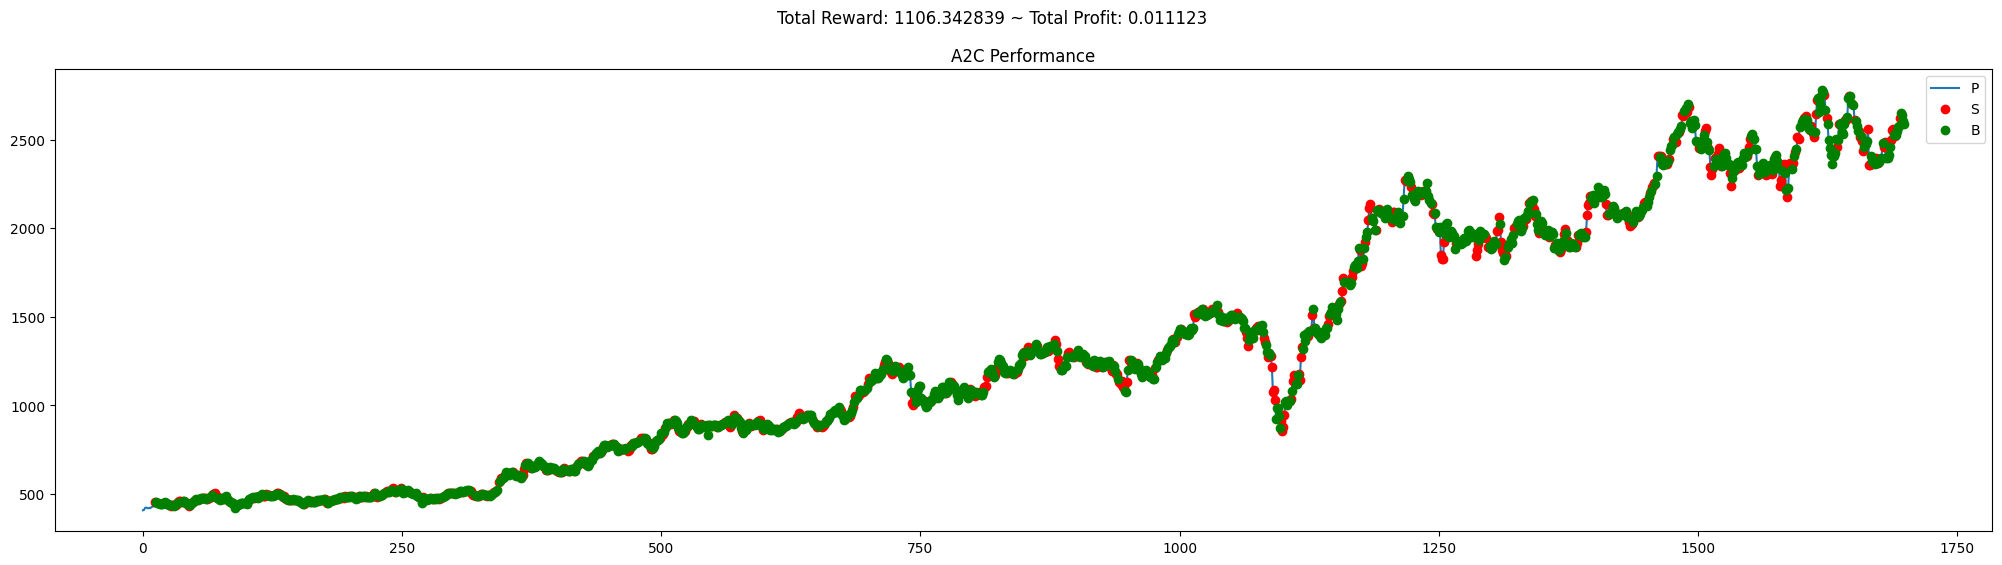

In [85]:
plt.figure(figsize=(25,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('A2C Performance')
plt.show()


In [78]:
import tensorboard

In [ ]:
tensorboard.version.VERSION

In [86]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-Latest",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=True,  # optional
)

model_with_signals_PPO = PPO(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_PPO.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Logging to runs/132qmzxu/PPO_1
-----------------------------
| time/              |      |
|    fps             | 6798 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4096         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0070480006 |
|    clip_fraction        | 0.025        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.69        |
|    explained_variance   | -0.049       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.621        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00502     |
|    value_loss           | 2.11         |
-----------

------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 13           |
|    time_elapsed         | 8            |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0071031884 |
|    clip_fraction        | 0.0231       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.664       |
|    explained_variance   | 0.000877     |
|    learning_rate        | 0.0003       |
|    loss                 | 185          |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00431     |
|    value_loss           | 349          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3100        |
|    iterations           | 14          |
|    time_elapsed         | 9           |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 2909         |
|    iterations           | 24           |
|    time_elapsed         | 16           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0061150556 |
|    clip_fraction        | 0.085        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.571       |
|    explained_variance   | -0.0271      |
|    learning_rate        | 0.0003       |
|    loss                 | 2.51         |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00966     |
|    value_loss           | 6.3          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2907        |
|    iterations           | 25          |
|    time_elapsed         | 17          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 2919         |
|    iterations           | 35           |
|    time_elapsed         | 24           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0013960014 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.535       |
|    explained_variance   | 0.00354      |
|    learning_rate        | 0.0003       |
|    loss                 | 382          |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 572          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2927         |
|    iterations           | 36           |
|    time_elapsed         | 25           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2889         |
|    iterations           | 46           |
|    time_elapsed         | 32           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0050040726 |
|    clip_fraction        | 0.0583       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.43        |
|    explained_variance   | -0.0993      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.22         |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00882     |
|    value_loss           | 6.57         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2885         |
|    iterations           | 47           |
|    time_elapsed         | 33           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2913         |
|    iterations           | 57           |
|    time_elapsed         | 40           |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0029904277 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.39        |
|    explained_variance   | 0.0118       |
|    learning_rate        | 0.0003       |
|    loss                 | 284          |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 520          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2907        |
|    iterations           | 58          |
|    time_elapsed         | 40          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 2922        |
|    iterations           | 68          |
|    time_elapsed         | 47          |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.005890549 |
|    clip_fraction        | 0.0561      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | -0.102      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.92        |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00918    |
|    value_loss           | 5.72        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 2913       |
|    iterations           | 69         |
|    time_elapsed         | 48         |
|    total_timesteps      | 141312     

------------------------------------------
| time/                   |              |
|    fps                  | 2930         |
|    iterations           | 79           |
|    time_elapsed         | 55           |
|    total_timesteps      | 161792       |
| train/                  |              |
|    approx_kl            | 0.0027381894 |
|    clip_fraction        | 0.0224       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.371       |
|    explained_variance   | 0.0129       |
|    learning_rate        | 0.0003       |
|    loss                 | 174          |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.00488     |
|    value_loss           | 257          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2934        |
|    iterations           | 80          |
|    time_elapsed         | 55          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 2958        |
|    iterations           | 90          |
|    time_elapsed         | 62          |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.005228375 |
|    clip_fraction        | 0.0658      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.345      |
|    explained_variance   | 0.0391      |
|    learning_rate        | 0.0003      |
|    loss                 | 13.3        |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.00807    |
|    value_loss           | 18.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2959         |
|    iterations           | 91           |
|    time_elapsed         | 62           |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 2969         |
|    iterations           | 101          |
|    time_elapsed         | 69           |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0022894787 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.0284       |
|    learning_rate        | 0.0003       |
|    loss                 | 118          |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0041      |
|    value_loss           | 227          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2972         |
|    iterations           | 102          |
|    time_elapsed         | 70           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2994         |
|    iterations           | 112          |
|    time_elapsed         | 76           |
|    total_timesteps      | 229376       |
| train/                  |              |
|    approx_kl            | 0.0042298217 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.339       |
|    explained_variance   | 0.0158       |
|    learning_rate        | 0.0003       |
|    loss                 | 7.21         |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.00576     |
|    value_loss           | 68.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2995         |
|    iterations           | 113          |
|    time_elapsed         | 77           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3011         |
|    iterations           | 123          |
|    time_elapsed         | 83           |
|    total_timesteps      | 251904       |
| train/                  |              |
|    approx_kl            | 0.0030139375 |
|    clip_fraction        | 0.0294       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.348       |
|    explained_variance   | 0.0365       |
|    learning_rate        | 0.0003       |
|    loss                 | 103          |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.007       |
|    value_loss           | 156          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3014        |
|    iterations           | 124         |
|    time_elapsed         | 84          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3030         |
|    iterations           | 134          |
|    time_elapsed         | 90           |
|    total_timesteps      | 274432       |
| train/                  |              |
|    approx_kl            | 0.0042378884 |
|    clip_fraction        | 0.0375       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.0584       |
|    learning_rate        | 0.0003       |
|    loss                 | 41.4         |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.00632     |
|    value_loss           | 104          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3029         |
|    iterations           | 135          |
|    time_elapsed         | 91           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3044         |
|    iterations           | 145          |
|    time_elapsed         | 97           |
|    total_timesteps      | 296960       |
| train/                  |              |
|    approx_kl            | 0.0029695448 |
|    clip_fraction        | 0.0252       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.324       |
|    explained_variance   | 0.0662       |
|    learning_rate        | 0.0003       |
|    loss                 | 71.9         |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 132          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3045        |
|    iterations           | 146         |
|    time_elapsed         | 98          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3058        |
|    iterations           | 156         |
|    time_elapsed         | 104         |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.003607289 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.0637      |
|    learning_rate        | 0.0003      |
|    loss                 | 87.4        |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.00524    |
|    value_loss           | 181         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3059         |
|    iterations           | 157          |
|    time_elapsed         | 105          |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 3070         |
|    iterations           | 167          |
|    time_elapsed         | 111          |
|    total_timesteps      | 342016       |
| train/                  |              |
|    approx_kl            | 0.0026153466 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.308       |
|    explained_variance   | 0.0751       |
|    learning_rate        | 0.0003       |
|    loss                 | 49.5         |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00622     |
|    value_loss           | 119          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3071        |
|    iterations           | 168         |
|    time_elapsed         | 112         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3079        |
|    iterations           | 178         |
|    time_elapsed         | 118         |
|    total_timesteps      | 364544      |
| train/                  |             |
|    approx_kl            | 0.002375029 |
|    clip_fraction        | 0.0208      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.29       |
|    explained_variance   | 0.0652      |
|    learning_rate        | 0.0003      |
|    loss                 | 111         |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.00366    |
|    value_loss           | 186         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3078         |
|    iterations           | 179          |
|    time_elapsed         | 119          |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 3086        |
|    iterations           | 189         |
|    time_elapsed         | 125         |
|    total_timesteps      | 387072      |
| train/                  |             |
|    approx_kl            | 0.005630729 |
|    clip_fraction        | 0.0379      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.0985      |
|    learning_rate        | 0.0003      |
|    loss                 | 46.6        |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.00548    |
|    value_loss           | 112         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3088         |
|    iterations           | 190          |
|    time_elapsed         | 126          |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 3095         |
|    iterations           | 200          |
|    time_elapsed         | 132          |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0020609486 |
|    clip_fraction        | 0.0245       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.072        |
|    learning_rate        | 0.0003       |
|    loss                 | 131          |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.00473     |
|    value_loss           | 266          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3096         |
|    iterations           | 201          |
|    time_elapsed         | 132          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3102         |
|    iterations           | 211          |
|    time_elapsed         | 139          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0027557542 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.244       |
|    explained_variance   | 0.145        |
|    learning_rate        | 0.0003       |
|    loss                 | 34.8         |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.00526     |
|    value_loss           | 102          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3103         |
|    iterations           | 212          |
|    time_elapsed         | 139          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3108         |
|    iterations           | 222          |
|    time_elapsed         | 146          |
|    total_timesteps      | 454656       |
| train/                  |              |
|    approx_kl            | 0.0023833872 |
|    clip_fraction        | 0.0261       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.0948       |
|    learning_rate        | 0.0003       |
|    loss                 | 115          |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.00503     |
|    value_loss           | 176          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3109         |
|    iterations           | 223          |
|    time_elapsed         | 146          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3113         |
|    iterations           | 233          |
|    time_elapsed         | 153          |
|    total_timesteps      | 477184       |
| train/                  |              |
|    approx_kl            | 0.0032374738 |
|    clip_fraction        | 0.0323       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.199        |
|    learning_rate        | 0.0003       |
|    loss                 | 38           |
|    n_updates            | 2320         |
|    policy_gradient_loss | -0.00628     |
|    value_loss           | 55.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3113         |
|    iterations           | 234          |
|    time_elapsed         | 153          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3119         |
|    iterations           | 244          |
|    time_elapsed         | 160          |
|    total_timesteps      | 499712       |
| train/                  |              |
|    approx_kl            | 0.0038335677 |
|    clip_fraction        | 0.0357       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.269       |
|    explained_variance   | 0.118        |
|    learning_rate        | 0.0003       |
|    loss                 | 68.3         |
|    n_updates            | 2430         |
|    policy_gradient_loss | -0.00811     |
|    value_loss           | 187          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3119        |
|    iterations           | 245         |
|    time_elapsed         | 160         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3124         |
|    iterations           | 255          |
|    time_elapsed         | 167          |
|    total_timesteps      | 522240       |
| train/                  |              |
|    approx_kl            | 0.0031896317 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.204        |
|    learning_rate        | 0.0003       |
|    loss                 | 14.1         |
|    n_updates            | 2540         |
|    policy_gradient_loss | -0.00622     |
|    value_loss           | 49.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3124         |
|    iterations           | 256          |
|    time_elapsed         | 167          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3129         |
|    iterations           | 266          |
|    time_elapsed         | 174          |
|    total_timesteps      | 544768       |
| train/                  |              |
|    approx_kl            | 0.0033638058 |
|    clip_fraction        | 0.028        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.122        |
|    learning_rate        | 0.0003       |
|    loss                 | 63.8         |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00522     |
|    value_loss           | 183          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3130         |
|    iterations           | 267          |
|    time_elapsed         | 174          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 3134        |
|    iterations           | 277         |
|    time_elapsed         | 180         |
|    total_timesteps      | 567296      |
| train/                  |             |
|    approx_kl            | 0.008695796 |
|    clip_fraction        | 0.0751      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.24       |
|    explained_variance   | 0.201       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.1        |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.00944    |
|    value_loss           | 33.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3135         |
|    iterations           | 278          |
|    time_elapsed         | 181          |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 3138         |
|    iterations           | 288          |
|    time_elapsed         | 187          |
|    total_timesteps      | 589824       |
| train/                  |              |
|    approx_kl            | 0.0021035448 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.128        |
|    learning_rate        | 0.0003       |
|    loss                 | 210          |
|    n_updates            | 2870         |
|    policy_gradient_loss | -0.00328     |
|    value_loss           | 271          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3139         |
|    iterations           | 289          |
|    time_elapsed         | 188          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3143         |
|    iterations           | 299          |
|    time_elapsed         | 194          |
|    total_timesteps      | 612352       |
| train/                  |              |
|    approx_kl            | 0.0092906365 |
|    clip_fraction        | 0.0681       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.145        |
|    learning_rate        | 0.0003       |
|    loss                 | 20           |
|    n_updates            | 2980         |
|    policy_gradient_loss | -0.0108      |
|    value_loss           | 27.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3143         |
|    iterations           | 300          |
|    time_elapsed         | 195          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 310          |
|    time_elapsed         | 201          |
|    total_timesteps      | 634880       |
| train/                  |              |
|    approx_kl            | 0.0024312371 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.147        |
|    learning_rate        | 0.0003       |
|    loss                 | 119          |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.00541     |
|    value_loss           | 258          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 311          |
|    time_elapsed         | 202          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 3150        |
|    iterations           | 321         |
|    time_elapsed         | 208         |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.008238811 |
|    clip_fraction        | 0.0738      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | -0.474      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.62        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 8.4         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3151         |
|    iterations           | 322          |
|    time_elapsed         | 209          |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 3154        |
|    iterations           | 332         |
|    time_elapsed         | 215         |
|    total_timesteps      | 679936      |
| train/                  |             |
|    approx_kl            | 0.005111118 |
|    clip_fraction        | 0.0378      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.276      |
|    explained_variance   | 0.128       |
|    learning_rate        | 0.0003      |
|    loss                 | 122         |
|    n_updates            | 3310        |
|    policy_gradient_loss | -0.0077     |
|    value_loss           | 296         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3154         |
|    iterations           | 333          |
|    time_elapsed         | 216          |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 3156        |
|    iterations           | 343         |
|    time_elapsed         | 222         |
|    total_timesteps      | 702464      |
| train/                  |             |
|    approx_kl            | 0.008620465 |
|    clip_fraction        | 0.0736      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.225      |
|    explained_variance   | -0.461      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.43        |
|    n_updates            | 3420        |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 10.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3157         |
|    iterations           | 344          |
|    time_elapsed         | 223          |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 3159         |
|    iterations           | 354          |
|    time_elapsed         | 229          |
|    total_timesteps      | 724992       |
| train/                  |              |
|    approx_kl            | 0.0034903768 |
|    clip_fraction        | 0.038        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.184        |
|    learning_rate        | 0.0003       |
|    loss                 | 99.8         |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.00655     |
|    value_loss           | 268          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3159        |
|    iterations           | 355         |
|    time_elapsed         | 230         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3161        |
|    iterations           | 365         |
|    time_elapsed         | 236         |
|    total_timesteps      | 747520      |
| train/                  |             |
|    approx_kl            | 0.009180127 |
|    clip_fraction        | 0.0767      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.229      |
|    explained_variance   | -0.543      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.19        |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 12.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3161         |
|    iterations           | 366          |
|    time_elapsed         | 237          |
|    total_timesteps      | 7

In [65]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_PPO.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
        


info {'total_reward': -208.94999999999982, 'total_profit': 0.5557173824316942, 'position': 1}


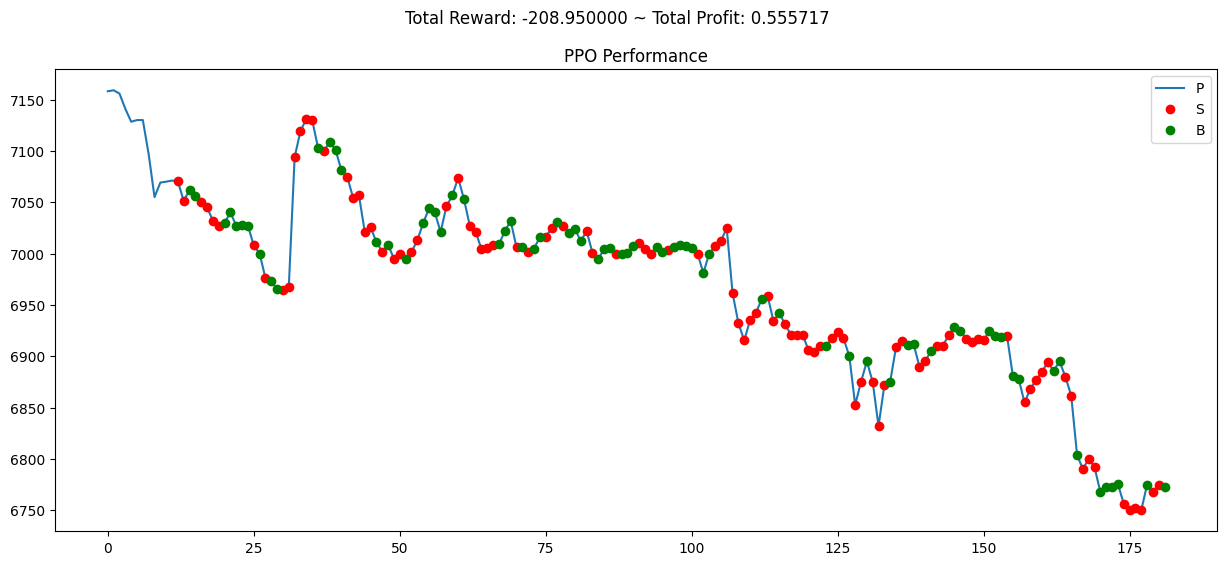

In [67]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('PPO Performance')
plt.show()

In [50]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [52]:
from stable_baselines3 import DQN

In [53]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-DQN",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    # save_code=True,  # optional
)

model_with_signals_DQN = DQN(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_DQN.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Logging to runs/1qh0xq5s/DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11247    |
|    time_elapsed     | 0        |
|    total_timesteps  | 148      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 15949    |
|    time_elapsed     | 0        |
|    total_timesteps  | 296      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 17661    |
|    time_elapsed     | 0        |
|    total_timesteps  | 444      |
----------------------------------
-------

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 24467    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3996     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.961    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 24543    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4144     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 24576    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4292     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 25482    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7992     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.923    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 25531    |
|    time_elapsed     | 0        |
|    total_timesteps  | 8140     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 25558    |
|    time_elapsed     | 0        |
|    total_timesteps  | 8288     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 324      |
|    fps              | 25212    |
|    time_elapsed     | 0        |
|    total_timesteps  | 11988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 328      |
|    fps              | 25224    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12136    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 332      |
|    fps              | 25182    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12284    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.848    |
| time/               |          |
|    episodes         | 432      |
|    fps              | 24985    |
|    time_elapsed     | 0        |
|    total_timesteps  | 15984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.847    |
| time/               |          |
|    episodes         | 436      |
|    fps              | 24935    |
|    time_elapsed     | 0        |
|    total_timesteps  | 16132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 440      |
|    fps              | 24932    |
|    time_elapsed     | 0        |
|    total_timesteps  | 16280    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 24716    |
|    time_elapsed     | 0        |
|    total_timesteps  | 19980    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.809    |
| time/               |          |
|    episodes         | 544      |
|    fps              | 24718    |
|    time_elapsed     | 0        |
|    total_timesteps  | 20128    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 548      |
|    fps              | 24716    |
|    time_elapsed     | 0        |
|    total_timesteps  | 20276    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.772    |
| time/               |          |
|    episodes         | 648      |
|    fps              | 24691    |
|    time_elapsed     | 0        |
|    total_timesteps  | 23976    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 652      |
|    fps              | 24708    |
|    time_elapsed     | 0        |
|    total_timesteps  | 24124    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.769    |
| time/               |          |
|    episodes         | 656      |
|    fps              | 24696    |
|    time_elapsed     | 0        |
|    total_timesteps  | 24272    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.734    |
| time/               |          |
|    episodes         | 756      |
|    fps              | 24671    |
|    time_elapsed     | 1        |
|    total_timesteps  | 27972    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 760      |
|    fps              | 24674    |
|    time_elapsed     | 1        |
|    total_timesteps  | 28120    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.731    |
| time/               |          |
|    episodes         | 764      |
|    fps              | 24683    |
|    time_elapsed     | 1        |
|    total_timesteps  | 28268    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.696    |
| time/               |          |
|    episodes         | 864      |
|    fps              | 24555    |
|    time_elapsed     | 1        |
|    total_timesteps  | 31968    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.695    |
| time/               |          |
|    episodes         | 868      |
|    fps              | 24564    |
|    time_elapsed     | 1        |
|    total_timesteps  | 32116    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.693    |
| time/               |          |
|    episodes         | 872      |
|    fps              | 24577    |
|    time_elapsed     | 1        |
|    total_timesteps  | 32264    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.658    |
| time/               |          |
|    episodes         | 972      |
|    fps              | 24619    |
|    time_elapsed     | 1        |
|    total_timesteps  | 35964    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.657    |
| time/               |          |
|    episodes         | 976      |
|    fps              | 24637    |
|    time_elapsed     | 1        |
|    total_timesteps  | 36112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.656    |
| time/               |          |
|    episodes         | 980      |
|    fps              | 24649    |
|    time_elapsed     | 1        |
|    total_timesteps  | 36260    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 24810    |
|    time_elapsed     | 1        |
|    total_timesteps  | 39960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.619    |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 24803    |
|    time_elapsed     | 1        |
|    total_timesteps  | 40108    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 24812    |
|    time_elapsed     | 1        |
|    total_timesteps  | 40256    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 24849    |
|    time_elapsed     | 1        |
|    total_timesteps  | 43956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.581    |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 24856    |
|    time_elapsed     | 1        |
|    total_timesteps  | 44104    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 1196     |
|    fps              | 24846    |
|    time_elapsed     | 1        |
|    total_timesteps  | 44252    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.544    |
| time/               |          |
|    episodes         | 1296     |
|    fps              | 24895    |
|    time_elapsed     | 1        |
|    total_timesteps  | 47952    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 24888    |
|    time_elapsed     | 1        |
|    total_timesteps  | 48100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.542    |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 24877    |
|    time_elapsed     | 1        |
|    total_timesteps  | 48248    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.512    |
| time/               |          |
|    episodes         | 1388     |
|    fps              | 21900    |
|    time_elapsed     | 2        |
|    total_timesteps  | 51356    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 35.4     |
|    n_updates        | 338      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.511    |
| time/               |          |
|    episodes         | 1392     |
|    fps              | 21656    |
|    time_elapsed     | 2        |
|    total_timesteps  | 51504    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 55.4     |
|    n_updates        | 375      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.485    |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 17899    |
|    time_elapsed     | 3        |
|    total_timesteps  | 54168    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 1041     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.484    |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 17751    |
|    time_elapsed     | 3        |
|    total_timesteps  | 54316    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.99     |
|    n_updates        | 1078     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.459    |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 15384    |
|    time_elapsed     | 3        |
|    total_timesteps  | 56980    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 1744     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.457    |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 15259    |
|    time_elapsed     | 3        |
|    total_timesteps  | 57128    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10       |
|    n_updates        | 1781     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.432    |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 13548    |
|    time_elapsed     | 4        |
|    total_timesteps  | 59792    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 2447     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.431    |
| time/               |          |
|    episodes         | 1620     |
|    fps              | 13470    |
|    time_elapsed     | 4        |
|    total_timesteps  | 59940    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.1      |
|    n_updates        | 2484     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.405    |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 12146    |
|    time_elapsed     | 5        |
|    total_timesteps  | 62604    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.8     |
|    n_updates        | 3150     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.404    |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 12094    |
|    time_elapsed     | 5        |
|    total_timesteps  | 62752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 39.9     |
|    n_updates        | 3187     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.379    |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 11144    |
|    time_elapsed     | 5        |
|    total_timesteps  | 65416    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 28.4     |
|    n_updates        | 3853     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.377    |
| time/               |          |
|    episodes         | 1772     |
|    fps              | 11105    |
|    time_elapsed     | 5        |
|    total_timesteps  | 65564    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.2     |
|    n_updates        | 3890     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.352    |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 10373    |
|    time_elapsed     | 6        |
|    total_timesteps  | 68228    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 30.1     |
|    n_updates        | 4556     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.35     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 10338    |
|    time_elapsed     | 6        |
|    total_timesteps  | 68376    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 4593     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.325    |
| time/               |          |
|    episodes         | 1920     |
|    fps              | 9803     |
|    time_elapsed     | 7        |
|    total_timesteps  | 71040    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 44.4     |
|    n_updates        | 5259     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.324    |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 9776     |
|    time_elapsed     | 7        |
|    total_timesteps  | 71188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 38.6     |
|    n_updates        | 5296     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.298    |
| time/               |          |
|    episodes         | 1996     |
|    fps              | 9330     |
|    time_elapsed     | 7        |
|    total_timesteps  | 73852    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.5     |
|    n_updates        | 5962     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.297    |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 9308     |
|    time_elapsed     | 7        |
|    total_timesteps  | 74000    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 5999     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.272    |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 8934     |
|    time_elapsed     | 8        |
|    total_timesteps  | 76664    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.18     |
|    n_updates        | 6665     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 8915     |
|    time_elapsed     | 8        |
|    total_timesteps  | 76812    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.3     |
|    n_updates        | 6702     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.245    |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 8562     |
|    time_elapsed     | 9        |
|    total_timesteps  | 79476    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.63     |
|    n_updates        | 7368     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.244    |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 8542     |
|    time_elapsed     | 9        |
|    total_timesteps  | 79624    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.1     |
|    n_updates        | 7405     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.218    |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 8245     |
|    time_elapsed     | 9        |
|    total_timesteps  | 82288    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 35       |
|    n_updates        | 8071     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 8229     |
|    time_elapsed     | 10       |
|    total_timesteps  | 82436    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 35.1     |
|    n_updates        | 8108     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.192    |
| time/               |          |
|    episodes         | 2300     |
|    fps              | 7953     |
|    time_elapsed     | 10       |
|    total_timesteps  | 85100    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.3     |
|    n_updates        | 8774     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.19     |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 7941     |
|    time_elapsed     | 10       |
|    total_timesteps  | 85248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.9     |
|    n_updates        | 8811     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.165    |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 7715     |
|    time_elapsed     | 11       |
|    total_timesteps  | 87912    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.7     |
|    n_updates        | 9477     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.163    |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 7703     |
|    time_elapsed     | 11       |
|    total_timesteps  | 88060    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.32     |
|    n_updates        | 9514     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 7496     |
|    time_elapsed     | 12       |
|    total_timesteps  | 90724    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 136      |
|    n_updates        | 10180    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.137    |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 7483     |
|    time_elapsed     | 12       |
|    total_timesteps  | 90872    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 75.3     |
|    n_updates        | 10217    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.111    |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 7291     |
|    time_elapsed     | 12       |
|    total_timesteps  | 93536    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 51.9     |
|    n_updates        | 10883    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.11     |
| time/               |          |
|    episodes         | 2532     |
|    fps              | 7283     |
|    time_elapsed     | 12       |
|    total_timesteps  | 93684    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21       |
|    n_updates        | 10920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0847   |
| time/               |          |
|    episodes         | 2604     |
|    fps              | 7119     |
|    time_elapsed     | 13       |
|    total_timesteps  | 96348    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.9     |
|    n_updates        | 11586    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0833   |
| time/               |          |
|    episodes         | 2608     |
|    fps              | 7110     |
|    time_elapsed     | 13       |
|    total_timesteps  | 96496    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 25.6     |
|    n_updates        | 11623    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.058    |
| time/               |          |
|    episodes         | 2680     |
|    fps              | 6955     |
|    time_elapsed     | 14       |
|    total_timesteps  | 99160    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.5     |
|    n_updates        | 12289    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0566   |
| time/               |          |
|    episodes         | 2684     |
|    fps              | 6946     |
|    time_elapsed     | 14       |
|    total_timesteps  | 99308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.2     |
|    n_updates        | 12326    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2756     |
|    fps              | 6796     |
|    time_elapsed     | 15       |
|    total_timesteps  | 101972   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.1     |
|    n_updates        | 12992    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 6788     |
|    time_elapsed     | 15       |
|    total_timesteps  | 102120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 13029    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2832     |
|    fps              | 6657     |
|    time_elapsed     | 15       |
|    total_timesteps  | 104784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.4     |
|    n_updates        | 13695    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2836     |
|    fps              | 6650     |
|    time_elapsed     | 15       |
|    total_timesteps  | 104932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.1     |
|    n_updates        | 13732    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2908     |
|    fps              | 6544     |
|    time_elapsed     | 16       |
|    total_timesteps  | 107596   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.8     |
|    n_updates        | 14398    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 6538     |
|    time_elapsed     | 16       |
|    total_timesteps  | 107744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.34     |
|    n_updates        | 14435    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2984     |
|    fps              | 6432     |
|    time_elapsed     | 17       |
|    total_timesteps  | 110408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 104      |
|    n_updates        | 15101    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2988     |
|    fps              | 6427     |
|    time_elapsed     | 17       |
|    total_timesteps  | 110556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 95.4     |
|    n_updates        | 15138    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3060     |
|    fps              | 6316     |
|    time_elapsed     | 17       |
|    total_timesteps  | 113220   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 30.6     |
|    n_updates        | 15804    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3064     |
|    fps              | 6310     |
|    time_elapsed     | 17       |
|    total_timesteps  | 113368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 26.6     |
|    n_updates        | 15841    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3136     |
|    fps              | 6221     |
|    time_elapsed     | 18       |
|    total_timesteps  | 116032   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 30.6     |
|    n_updates        | 16507    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3140     |
|    fps              | 6216     |
|    time_elapsed     | 18       |
|    total_timesteps  | 116180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.66     |
|    n_updates        | 16544    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3212     |
|    fps              | 6139     |
|    time_elapsed     | 19       |
|    total_timesteps  | 118844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 39.5     |
|    n_updates        | 17210    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3216     |
|    fps              | 6135     |
|    time_elapsed     | 19       |
|    total_timesteps  | 118992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.5     |
|    n_updates        | 17247    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3288     |
|    fps              | 6063     |
|    time_elapsed     | 20       |
|    total_timesteps  | 121656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.94     |
|    n_updates        | 17913    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3292     |
|    fps              | 6059     |
|    time_elapsed     | 20       |
|    total_timesteps  | 121804   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 30.4     |
|    n_updates        | 17950    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3364     |
|    fps              | 5973     |
|    time_elapsed     | 20       |
|    total_timesteps  | 124468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.6     |
|    n_updates        | 18616    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3368     |
|    fps              | 5968     |
|    time_elapsed     | 20       |
|    total_timesteps  | 124616   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 18653    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3440     |
|    fps              | 5905     |
|    time_elapsed     | 21       |
|    total_timesteps  | 127280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.87     |
|    n_updates        | 19319    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3444     |
|    fps              | 5902     |
|    time_elapsed     | 21       |
|    total_timesteps  | 127428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.8     |
|    n_updates        | 19356    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3516     |
|    fps              | 5842     |
|    time_elapsed     | 22       |
|    total_timesteps  | 130092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 146      |
|    n_updates        | 20022    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3520     |
|    fps              | 5839     |
|    time_elapsed     | 22       |
|    total_timesteps  | 130240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 124      |
|    n_updates        | 20059    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3592     |
|    fps              | 5779     |
|    time_elapsed     | 22       |
|    total_timesteps  | 132904   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 20725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3596     |
|    fps              | 5776     |
|    time_elapsed     | 23       |
|    total_timesteps  | 133052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.3     |
|    n_updates        | 20762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3668     |
|    fps              | 5707     |
|    time_elapsed     | 23       |
|    total_timesteps  | 135716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 21428    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3672     |
|    fps              | 5704     |
|    time_elapsed     | 23       |
|    total_timesteps  | 135864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 21465    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3744     |
|    fps              | 5651     |
|    time_elapsed     | 24       |
|    total_timesteps  | 138528   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.9      |
|    n_updates        | 22131    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3748     |
|    fps              | 5648     |
|    time_elapsed     | 24       |
|    total_timesteps  | 138676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.1     |
|    n_updates        | 22168    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3820     |
|    fps              | 5595     |
|    time_elapsed     | 25       |
|    total_timesteps  | 141340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 22834    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3824     |
|    fps              | 5593     |
|    time_elapsed     | 25       |
|    total_timesteps  | 141488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 34.9     |
|    n_updates        | 22871    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3896     |
|    fps              | 5548     |
|    time_elapsed     | 25       |
|    total_timesteps  | 144152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.5     |
|    n_updates        | 23537    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3900     |
|    fps              | 5545     |
|    time_elapsed     | 26       |
|    total_timesteps  | 144300   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.4     |
|    n_updates        | 23574    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3972     |
|    fps              | 5492     |
|    time_elapsed     | 26       |
|    total_timesteps  | 146964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.98     |
|    n_updates        | 24240    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3976     |
|    fps              | 5490     |
|    time_elapsed     | 26       |
|    total_timesteps  | 147112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.5     |
|    n_updates        | 24277    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4048     |
|    fps              | 5450     |
|    time_elapsed     | 27       |
|    total_timesteps  | 149776   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.1     |
|    n_updates        | 24943    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4052     |
|    fps              | 5448     |
|    time_elapsed     | 27       |
|    total_timesteps  | 149924   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 24980    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4124     |
|    fps              | 5402     |
|    time_elapsed     | 28       |
|    total_timesteps  | 152588   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.3     |
|    n_updates        | 25646    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4128     |
|    fps              | 5400     |
|    time_elapsed     | 28       |
|    total_timesteps  | 152736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 38       |
|    n_updates        | 25683    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4200     |
|    fps              | 5361     |
|    time_elapsed     | 28       |
|    total_timesteps  | 155400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 26349    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4204     |
|    fps              | 5358     |
|    time_elapsed     | 29       |
|    total_timesteps  | 155548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.8     |
|    n_updates        | 26386    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4276     |
|    fps              | 5313     |
|    time_elapsed     | 29       |
|    total_timesteps  | 158212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.58     |
|    n_updates        | 27052    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4280     |
|    fps              | 5310     |
|    time_elapsed     | 29       |
|    total_timesteps  | 158360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 27089    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4352     |
|    fps              | 5280     |
|    time_elapsed     | 30       |
|    total_timesteps  | 161024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 41.1     |
|    n_updates        | 27755    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4356     |
|    fps              | 5279     |
|    time_elapsed     | 30       |
|    total_timesteps  | 161172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 58.5     |
|    n_updates        | 27792    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4428     |
|    fps              | 5250     |
|    time_elapsed     | 31       |
|    total_timesteps  | 163836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.7     |
|    n_updates        | 28458    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4432     |
|    fps              | 5249     |
|    time_elapsed     | 31       |
|    total_timesteps  | 163984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.9     |
|    n_updates        | 28495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4504     |
|    fps              | 5216     |
|    time_elapsed     | 31       |
|    total_timesteps  | 166648   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.49     |
|    n_updates        | 29161    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4508     |
|    fps              | 5214     |
|    time_elapsed     | 31       |
|    total_timesteps  | 166796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.87     |
|    n_updates        | 29198    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4580     |
|    fps              | 5184     |
|    time_elapsed     | 32       |
|    total_timesteps  | 169460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.5      |
|    n_updates        | 29864    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4584     |
|    fps              | 5183     |
|    time_elapsed     | 32       |
|    total_timesteps  | 169608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.7     |
|    n_updates        | 29901    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4656     |
|    fps              | 5155     |
|    time_elapsed     | 33       |
|    total_timesteps  | 172272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12       |
|    n_updates        | 30567    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4660     |
|    fps              | 5154     |
|    time_elapsed     | 33       |
|    total_timesteps  | 172420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 83.1     |
|    n_updates        | 30604    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4732     |
|    fps              | 5129     |
|    time_elapsed     | 34       |
|    total_timesteps  | 175084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.02     |
|    n_updates        | 31270    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4736     |
|    fps              | 5127     |
|    time_elapsed     | 34       |
|    total_timesteps  | 175232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.22     |
|    n_updates        | 31307    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4808     |
|    fps              | 5102     |
|    time_elapsed     | 34       |
|    total_timesteps  | 177896   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.2     |
|    n_updates        | 31973    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4812     |
|    fps              | 5100     |
|    time_elapsed     | 34       |
|    total_timesteps  | 178044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 32010    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4884     |
|    fps              | 5078     |
|    time_elapsed     | 35       |
|    total_timesteps  | 180708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 64.2     |
|    n_updates        | 32676    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4888     |
|    fps              | 5077     |
|    time_elapsed     | 35       |
|    total_timesteps  | 180856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 49.7     |
|    n_updates        | 32713    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4960     |
|    fps              | 5057     |
|    time_elapsed     | 36       |
|    total_timesteps  | 183520   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.8     |
|    n_updates        | 33379    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4964     |
|    fps              | 5056     |
|    time_elapsed     | 36       |
|    total_timesteps  | 183668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.1     |
|    n_updates        | 33416    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5036     |
|    fps              | 5035     |
|    time_elapsed     | 37       |
|    total_timesteps  | 186332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.1     |
|    n_updates        | 34082    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5040     |
|    fps              | 5034     |
|    time_elapsed     | 37       |
|    total_timesteps  | 186480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 34119    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 5008     |
|    time_elapsed     | 37       |
|    total_timesteps  | 189144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.4     |
|    n_updates        | 34785    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5116     |
|    fps              | 5006     |
|    time_elapsed     | 37       |
|    total_timesteps  | 189292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.3     |
|    n_updates        | 34822    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5188     |
|    fps              | 4985     |
|    time_elapsed     | 38       |
|    total_timesteps  | 191956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 32.3     |
|    n_updates        | 35488    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5192     |
|    fps              | 4984     |
|    time_elapsed     | 38       |
|    total_timesteps  | 192104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 45.3     |
|    n_updates        | 35525    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5264     |
|    fps              | 4964     |
|    time_elapsed     | 39       |
|    total_timesteps  | 194768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 33       |
|    n_updates        | 36191    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5268     |
|    fps              | 4963     |
|    time_elapsed     | 39       |
|    total_timesteps  | 194916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.3     |
|    n_updates        | 36228    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5340     |
|    fps              | 4925     |
|    time_elapsed     | 40       |
|    total_timesteps  | 197580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.44     |
|    n_updates        | 36894    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5344     |
|    fps              | 4923     |
|    time_elapsed     | 40       |
|    total_timesteps  | 197728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 26.1     |
|    n_updates        | 36931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5416     |
|    fps              | 4896     |
|    time_elapsed     | 40       |
|    total_timesteps  | 200392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 61.6     |
|    n_updates        | 37597    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5420     |
|    fps              | 4895     |
|    time_elapsed     | 40       |
|    total_timesteps  | 200540   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 112      |
|    n_updates        | 37634    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5492     |
|    fps              | 4875     |
|    time_elapsed     | 41       |
|    total_timesteps  | 203204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.4     |
|    n_updates        | 38300    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5496     |
|    fps              | 4874     |
|    time_elapsed     | 41       |
|    total_timesteps  | 203352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 38337    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5568     |
|    fps              | 4838     |
|    time_elapsed     | 42       |
|    total_timesteps  | 206016   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.56     |
|    n_updates        | 39003    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5572     |
|    fps              | 4837     |
|    time_elapsed     | 42       |
|    total_timesteps  | 206164   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 39040    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5644     |
|    fps              | 4810     |
|    time_elapsed     | 43       |
|    total_timesteps  | 208828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 39706    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5648     |
|    fps              | 4808     |
|    time_elapsed     | 43       |
|    total_timesteps  | 208976   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.6     |
|    n_updates        | 39743    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5720     |
|    fps              | 4787     |
|    time_elapsed     | 44       |
|    total_timesteps  | 211640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.16     |
|    n_updates        | 40409    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5724     |
|    fps              | 4786     |
|    time_elapsed     | 44       |
|    total_timesteps  | 211788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.3     |
|    n_updates        | 40446    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5796     |
|    fps              | 4773     |
|    time_elapsed     | 44       |
|    total_timesteps  | 214452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.9     |
|    n_updates        | 41112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5800     |
|    fps              | 4772     |
|    time_elapsed     | 44       |
|    total_timesteps  | 214600   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.5     |
|    n_updates        | 41149    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5872     |
|    fps              | 4758     |
|    time_elapsed     | 45       |
|    total_timesteps  | 217264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.3     |
|    n_updates        | 41815    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5876     |
|    fps              | 4757     |
|    time_elapsed     | 45       |
|    total_timesteps  | 217412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.3     |
|    n_updates        | 41852    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5948     |
|    fps              | 4717     |
|    time_elapsed     | 46       |
|    total_timesteps  | 220076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 118      |
|    n_updates        | 42518    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5952     |
|    fps              | 4716     |
|    time_elapsed     | 46       |
|    total_timesteps  | 220224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 103      |
|    n_updates        | 42555    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6024     |
|    fps              | 4702     |
|    time_elapsed     | 47       |
|    total_timesteps  | 222888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 41.2     |
|    n_updates        | 43221    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6028     |
|    fps              | 4701     |
|    time_elapsed     | 47       |
|    total_timesteps  | 223036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.5     |
|    n_updates        | 43258    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6100     |
|    fps              | 4674     |
|    time_elapsed     | 48       |
|    total_timesteps  | 225700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.54     |
|    n_updates        | 43924    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6104     |
|    fps              | 4673     |
|    time_elapsed     | 48       |
|    total_timesteps  | 225848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 43961    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6176     |
|    fps              | 4657     |
|    time_elapsed     | 49       |
|    total_timesteps  | 228512   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.9     |
|    n_updates        | 44627    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6180     |
|    fps              | 4656     |
|    time_elapsed     | 49       |
|    total_timesteps  | 228660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 44664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6252     |
|    fps              | 4644     |
|    time_elapsed     | 49       |
|    total_timesteps  | 231324   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 62.9     |
|    n_updates        | 45330    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6256     |
|    fps              | 4643     |
|    time_elapsed     | 49       |
|    total_timesteps  | 231472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 39.4     |
|    n_updates        | 45367    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6328     |
|    fps              | 4631     |
|    time_elapsed     | 50       |
|    total_timesteps  | 234136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.2     |
|    n_updates        | 46033    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6332     |
|    fps              | 4630     |
|    time_elapsed     | 50       |
|    total_timesteps  | 234284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 46070    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6404     |
|    fps              | 4623     |
|    time_elapsed     | 51       |
|    total_timesteps  | 236948   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.5     |
|    n_updates        | 46736    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6408     |
|    fps              | 4622     |
|    time_elapsed     | 51       |
|    total_timesteps  | 237096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 46773    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6480     |
|    fps              | 4608     |
|    time_elapsed     | 52       |
|    total_timesteps  | 239760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 47439    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6484     |
|    fps              | 4607     |
|    time_elapsed     | 52       |
|    total_timesteps  | 239908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.1     |
|    n_updates        | 47476    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6556     |
|    fps              | 4597     |
|    time_elapsed     | 52       |
|    total_timesteps  | 242572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.2     |
|    n_updates        | 48142    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6560     |
|    fps              | 4596     |
|    time_elapsed     | 52       |
|    total_timesteps  | 242720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 48179    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6632     |
|    fps              | 4588     |
|    time_elapsed     | 53       |
|    total_timesteps  | 245384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.34     |
|    n_updates        | 48845    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6636     |
|    fps              | 4587     |
|    time_elapsed     | 53       |
|    total_timesteps  | 245532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23     |
|    n_updates        | 48882    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6708     |
|    fps              | 4580     |
|    time_elapsed     | 54       |
|    total_timesteps  | 248196   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09     |
|    n_updates        | 49548    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6712     |
|    fps              | 4580     |
|    time_elapsed     | 54       |
|    total_timesteps  | 248344   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.96     |
|    n_updates        | 49585    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6784     |
|    fps              | 4552     |
|    time_elapsed     | 55       |
|    total_timesteps  | 251008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 25.4     |
|    n_updates        | 50251    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6788     |
|    fps              | 4551     |
|    time_elapsed     | 55       |
|    total_timesteps  | 251156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 35.6     |
|    n_updates        | 50288    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6860     |
|    fps              | 4517     |
|    time_elapsed     | 56       |
|    total_timesteps  | 253820   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.53     |
|    n_updates        | 50954    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6864     |
|    fps              | 4515     |
|    time_elapsed     | 56       |
|    total_timesteps  | 253968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.4     |
|    n_updates        | 50991    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6936     |
|    fps              | 4491     |
|    time_elapsed     | 57       |
|    total_timesteps  | 256632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.1     |
|    n_updates        | 51657    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6940     |
|    fps              | 4490     |
|    time_elapsed     | 57       |
|    total_timesteps  | 256780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.15     |
|    n_updates        | 51694    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7012     |
|    fps              | 4471     |
|    time_elapsed     | 58       |
|    total_timesteps  | 259444   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.24     |
|    n_updates        | 52360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7016     |
|    fps              | 4470     |
|    time_elapsed     | 58       |
|    total_timesteps  | 259592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.03     |
|    n_updates        | 52397    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7088     |
|    fps              | 4465     |
|    time_elapsed     | 58       |
|    total_timesteps  | 262256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 53063    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7092     |
|    fps              | 4465     |
|    time_elapsed     | 58       |
|    total_timesteps  | 262404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.2     |
|    n_updates        | 53100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7164     |
|    fps              | 4460     |
|    time_elapsed     | 59       |
|    total_timesteps  | 265068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.14     |
|    n_updates        | 53766    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7168     |
|    fps              | 4459     |
|    time_elapsed     | 59       |
|    total_timesteps  | 265216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10       |
|    n_updates        | 53803    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7240     |
|    fps              | 4452     |
|    time_elapsed     | 60       |
|    total_timesteps  | 267880   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.1     |
|    n_updates        | 54469    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7244     |
|    fps              | 4452     |
|    time_elapsed     | 60       |
|    total_timesteps  | 268028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62     |
|    n_updates        | 54506    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7316     |
|    fps              | 4432     |
|    time_elapsed     | 61       |
|    total_timesteps  | 270692   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.5     |
|    n_updates        | 55172    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7320     |
|    fps              | 4432     |
|    time_elapsed     | 61       |
|    total_timesteps  | 270840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 25.7     |
|    n_updates        | 55209    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7392     |
|    fps              | 4425     |
|    time_elapsed     | 61       |
|    total_timesteps  | 273504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.7      |
|    n_updates        | 55875    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7396     |
|    fps              | 4424     |
|    time_elapsed     | 61       |
|    total_timesteps  | 273652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.3     |
|    n_updates        | 55912    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7468     |
|    fps              | 4411     |
|    time_elapsed     | 62       |
|    total_timesteps  | 276316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.62     |
|    n_updates        | 56578    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7472     |
|    fps              | 4411     |
|    time_elapsed     | 62       |
|    total_timesteps  | 276464   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.44     |
|    n_updates        | 56615    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7544     |
|    fps              | 4393     |
|    time_elapsed     | 63       |
|    total_timesteps  | 279128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.2     |
|    n_updates        | 57281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7548     |
|    fps              | 4390     |
|    time_elapsed     | 63       |
|    total_timesteps  | 279276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.3     |
|    n_updates        | 57318    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7620     |
|    fps              | 4377     |
|    time_elapsed     | 64       |
|    total_timesteps  | 281940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.6     |
|    n_updates        | 57984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7624     |
|    fps              | 4377     |
|    time_elapsed     | 64       |
|    total_timesteps  | 282088   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.9      |
|    n_updates        | 58021    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7696     |
|    fps              | 4371     |
|    time_elapsed     | 65       |
|    total_timesteps  | 284752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.31     |
|    n_updates        | 58687    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7700     |
|    fps              | 4371     |
|    time_elapsed     | 65       |
|    total_timesteps  | 284900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.81     |
|    n_updates        | 58724    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7772     |
|    fps              | 4359     |
|    time_elapsed     | 65       |
|    total_timesteps  | 287564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.98     |
|    n_updates        | 59390    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7776     |
|    fps              | 4358     |
|    time_elapsed     | 66       |
|    total_timesteps  | 287712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.4     |
|    n_updates        | 59427    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7848     |
|    fps              | 4344     |
|    time_elapsed     | 66       |
|    total_timesteps  | 290376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 35.2     |
|    n_updates        | 60093    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7852     |
|    fps              | 4344     |
|    time_elapsed     | 66       |
|    total_timesteps  | 290524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 21.6     |
|    n_updates        | 60130    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7924     |
|    fps              | 4336     |
|    time_elapsed     | 67       |
|    total_timesteps  | 293188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.4     |
|    n_updates        | 60796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7928     |
|    fps              | 4335     |
|    time_elapsed     | 67       |
|    total_timesteps  | 293336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.2      |
|    n_updates        | 60833    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8000     |
|    fps              | 4329     |
|    time_elapsed     | 68       |
|    total_timesteps  | 296000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.87     |
|    n_updates        | 61499    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8004     |
|    fps              | 4329     |
|    time_elapsed     | 68       |
|    total_timesteps  | 296148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.79     |
|    n_updates        | 61536    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8076     |
|    fps              | 4323     |
|    time_elapsed     | 69       |
|    total_timesteps  | 298812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 62202    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8080     |
|    fps              | 4322     |
|    time_elapsed     | 69       |
|    total_timesteps  | 298960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.85     |
|    n_updates        | 62239    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8152     |
|    fps              | 4312     |
|    time_elapsed     | 69       |
|    total_timesteps  | 301624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 25       |
|    n_updates        | 62905    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8156     |
|    fps              | 4311     |
|    time_elapsed     | 69       |
|    total_timesteps  | 301772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.3     |
|    n_updates        | 62942    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8228     |
|    fps              | 4305     |
|    time_elapsed     | 70       |
|    total_timesteps  | 304436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.62     |
|    n_updates        | 63608    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8232     |
|    fps              | 4305     |
|    time_elapsed     | 70       |
|    total_timesteps  | 304584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26     |
|    n_updates        | 63645    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8304     |
|    fps              | 4300     |
|    time_elapsed     | 71       |
|    total_timesteps  | 307248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23     |
|    n_updates        | 64311    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8308     |
|    fps              | 4300     |
|    time_elapsed     | 71       |
|    total_timesteps  | 307396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.02     |
|    n_updates        | 64348    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8380     |
|    fps              | 4293     |
|    time_elapsed     | 72       |
|    total_timesteps  | 310060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 49       |
|    n_updates        | 65014    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8384     |
|    fps              | 4293     |
|    time_elapsed     | 72       |
|    total_timesteps  | 310208   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 62.6     |
|    n_updates        | 65051    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8456     |
|    fps              | 4284     |
|    time_elapsed     | 73       |
|    total_timesteps  | 312872   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.21     |
|    n_updates        | 65717    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8460     |
|    fps              | 4284     |
|    time_elapsed     | 73       |
|    total_timesteps  | 313020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 65754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8532     |
|    fps              | 4279     |
|    time_elapsed     | 73       |
|    total_timesteps  | 315684   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93     |
|    n_updates        | 66420    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8536     |
|    fps              | 4279     |
|    time_elapsed     | 73       |
|    total_timesteps  | 315832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.68     |
|    n_updates        | 66457    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8608     |
|    fps              | 4273     |
|    time_elapsed     | 74       |
|    total_timesteps  | 318496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.68     |
|    n_updates        | 67123    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8612     |
|    fps              | 4273     |
|    time_elapsed     | 74       |
|    total_timesteps  | 318644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.97     |
|    n_updates        | 67160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8684     |
|    fps              | 4258     |
|    time_elapsed     | 75       |
|    total_timesteps  | 321308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.96     |
|    n_updates        | 67826    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8688     |
|    fps              | 4258     |
|    time_elapsed     | 75       |
|    total_timesteps  | 321456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 67863    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8760     |
|    fps              | 4255     |
|    time_elapsed     | 76       |
|    total_timesteps  | 324120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.83     |
|    n_updates        | 68529    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8764     |
|    fps              | 4255     |
|    time_elapsed     | 76       |
|    total_timesteps  | 324268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 68566    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8836     |
|    fps              | 4246     |
|    time_elapsed     | 76       |
|    total_timesteps  | 326932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.13     |
|    n_updates        | 69232    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8840     |
|    fps              | 4246     |
|    time_elapsed     | 77       |
|    total_timesteps  | 327080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.2     |
|    n_updates        | 69269    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8912     |
|    fps              | 4241     |
|    time_elapsed     | 77       |
|    total_timesteps  | 329744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.28     |
|    n_updates        | 69935    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8916     |
|    fps              | 4241     |
|    time_elapsed     | 77       |
|    total_timesteps  | 329892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.58     |
|    n_updates        | 69972    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8988     |
|    fps              | 4233     |
|    time_elapsed     | 78       |
|    total_timesteps  | 332556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.92     |
|    n_updates        | 70638    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8992     |
|    fps              | 4233     |
|    time_elapsed     | 78       |
|    total_timesteps  | 332704   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9      |
|    n_updates        | 70675    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9064     |
|    fps              | 4230     |
|    time_elapsed     | 79       |
|    total_timesteps  | 335368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23     |
|    n_updates        | 71341    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9068     |
|    fps              | 4230     |
|    time_elapsed     | 79       |
|    total_timesteps  | 335516   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.6     |
|    n_updates        | 71378    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9140     |
|    fps              | 4228     |
|    time_elapsed     | 79       |
|    total_timesteps  | 338180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.1     |
|    n_updates        | 72044    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9144     |
|    fps              | 4228     |
|    time_elapsed     | 80       |
|    total_timesteps  | 338328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6        |
|    n_updates        | 72081    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9216     |
|    fps              | 4219     |
|    time_elapsed     | 80       |
|    total_timesteps  | 340992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 72747    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9220     |
|    fps              | 4218     |
|    time_elapsed     | 80       |
|    total_timesteps  | 341140   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.46     |
|    n_updates        | 72784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9292     |
|    fps              | 4208     |
|    time_elapsed     | 81       |
|    total_timesteps  | 343804   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.79     |
|    n_updates        | 73450    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9296     |
|    fps              | 4208     |
|    time_elapsed     | 81       |
|    total_timesteps  | 343952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.84     |
|    n_updates        | 73487    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9368     |
|    fps              | 4205     |
|    time_elapsed     | 82       |
|    total_timesteps  | 346616   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.42     |
|    n_updates        | 74153    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9372     |
|    fps              | 4205     |
|    time_elapsed     | 82       |
|    total_timesteps  | 346764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48     |
|    n_updates        | 74190    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9444     |
|    fps              | 4201     |
|    time_elapsed     | 83       |
|    total_timesteps  | 349428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.57     |
|    n_updates        | 74856    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9448     |
|    fps              | 4201     |
|    time_elapsed     | 83       |
|    total_timesteps  | 349576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.98     |
|    n_updates        | 74893    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9520     |
|    fps              | 4191     |
|    time_elapsed     | 84       |
|    total_timesteps  | 352240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.61     |
|    n_updates        | 75559    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9524     |
|    fps              | 4191     |
|    time_elapsed     | 84       |
|    total_timesteps  | 352388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.7      |
|    n_updates        | 75596    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9596     |
|    fps              | 4185     |
|    time_elapsed     | 84       |
|    total_timesteps  | 355052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 76262    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9600     |
|    fps              | 4185     |
|    time_elapsed     | 84       |
|    total_timesteps  | 355200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.95     |
|    n_updates        | 76299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9672     |
|    fps              | 4179     |
|    time_elapsed     | 85       |
|    total_timesteps  | 357864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.78     |
|    n_updates        | 76965    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9676     |
|    fps              | 4178     |
|    time_elapsed     | 85       |
|    total_timesteps  | 358012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.01     |
|    n_updates        | 77002    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9748     |
|    fps              | 4174     |
|    time_elapsed     | 86       |
|    total_timesteps  | 360676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23     |
|    n_updates        | 77668    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9752     |
|    fps              | 4173     |
|    time_elapsed     | 86       |
|    total_timesteps  | 360824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.85     |
|    n_updates        | 77705    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9824     |
|    fps              | 4167     |
|    time_elapsed     | 87       |
|    total_timesteps  | 363488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.41     |
|    n_updates        | 78371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9828     |
|    fps              | 4167     |
|    time_elapsed     | 87       |
|    total_timesteps  | 363636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.75     |
|    n_updates        | 78408    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9900     |
|    fps              | 4164     |
|    time_elapsed     | 87       |
|    total_timesteps  | 366300   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.65     |
|    n_updates        | 79074    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9904     |
|    fps              | 4164     |
|    time_elapsed     | 87       |
|    total_timesteps  | 366448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.49     |
|    n_updates        | 79111    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9976     |
|    fps              | 4160     |
|    time_elapsed     | 88       |
|    total_timesteps  | 369112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates        | 79777    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9980     |
|    fps              | 4159     |
|    time_elapsed     | 88       |
|    total_timesteps  | 369260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.68     |
|    n_updates        | 79814    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10052    |
|    fps              | 4153     |
|    time_elapsed     | 89       |
|    total_timesteps  | 371924   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.16     |
|    n_updates        | 80480    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10056    |
|    fps              | 4152     |
|    time_elapsed     | 89       |
|    total_timesteps  | 372072   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78     |
|    n_updates        | 80517    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10128    |
|    fps              | 4149     |
|    time_elapsed     | 90       |
|    total_timesteps  | 374736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.52     |
|    n_updates        | 81183    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10132    |
|    fps              | 4149     |
|    time_elapsed     | 90       |
|    total_timesteps  | 374884   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.79     |
|    n_updates        | 81220    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10204    |
|    fps              | 4141     |
|    time_elapsed     | 91       |
|    total_timesteps  | 377548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.2      |
|    n_updates        | 81886    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10208    |
|    fps              | 4141     |
|    time_elapsed     | 91       |
|    total_timesteps  | 377696   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.21     |
|    n_updates        | 81923    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10280    |
|    fps              | 4133     |
|    time_elapsed     | 92       |
|    total_timesteps  | 380360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.4     |
|    n_updates        | 82589    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10284    |
|    fps              | 4133     |
|    time_elapsed     | 92       |
|    total_timesteps  | 380508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.09     |
|    n_updates        | 82626    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10356    |
|    fps              | 4123     |
|    time_elapsed     | 92       |
|    total_timesteps  | 383172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates        | 83292    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10360    |
|    fps              | 4123     |
|    time_elapsed     | 92       |
|    total_timesteps  | 383320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.02     |
|    n_updates        | 83329    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10432    |
|    fps              | 4117     |
|    time_elapsed     | 93       |
|    total_timesteps  | 385984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.94     |
|    n_updates        | 83995    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10436    |
|    fps              | 4117     |
|    time_elapsed     | 93       |
|    total_timesteps  | 386132   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.33     |
|    n_updates        | 84032    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10508    |
|    fps              | 4111     |
|    time_elapsed     | 94       |
|    total_timesteps  | 388796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09     |
|    n_updates        | 84698    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10512    |
|    fps              | 4110     |
|    time_elapsed     | 94       |
|    total_timesteps  | 388944   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.4      |
|    n_updates        | 84735    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10584    |
|    fps              | 4105     |
|    time_elapsed     | 95       |
|    total_timesteps  | 391608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.05     |
|    n_updates        | 85401    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10588    |
|    fps              | 4105     |
|    time_elapsed     | 95       |
|    total_timesteps  | 391756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.35     |
|    n_updates        | 85438    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10660    |
|    fps              | 4102     |
|    time_elapsed     | 96       |
|    total_timesteps  | 394420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.99     |
|    n_updates        | 86104    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10664    |
|    fps              | 4102     |
|    time_elapsed     | 96       |
|    total_timesteps  | 394568   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.08     |
|    n_updates        | 86141    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10736    |
|    fps              | 4098     |
|    time_elapsed     | 96       |
|    total_timesteps  | 397232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.77     |
|    n_updates        | 86807    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10740    |
|    fps              | 4098     |
|    time_elapsed     | 96       |
|    total_timesteps  | 397380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49     |
|    n_updates        | 86844    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10812    |
|    fps              | 4083     |
|    time_elapsed     | 97       |
|    total_timesteps  | 400044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 36.6     |
|    n_updates        | 87510    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10816    |
|    fps              | 4082     |
|    time_elapsed     | 98       |
|    total_timesteps  | 400192   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 87547    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10888    |
|    fps              | 4081     |
|    time_elapsed     | 98       |
|    total_timesteps  | 402856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09     |
|    n_updates        | 88213    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10892    |
|    fps              | 4080     |
|    time_elapsed     | 98       |
|    total_timesteps  | 403004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.27     |
|    n_updates        | 88250    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10964    |
|    fps              | 4060     |
|    time_elapsed     | 99       |
|    total_timesteps  | 405668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 88916    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10968    |
|    fps              | 4059     |
|    time_elapsed     | 99       |
|    total_timesteps  | 405816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.55     |
|    n_updates        | 88953    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11040    |
|    fps              | 4054     |
|    time_elapsed     | 100      |
|    total_timesteps  | 408480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.51     |
|    n_updates        | 89619    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11044    |
|    fps              | 4054     |
|    time_elapsed     | 100      |
|    total_timesteps  | 408628   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.65     |
|    n_updates        | 89656    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11116    |
|    fps              | 4050     |
|    time_elapsed     | 101      |
|    total_timesteps  | 411292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.52     |
|    n_updates        | 90322    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11120    |
|    fps              | 4050     |
|    time_elapsed     | 101      |
|    total_timesteps  | 411440   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.14     |
|    n_updates        | 90359    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11192    |
|    fps              | 4047     |
|    time_elapsed     | 102      |
|    total_timesteps  | 414104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23     |
|    n_updates        | 91025    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11196    |
|    fps              | 4047     |
|    time_elapsed     | 102      |
|    total_timesteps  | 414252   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.24     |
|    n_updates        | 91062    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11268    |
|    fps              | 4044     |
|    time_elapsed     | 103      |
|    total_timesteps  | 416916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18     |
|    n_updates        | 91728    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11272    |
|    fps              | 4044     |
|    time_elapsed     | 103      |
|    total_timesteps  | 417064   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.17     |
|    n_updates        | 91765    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11344    |
|    fps              | 4039     |
|    time_elapsed     | 103      |
|    total_timesteps  | 419728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11     |
|    n_updates        | 92431    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11348    |
|    fps              | 4039     |
|    time_elapsed     | 103      |
|    total_timesteps  | 419876   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates        | 92468    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11420    |
|    fps              | 4038     |
|    time_elapsed     | 104      |
|    total_timesteps  | 422540   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.21     |
|    n_updates        | 93134    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11424    |
|    fps              | 4037     |
|    time_elapsed     | 104      |
|    total_timesteps  | 422688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.03     |
|    n_updates        | 93171    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11496    |
|    fps              | 4036     |
|    time_elapsed     | 105      |
|    total_timesteps  | 425352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.01     |
|    n_updates        | 93837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11500    |
|    fps              | 4036     |
|    time_elapsed     | 105      |
|    total_timesteps  | 425500   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.88     |
|    n_updates        | 93874    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11572    |
|    fps              | 4033     |
|    time_elapsed     | 106      |
|    total_timesteps  | 428164   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.72     |
|    n_updates        | 94540    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11576    |
|    fps              | 4033     |
|    time_elapsed     | 106      |
|    total_timesteps  | 428312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09     |
|    n_updates        | 94577    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11648    |
|    fps              | 4030     |
|    time_elapsed     | 106      |
|    total_timesteps  | 430976   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.84     |
|    n_updates        | 95243    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11652    |
|    fps              | 4030     |
|    time_elapsed     | 106      |
|    total_timesteps  | 431124   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.99     |
|    n_updates        | 95280    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11724    |
|    fps              | 4029     |
|    time_elapsed     | 107      |
|    total_timesteps  | 433788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.62     |
|    n_updates        | 95946    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11728    |
|    fps              | 4029     |
|    time_elapsed     | 107      |
|    total_timesteps  | 433936   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 95983    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11800    |
|    fps              | 4026     |
|    time_elapsed     | 108      |
|    total_timesteps  | 436600   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 96649    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11804    |
|    fps              | 4026     |
|    time_elapsed     | 108      |
|    total_timesteps  | 436748   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.94     |
|    n_updates        | 96686    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11876    |
|    fps              | 4023     |
|    time_elapsed     | 109      |
|    total_timesteps  | 439412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59     |
|    n_updates        | 97352    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11880    |
|    fps              | 4022     |
|    time_elapsed     | 109      |
|    total_timesteps  | 439560   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.32     |
|    n_updates        | 97389    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11952    |
|    fps              | 4020     |
|    time_elapsed     | 109      |
|    total_timesteps  | 442224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26     |
|    n_updates        | 98055    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11956    |
|    fps              | 4019     |
|    time_elapsed     | 110      |
|    total_timesteps  | 442372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.77     |
|    n_updates        | 98092    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12028    |
|    fps              | 4017     |
|    time_elapsed     | 110      |
|    total_timesteps  | 445036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.99     |
|    n_updates        | 98758    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12032    |
|    fps              | 4016     |
|    time_elapsed     | 110      |
|    total_timesteps  | 445184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.42     |
|    n_updates        | 98795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12104    |
|    fps              | 4015     |
|    time_elapsed     | 111      |
|    total_timesteps  | 447848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.32     |
|    n_updates        | 99461    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12108    |
|    fps              | 4015     |
|    time_elapsed     | 111      |
|    total_timesteps  | 447996   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.01     |
|    n_updates        | 99498    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12180    |
|    fps              | 4011     |
|    time_elapsed     | 112      |
|    total_timesteps  | 450660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.52     |
|    n_updates        | 100164   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12184    |
|    fps              | 4011     |
|    time_elapsed     | 112      |
|    total_timesteps  | 450808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.7      |
|    n_updates        | 100201   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12256    |
|    fps              | 4010     |
|    time_elapsed     | 113      |
|    total_timesteps  | 453472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14     |
|    n_updates        | 100867   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12260    |
|    fps              | 4010     |
|    time_elapsed     | 113      |
|    total_timesteps  | 453620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.88     |
|    n_updates        | 100904   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12332    |
|    fps              | 4010     |
|    time_elapsed     | 113      |
|    total_timesteps  | 456284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates        | 101570   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12336    |
|    fps              | 4010     |
|    time_elapsed     | 113      |
|    total_timesteps  | 456432   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.67     |
|    n_updates        | 101607   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12408    |
|    fps              | 4009     |
|    time_elapsed     | 114      |
|    total_timesteps  | 459096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98     |
|    n_updates        | 102273   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12412    |
|    fps              | 4009     |
|    time_elapsed     | 114      |
|    total_timesteps  | 459244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75     |
|    n_updates        | 102310   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12484    |
|    fps              | 4005     |
|    time_elapsed     | 115      |
|    total_timesteps  | 461908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91     |
|    n_updates        | 102976   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12488    |
|    fps              | 4005     |
|    time_elapsed     | 115      |
|    total_timesteps  | 462056   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35     |
|    n_updates        | 103013   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12560    |
|    fps              | 4004     |
|    time_elapsed     | 116      |
|    total_timesteps  | 464720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.77     |
|    n_updates        | 103679   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12564    |
|    fps              | 4004     |
|    time_elapsed     | 116      |
|    total_timesteps  | 464868   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.65     |
|    n_updates        | 103716   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12636    |
|    fps              | 4000     |
|    time_elapsed     | 116      |
|    total_timesteps  | 467532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4      |
|    n_updates        | 104382   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12640    |
|    fps              | 4000     |
|    time_elapsed     | 116      |
|    total_timesteps  | 467680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63     |
|    n_updates        | 104419   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12712    |
|    fps              | 3985     |
|    time_elapsed     | 118      |
|    total_timesteps  | 470344   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.2     |
|    n_updates        | 105085   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12716    |
|    fps              | 3985     |
|    time_elapsed     | 118      |
|    total_timesteps  | 470492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34     |
|    n_updates        | 105122   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12788    |
|    fps              | 3980     |
|    time_elapsed     | 118      |
|    total_timesteps  | 473156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09     |
|    n_updates        | 105788   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12792    |
|    fps              | 3980     |
|    time_elapsed     | 118      |
|    total_timesteps  | 473304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.68     |
|    n_updates        | 105825   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12864    |
|    fps              | 3978     |
|    time_elapsed     | 119      |
|    total_timesteps  | 475968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.94     |
|    n_updates        | 106491   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12868    |
|    fps              | 3978     |
|    time_elapsed     | 119      |
|    total_timesteps  | 476116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.56     |
|    n_updates        | 106528   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12940    |
|    fps              | 3976     |
|    time_elapsed     | 120      |
|    total_timesteps  | 478780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.04     |
|    n_updates        | 107194   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12944    |
|    fps              | 3976     |
|    time_elapsed     | 120      |
|    total_timesteps  | 478928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.47     |
|    n_updates        | 107231   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13016    |
|    fps              | 3974     |
|    time_elapsed     | 121      |
|    total_timesteps  | 481592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.5      |
|    n_updates        | 107897   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13020    |
|    fps              | 3974     |
|    time_elapsed     | 121      |
|    total_timesteps  | 481740   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.32     |
|    n_updates        | 107934   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13092    |
|    fps              | 3966     |
|    time_elapsed     | 122      |
|    total_timesteps  | 484404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64     |
|    n_updates        | 108600   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13096    |
|    fps              | 3966     |
|    time_elapsed     | 122      |
|    total_timesteps  | 484552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 108637   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13168    |
|    fps              | 3962     |
|    time_elapsed     | 122      |
|    total_timesteps  | 487216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.13     |
|    n_updates        | 109303   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13172    |
|    fps              | 3962     |
|    time_elapsed     | 122      |
|    total_timesteps  | 487364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.94     |
|    n_updates        | 109340   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13244    |
|    fps              | 3959     |
|    time_elapsed     | 123      |
|    total_timesteps  | 490028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 23.1     |
|    n_updates        | 110006   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13248    |
|    fps              | 3958     |
|    time_elapsed     | 123      |
|    total_timesteps  | 490176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.6     |
|    n_updates        | 110043   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13320    |
|    fps              | 3959     |
|    time_elapsed     | 124      |
|    total_timesteps  | 492840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.56     |
|    n_updates        | 110709   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13324    |
|    fps              | 3958     |
|    time_elapsed     | 124      |
|    total_timesteps  | 492988   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.54     |
|    n_updates        | 110746   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13396    |
|    fps              | 3952     |
|    time_elapsed     | 125      |
|    total_timesteps  | 495652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.24     |
|    n_updates        | 111412   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13400    |
|    fps              | 3951     |
|    time_elapsed     | 125      |
|    total_timesteps  | 495800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.92     |
|    n_updates        | 111449   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13472    |
|    fps              | 3951     |
|    time_elapsed     | 126      |
|    total_timesteps  | 498464   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72     |
|    n_updates        | 112115   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13476    |
|    fps              | 3951     |
|    time_elapsed     | 126      |
|    total_timesteps  | 498612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43     |
|    n_updates        | 112152   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13548    |
|    fps              | 3950     |
|    time_elapsed     | 126      |
|    total_timesteps  | 501276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.97     |
|    n_updates        | 112818   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13552    |
|    fps              | 3950     |
|    time_elapsed     | 126      |
|    total_timesteps  | 501424   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.8      |
|    n_updates        | 112855   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13624    |
|    fps              | 3947     |
|    time_elapsed     | 127      |
|    total_timesteps  | 504088   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27     |
|    n_updates        | 113521   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13628    |
|    fps              | 3947     |
|    time_elapsed     | 127      |
|    total_timesteps  | 504236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.38     |
|    n_updates        | 113558   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13700    |
|    fps              | 3946     |
|    time_elapsed     | 128      |
|    total_timesteps  | 506900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.55     |
|    n_updates        | 114224   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13704    |
|    fps              | 3946     |
|    time_elapsed     | 128      |
|    total_timesteps  | 507048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.41     |
|    n_updates        | 114261   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13776    |
|    fps              | 3944     |
|    time_elapsed     | 129      |
|    total_timesteps  | 509712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69     |
|    n_updates        | 114927   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13780    |
|    fps              | 3944     |
|    time_elapsed     | 129      |
|    total_timesteps  | 509860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.87     |
|    n_updates        | 114964   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13852    |
|    fps              | 3943     |
|    time_elapsed     | 129      |
|    total_timesteps  | 512524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23     |
|    n_updates        | 115630   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13856    |
|    fps              | 3942     |
|    time_elapsed     | 130      |
|    total_timesteps  | 512672   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.76     |
|    n_updates        | 115667   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13928    |
|    fps              | 3942     |
|    time_elapsed     | 130      |
|    total_timesteps  | 515336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04     |
|    n_updates        | 116333   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13932    |
|    fps              | 3942     |
|    time_elapsed     | 130      |
|    total_timesteps  | 515484   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.77     |
|    n_updates        | 116370   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14004    |
|    fps              | 3940     |
|    time_elapsed     | 131      |
|    total_timesteps  | 518148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.89     |
|    n_updates        | 117036   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14008    |
|    fps              | 3940     |
|    time_elapsed     | 131      |
|    total_timesteps  | 518296   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.13     |
|    n_updates        | 117073   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14080    |
|    fps              | 3937     |
|    time_elapsed     | 132      |
|    total_timesteps  | 520960   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.7      |
|    n_updates        | 117739   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14084    |
|    fps              | 3937     |
|    time_elapsed     | 132      |
|    total_timesteps  | 521108   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27     |
|    n_updates        | 117776   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14156    |
|    fps              | 3937     |
|    time_elapsed     | 133      |
|    total_timesteps  | 523772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.03     |
|    n_updates        | 118442   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14160    |
|    fps              | 3937     |
|    time_elapsed     | 133      |
|    total_timesteps  | 523920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58     |
|    n_updates        | 118479   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14232    |
|    fps              | 3935     |
|    time_elapsed     | 133      |
|    total_timesteps  | 526584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.09     |
|    n_updates        | 119145   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14236    |
|    fps              | 3935     |
|    time_elapsed     | 133      |
|    total_timesteps  | 526732   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72     |
|    n_updates        | 119182   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14308    |
|    fps              | 3933     |
|    time_elapsed     | 134      |
|    total_timesteps  | 529396   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.77     |
|    n_updates        | 119848   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14312    |
|    fps              | 3933     |
|    time_elapsed     | 134      |
|    total_timesteps  | 529544   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.01     |
|    n_updates        | 119885   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14384    |
|    fps              | 3931     |
|    time_elapsed     | 135      |
|    total_timesteps  | 532208   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19     |
|    n_updates        | 120551   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14388    |
|    fps              | 3931     |
|    time_elapsed     | 135      |
|    total_timesteps  | 532356   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39     |
|    n_updates        | 120588   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14460    |
|    fps              | 3931     |
|    time_elapsed     | 136      |
|    total_timesteps  | 535020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.59     |
|    n_updates        | 121254   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14464    |
|    fps              | 3931     |
|    time_elapsed     | 136      |
|    total_timesteps  | 535168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34     |
|    n_updates        | 121291   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14536    |
|    fps              | 3929     |
|    time_elapsed     | 136      |
|    total_timesteps  | 537832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91     |
|    n_updates        | 121957   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14540    |
|    fps              | 3929     |
|    time_elapsed     | 136      |
|    total_timesteps  | 537980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23     |
|    n_updates        | 121994   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14612    |
|    fps              | 3927     |
|    time_elapsed     | 137      |
|    total_timesteps  | 540644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.32     |
|    n_updates        | 122660   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14616    |
|    fps              | 3927     |
|    time_elapsed     | 137      |
|    total_timesteps  | 540792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62     |
|    n_updates        | 122697   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14688    |
|    fps              | 3926     |
|    time_elapsed     | 138      |
|    total_timesteps  | 543456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.57     |
|    n_updates        | 123363   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14692    |
|    fps              | 3926     |
|    time_elapsed     | 138      |
|    total_timesteps  | 543604   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33     |
|    n_updates        | 123400   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14764    |
|    fps              | 3921     |
|    time_elapsed     | 139      |
|    total_timesteps  | 546268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.6      |
|    n_updates        | 124066   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14768    |
|    fps              | 3920     |
|    time_elapsed     | 139      |
|    total_timesteps  | 546416   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.15     |
|    n_updates        | 124103   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14840    |
|    fps              | 3917     |
|    time_elapsed     | 140      |
|    total_timesteps  | 549080   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3      |
|    n_updates        | 124769   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14844    |
|    fps              | 3916     |
|    time_elapsed     | 140      |
|    total_timesteps  | 549228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.53     |
|    n_updates        | 124806   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14916    |
|    fps              | 3911     |
|    time_elapsed     | 141      |
|    total_timesteps  | 551892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.92     |
|    n_updates        | 125472   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14920    |
|    fps              | 3911     |
|    time_elapsed     | 141      |
|    total_timesteps  | 552040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26     |
|    n_updates        | 125509   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14992    |
|    fps              | 3905     |
|    time_elapsed     | 142      |
|    total_timesteps  | 554704   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates        | 126175   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14996    |
|    fps              | 3904     |
|    time_elapsed     | 142      |
|    total_timesteps  | 554852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79     |
|    n_updates        | 126212   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15068    |
|    fps              | 3903     |
|    time_elapsed     | 142      |
|    total_timesteps  | 557516   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13     |
|    n_updates        | 126878   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15072    |
|    fps              | 3902     |
|    time_elapsed     | 142      |
|    total_timesteps  | 557664   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates        | 126915   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15144    |
|    fps              | 3897     |
|    time_elapsed     | 143      |
|    total_timesteps  | 560328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 127581   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15148    |
|    fps              | 3897     |
|    time_elapsed     | 143      |
|    total_timesteps  | 560476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates        | 127618   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15220    |
|    fps              | 3897     |
|    time_elapsed     | 144      |
|    total_timesteps  | 563140   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.67     |
|    n_updates        | 128284   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15224    |
|    fps              | 3897     |
|    time_elapsed     | 144      |
|    total_timesteps  | 563288   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates        | 128321   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15296    |
|    fps              | 3896     |
|    time_elapsed     | 145      |
|    total_timesteps  | 565952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates        | 128987   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15300    |
|    fps              | 3896     |
|    time_elapsed     | 145      |
|    total_timesteps  | 566100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.12     |
|    n_updates        | 129024   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15372    |
|    fps              | 3894     |
|    time_elapsed     | 146      |
|    total_timesteps  | 568764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.84     |
|    n_updates        | 129690   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15376    |
|    fps              | 3894     |
|    time_elapsed     | 146      |
|    total_timesteps  | 568912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 129727   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15448    |
|    fps              | 3894     |
|    time_elapsed     | 146      |
|    total_timesteps  | 571576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.78     |
|    n_updates        | 130393   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15452    |
|    fps              | 3894     |
|    time_elapsed     | 146      |
|    total_timesteps  | 571724   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.3      |
|    n_updates        | 130430   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15524    |
|    fps              | 3895     |
|    time_elapsed     | 147      |
|    total_timesteps  | 574388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21     |
|    n_updates        | 131096   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15528    |
|    fps              | 3894     |
|    time_elapsed     | 147      |
|    total_timesteps  | 574536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21     |
|    n_updates        | 131133   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15600    |
|    fps              | 3895     |
|    time_elapsed     | 148      |
|    total_timesteps  | 577200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42     |
|    n_updates        | 131799   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15604    |
|    fps              | 3894     |
|    time_elapsed     | 148      |
|    total_timesteps  | 577348   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 131836   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15676    |
|    fps              | 3894     |
|    time_elapsed     | 148      |
|    total_timesteps  | 580012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.9     |
|    n_updates        | 132502   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15680    |
|    fps              | 3894     |
|    time_elapsed     | 148      |
|    total_timesteps  | 580160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.4      |
|    n_updates        | 132539   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15752    |
|    fps              | 3893     |
|    time_elapsed     | 149      |
|    total_timesteps  | 582824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36     |
|    n_updates        | 133205   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15756    |
|    fps              | 3893     |
|    time_elapsed     | 149      |
|    total_timesteps  | 582972   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21     |
|    n_updates        | 133242   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15828    |
|    fps              | 3894     |
|    time_elapsed     | 150      |
|    total_timesteps  | 585636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99     |
|    n_updates        | 133908   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15832    |
|    fps              | 3894     |
|    time_elapsed     | 150      |
|    total_timesteps  | 585784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27     |
|    n_updates        | 133945   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15904    |
|    fps              | 3895     |
|    time_elapsed     | 151      |
|    total_timesteps  | 588448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.37     |
|    n_updates        | 134611   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15908    |
|    fps              | 3895     |
|    time_elapsed     | 151      |
|    total_timesteps  | 588596   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21     |
|    n_updates        | 134648   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15980    |
|    fps              | 3894     |
|    time_elapsed     | 151      |
|    total_timesteps  | 591260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.36     |
|    n_updates        | 135314   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15984    |
|    fps              | 3894     |
|    time_elapsed     | 151      |
|    total_timesteps  | 591408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.13     |
|    n_updates        | 135351   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16056    |
|    fps              | 3894     |
|    time_elapsed     | 152      |
|    total_timesteps  | 594072   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69     |
|    n_updates        | 136017   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16060    |
|    fps              | 3895     |
|    time_elapsed     | 152      |
|    total_timesteps  | 594220   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.06     |
|    n_updates        | 136054   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16132    |
|    fps              | 3895     |
|    time_elapsed     | 153      |
|    total_timesteps  | 596884   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 136720   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16136    |
|    fps              | 3895     |
|    time_elapsed     | 153      |
|    total_timesteps  | 597032   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.41     |
|    n_updates        | 136757   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16208    |
|    fps              | 3894     |
|    time_elapsed     | 153      |
|    total_timesteps  | 599696   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87     |
|    n_updates        | 137423   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16212    |
|    fps              | 3894     |
|    time_elapsed     | 154      |
|    total_timesteps  | 599844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4      |
|    n_updates        | 137460   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16284    |
|    fps              | 3891     |
|    time_elapsed     | 154      |
|    total_timesteps  | 602508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.84     |
|    n_updates        | 138126   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16288    |
|    fps              | 3891     |
|    time_elapsed     | 154      |
|    total_timesteps  | 602656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.71     |
|    n_updates        | 138163   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16360    |
|    fps              | 3890     |
|    time_elapsed     | 155      |
|    total_timesteps  | 605320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.42     |
|    n_updates        | 138829   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16364    |
|    fps              | 3890     |
|    time_elapsed     | 155      |
|    total_timesteps  | 605468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates        | 138866   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16436    |
|    fps              | 3890     |
|    time_elapsed     | 156      |
|    total_timesteps  | 608132   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates        | 139532   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16440    |
|    fps              | 3890     |
|    time_elapsed     | 156      |
|    total_timesteps  | 608280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates        | 139569   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16512    |
|    fps              | 3891     |
|    time_elapsed     | 157      |
|    total_timesteps  | 610944   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates        | 140235   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16516    |
|    fps              | 3891     |
|    time_elapsed     | 157      |
|    total_timesteps  | 611092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38     |
|    n_updates        | 140272   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16588    |
|    fps              | 3889     |
|    time_elapsed     | 157      |
|    total_timesteps  | 613756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates        | 140938   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16592    |
|    fps              | 3889     |
|    time_elapsed     | 157      |
|    total_timesteps  | 613904   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.2      |
|    n_updates        | 140975   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16664    |
|    fps              | 3889     |
|    time_elapsed     | 158      |
|    total_timesteps  | 616568   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.48     |
|    n_updates        | 141641   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16668    |
|    fps              | 3889     |
|    time_elapsed     | 158      |
|    total_timesteps  | 616716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.18     |
|    n_updates        | 141678   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16740    |
|    fps              | 3887     |
|    time_elapsed     | 159      |
|    total_timesteps  | 619380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.26     |
|    n_updates        | 142344   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16744    |
|    fps              | 3886     |
|    time_elapsed     | 159      |
|    total_timesteps  | 619528   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3      |
|    n_updates        | 142381   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16816    |
|    fps              | 3883     |
|    time_elapsed     | 160      |
|    total_timesteps  | 622192   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4      |
|    n_updates        | 143047   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16820    |
|    fps              | 3883     |
|    time_elapsed     | 160      |
|    total_timesteps  | 622340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91     |
|    n_updates        | 143084   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16892    |
|    fps              | 3877     |
|    time_elapsed     | 161      |
|    total_timesteps  | 625004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74     |
|    n_updates        | 143750   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16896    |
|    fps              | 3877     |
|    time_elapsed     | 161      |
|    total_timesteps  | 625152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98     |
|    n_updates        | 143787   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16968    |
|    fps              | 3876     |
|    time_elapsed     | 161      |
|    total_timesteps  | 627816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79     |
|    n_updates        | 144453   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16972    |
|    fps              | 3876     |
|    time_elapsed     | 162      |
|    total_timesteps  | 627964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49     |
|    n_updates        | 144490   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17044    |
|    fps              | 3874     |
|    time_elapsed     | 162      |
|    total_timesteps  | 630628   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.62     |
|    n_updates        | 145156   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17048    |
|    fps              | 3872     |
|    time_elapsed     | 162      |
|    total_timesteps  | 630776   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.9      |
|    n_updates        | 145193   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17120    |
|    fps              | 3870     |
|    time_elapsed     | 163      |
|    total_timesteps  | 633440   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44     |
|    n_updates        | 145859   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17124    |
|    fps              | 3870     |
|    time_elapsed     | 163      |
|    total_timesteps  | 633588   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3      |
|    n_updates        | 145896   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17196    |
|    fps              | 3870     |
|    time_elapsed     | 164      |
|    total_timesteps  | 636252   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 146562   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17200    |
|    fps              | 3870     |
|    time_elapsed     | 164      |
|    total_timesteps  | 636400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.87     |
|    n_updates        | 146599   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17272    |
|    fps              | 3869     |
|    time_elapsed     | 165      |
|    total_timesteps  | 639064   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84     |
|    n_updates        | 147265   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17276    |
|    fps              | 3869     |
|    time_elapsed     | 165      |
|    total_timesteps  | 639212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.04     |
|    n_updates        | 147302   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17348    |
|    fps              | 3867     |
|    time_elapsed     | 165      |
|    total_timesteps  | 641876   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.02     |
|    n_updates        | 147968   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17352    |
|    fps              | 3867     |
|    time_elapsed     | 166      |
|    total_timesteps  | 642024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.53     |
|    n_updates        | 148005   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17424    |
|    fps              | 3866     |
|    time_elapsed     | 166      |
|    total_timesteps  | 644688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48     |
|    n_updates        | 148671   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17428    |
|    fps              | 3866     |
|    time_elapsed     | 166      |
|    total_timesteps  | 644836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88     |
|    n_updates        | 148708   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17500    |
|    fps              | 3866     |
|    time_elapsed     | 167      |
|    total_timesteps  | 647500   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4        |
|    n_updates        | 149374   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17504    |
|    fps              | 3866     |
|    time_elapsed     | 167      |
|    total_timesteps  | 647648   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81     |
|    n_updates        | 149411   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17576    |
|    fps              | 3865     |
|    time_elapsed     | 168      |
|    total_timesteps  | 650312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.83     |
|    n_updates        | 150077   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17580    |
|    fps              | 3865     |
|    time_elapsed     | 168      |
|    total_timesteps  | 650460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 150114   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17652    |
|    fps              | 3863     |
|    time_elapsed     | 169      |
|    total_timesteps  | 653124   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 150780   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17656    |
|    fps              | 3863     |
|    time_elapsed     | 169      |
|    total_timesteps  | 653272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4      |
|    n_updates        | 150817   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17728    |
|    fps              | 3863     |
|    time_elapsed     | 169      |
|    total_timesteps  | 655936   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91     |
|    n_updates        | 151483   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17732    |
|    fps              | 3863     |
|    time_elapsed     | 169      |
|    total_timesteps  | 656084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67     |
|    n_updates        | 151520   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17804    |
|    fps              | 3862     |
|    time_elapsed     | 170      |
|    total_timesteps  | 658748   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates        | 152186   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17808    |
|    fps              | 3862     |
|    time_elapsed     | 170      |
|    total_timesteps  | 658896   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35     |
|    n_updates        | 152223   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17880    |
|    fps              | 3862     |
|    time_elapsed     | 171      |
|    total_timesteps  | 661560   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 152889   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17884    |
|    fps              | 3862     |
|    time_elapsed     | 171      |
|    total_timesteps  | 661708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83     |
|    n_updates        | 152926   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17956    |
|    fps              | 3861     |
|    time_elapsed     | 172      |
|    total_timesteps  | 664372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43     |
|    n_updates        | 153592   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17960    |
|    fps              | 3861     |
|    time_elapsed     | 172      |
|    total_timesteps  | 664520   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1      |
|    n_updates        | 153629   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18032    |
|    fps              | 3861     |
|    time_elapsed     | 172      |
|    total_timesteps  | 667184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates        | 154295   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18036    |
|    fps              | 3861     |
|    time_elapsed     | 172      |
|    total_timesteps  | 667332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17     |
|    n_updates        | 154332   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18108    |
|    fps              | 3860     |
|    time_elapsed     | 173      |
|    total_timesteps  | 669996   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates        | 154998   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18112    |
|    fps              | 3860     |
|    time_elapsed     | 173      |
|    total_timesteps  | 670144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.46     |
|    n_updates        | 155035   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18184    |
|    fps              | 3858     |
|    time_elapsed     | 174      |
|    total_timesteps  | 672808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91     |
|    n_updates        | 155701   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18188    |
|    fps              | 3858     |
|    time_elapsed     | 174      |
|    total_timesteps  | 672956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89     |
|    n_updates        | 155738   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18260    |
|    fps              | 3858     |
|    time_elapsed     | 175      |
|    total_timesteps  | 675620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 156404   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18264    |
|    fps              | 3858     |
|    time_elapsed     | 175      |
|    total_timesteps  | 675768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.58     |
|    n_updates        | 156441   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18336    |
|    fps              | 3858     |
|    time_elapsed     | 175      |
|    total_timesteps  | 678432   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.64     |
|    n_updates        | 157107   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18340    |
|    fps              | 3858     |
|    time_elapsed     | 175      |
|    total_timesteps  | 678580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 157144   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18412    |
|    fps              | 3859     |
|    time_elapsed     | 176      |
|    total_timesteps  | 681244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.23     |
|    n_updates        | 157810   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18416    |
|    fps              | 3858     |
|    time_elapsed     | 176      |
|    total_timesteps  | 681392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84     |
|    n_updates        | 157847   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18488    |
|    fps              | 3858     |
|    time_elapsed     | 177      |
|    total_timesteps  | 684056   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.57     |
|    n_updates        | 158513   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18492    |
|    fps              | 3858     |
|    time_elapsed     | 177      |
|    total_timesteps  | 684204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 158550   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18564    |
|    fps              | 3858     |
|    time_elapsed     | 178      |
|    total_timesteps  | 686868   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11     |
|    n_updates        | 159216   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18568    |
|    fps              | 3858     |
|    time_elapsed     | 178      |
|    total_timesteps  | 687016   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.16     |
|    n_updates        | 159253   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18640    |
|    fps              | 3858     |
|    time_elapsed     | 178      |
|    total_timesteps  | 689680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95     |
|    n_updates        | 159919   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18644    |
|    fps              | 3858     |
|    time_elapsed     | 178      |
|    total_timesteps  | 689828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.65     |
|    n_updates        | 159956   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18716    |
|    fps              | 3858     |
|    time_elapsed     | 179      |
|    total_timesteps  | 692492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28     |
|    n_updates        | 160622   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18720    |
|    fps              | 3858     |
|    time_elapsed     | 179      |
|    total_timesteps  | 692640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 160659   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18792    |
|    fps              | 3857     |
|    time_elapsed     | 180      |
|    total_timesteps  | 695304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05     |
|    n_updates        | 161325   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18796    |
|    fps              | 3857     |
|    time_elapsed     | 180      |
|    total_timesteps  | 695452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 161362   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18868    |
|    fps              | 3857     |
|    time_elapsed     | 180      |
|    total_timesteps  | 698116   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43     |
|    n_updates        | 162028   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18872    |
|    fps              | 3857     |
|    time_elapsed     | 180      |
|    total_timesteps  | 698264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.89     |
|    n_updates        | 162065   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18944    |
|    fps              | 3857     |
|    time_elapsed     | 181      |
|    total_timesteps  | 700928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates        | 162731   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18948    |
|    fps              | 3857     |
|    time_elapsed     | 181      |
|    total_timesteps  | 701076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.72     |
|    n_updates        | 162768   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19020    |
|    fps              | 3857     |
|    time_elapsed     | 182      |
|    total_timesteps  | 703740   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.909    |
|    n_updates        | 163434   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19024    |
|    fps              | 3857     |
|    time_elapsed     | 182      |
|    total_timesteps  | 703888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29     |
|    n_updates        | 163471   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19096    |
|    fps              | 3856     |
|    time_elapsed     | 183      |
|    total_timesteps  | 706552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.89     |
|    n_updates        | 164137   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19100    |
|    fps              | 3856     |
|    time_elapsed     | 183      |
|    total_timesteps  | 706700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3      |
|    n_updates        | 164174   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19172    |
|    fps              | 3855     |
|    time_elapsed     | 183      |
|    total_timesteps  | 709364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.6      |
|    n_updates        | 164840   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19176    |
|    fps              | 3855     |
|    time_elapsed     | 184      |
|    total_timesteps  | 709512   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98     |
|    n_updates        | 164877   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19248    |
|    fps              | 3856     |
|    time_elapsed     | 184      |
|    total_timesteps  | 712176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85     |
|    n_updates        | 165543   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19252    |
|    fps              | 3856     |
|    time_elapsed     | 184      |
|    total_timesteps  | 712324   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48     |
|    n_updates        | 165580   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19324    |
|    fps              | 3855     |
|    time_elapsed     | 185      |
|    total_timesteps  | 714988   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.82     |
|    n_updates        | 166246   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19328    |
|    fps              | 3855     |
|    time_elapsed     | 185      |
|    total_timesteps  | 715136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3      |
|    n_updates        | 166283   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19400    |
|    fps              | 3854     |
|    time_elapsed     | 186      |
|    total_timesteps  | 717800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.55     |
|    n_updates        | 166949   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19404    |
|    fps              | 3854     |
|    time_elapsed     | 186      |
|    total_timesteps  | 717948   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.82     |
|    n_updates        | 166986   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19476    |
|    fps              | 3854     |
|    time_elapsed     | 186      |
|    total_timesteps  | 720612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92     |
|    n_updates        | 167652   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19480    |
|    fps              | 3854     |
|    time_elapsed     | 186      |
|    total_timesteps  | 720760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.02     |
|    n_updates        | 167689   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19552    |
|    fps              | 3854     |
|    time_elapsed     | 187      |
|    total_timesteps  | 723424   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.09     |
|    n_updates        | 168355   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19556    |
|    fps              | 3854     |
|    time_elapsed     | 187      |
|    total_timesteps  | 723572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19     |
|    n_updates        | 168392   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19628    |
|    fps              | 3852     |
|    time_elapsed     | 188      |
|    total_timesteps  | 726236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.842    |
|    n_updates        | 169058   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19632    |
|    fps              | 3852     |
|    time_elapsed     | 188      |
|    total_timesteps  | 726384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 169095   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19704    |
|    fps              | 3851     |
|    time_elapsed     | 189      |
|    total_timesteps  | 729048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3      |
|    n_updates        | 169761   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19708    |
|    fps              | 3851     |
|    time_elapsed     | 189      |
|    total_timesteps  | 729196   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6      |
|    n_updates        | 169798   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19780    |
|    fps              | 3851     |
|    time_elapsed     | 190      |
|    total_timesteps  | 731860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 170464   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19784    |
|    fps              | 3851     |
|    time_elapsed     | 190      |
|    total_timesteps  | 732008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates        | 170501   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19856    |
|    fps              | 3851     |
|    time_elapsed     | 190      |
|    total_timesteps  | 734672   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 171167   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19860    |
|    fps              | 3851     |
|    time_elapsed     | 190      |
|    total_timesteps  | 734820   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 171204   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19932    |
|    fps              | 3850     |
|    time_elapsed     | 191      |
|    total_timesteps  | 737484   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates        | 171870   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19936    |
|    fps              | 3849     |
|    time_elapsed     | 191      |
|    total_timesteps  | 737632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 171907   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20008    |
|    fps              | 3849     |
|    time_elapsed     | 192      |
|    total_timesteps  | 740296   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.53     |
|    n_updates        | 172573   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20012    |
|    fps              | 3849     |
|    time_elapsed     | 192      |
|    total_timesteps  | 740444   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11     |
|    n_updates        | 172610   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20084    |
|    fps              | 3849     |
|    time_elapsed     | 193      |
|    total_timesteps  | 743108   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates        | 173276   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20088    |
|    fps              | 3849     |
|    time_elapsed     | 193      |
|    total_timesteps  | 743256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57     |
|    n_updates        | 173313   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20160    |
|    fps              | 3848     |
|    time_elapsed     | 193      |
|    total_timesteps  | 745920   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates        | 173979   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20164    |
|    fps              | 3848     |
|    time_elapsed     | 193      |
|    total_timesteps  | 746068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates        | 174016   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20236    |
|    fps              | 3846     |
|    time_elapsed     | 194      |
|    total_timesteps  | 748732   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.841    |
|    n_updates        | 174682   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20240    |
|    fps              | 3846     |
|    time_elapsed     | 194      |
|    total_timesteps  | 748880   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.53     |
|    n_updates        | 174719   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20312    |
|    fps              | 3845     |
|    time_elapsed     | 195      |
|    total_timesteps  | 751544   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05     |
|    n_updates        | 175385   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20316    |
|    fps              | 3845     |
|    time_elapsed     | 195      |
|    total_timesteps  | 751692   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates        | 175422   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20388    |
|    fps              | 3845     |
|    time_elapsed     | 196      |
|    total_timesteps  | 754356   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24     |
|    n_updates        | 176088   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20392    |
|    fps              | 3845     |
|    time_elapsed     | 196      |
|    total_timesteps  | 754504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates        | 176125   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20464    |
|    fps              | 3845     |
|    time_elapsed     | 196      |
|    total_timesteps  | 757168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates        | 176791   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20468    |
|    fps              | 3844     |
|    time_elapsed     | 196      |
|    total_timesteps  | 757316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43     |
|    n_updates        | 176828   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20540    |
|    fps              | 3843     |
|    time_elapsed     | 197      |
|    total_timesteps  | 759980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 177494   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20544    |
|    fps              | 3843     |
|    time_elapsed     | 197      |
|    total_timesteps  | 760128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.81     |
|    n_updates        | 177531   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20616    |
|    fps              | 3842     |
|    time_elapsed     | 198      |
|    total_timesteps  | 762792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.992    |
|    n_updates        | 178197   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20620    |
|    fps              | 3842     |
|    time_elapsed     | 198      |
|    total_timesteps  | 762940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45     |
|    n_updates        | 178234   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20692    |
|    fps              | 3842     |
|    time_elapsed     | 199      |
|    total_timesteps  | 765604   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.907    |
|    n_updates        | 178900   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20696    |
|    fps              | 3842     |
|    time_elapsed     | 199      |
|    total_timesteps  | 765752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates        | 178937   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20768    |
|    fps              | 3841     |
|    time_elapsed     | 200      |
|    total_timesteps  | 768416   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66     |
|    n_updates        | 179603   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20772    |
|    fps              | 3841     |
|    time_elapsed     | 200      |
|    total_timesteps  | 768564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 179640   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20844    |
|    fps              | 3840     |
|    time_elapsed     | 200      |
|    total_timesteps  | 771228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12     |
|    n_updates        | 180306   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20848    |
|    fps              | 3840     |
|    time_elapsed     | 200      |
|    total_timesteps  | 771376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19     |
|    n_updates        | 180343   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20920    |
|    fps              | 3840     |
|    time_elapsed     | 201      |
|    total_timesteps  | 774040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76     |
|    n_updates        | 181009   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20924    |
|    fps              | 3840     |
|    time_elapsed     | 201      |
|    total_timesteps  | 774188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11     |
|    n_updates        | 181046   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20996    |
|    fps              | 3840     |
|    time_elapsed     | 202      |
|    total_timesteps  | 776852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56     |
|    n_updates        | 181712   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21000    |
|    fps              | 3840     |
|    time_elapsed     | 202      |
|    total_timesteps  | 777000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1        |
|    n_updates        | 181749   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21072    |
|    fps              | 3839     |
|    time_elapsed     | 203      |
|    total_timesteps  | 779664   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16     |
|    n_updates        | 182415   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21076    |
|    fps              | 3839     |
|    time_elapsed     | 203      |
|    total_timesteps  | 779812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48     |
|    n_updates        | 182452   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21148    |
|    fps              | 3839     |
|    time_elapsed     | 203      |
|    total_timesteps  | 782476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.86     |
|    n_updates        | 183118   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21152    |
|    fps              | 3839     |
|    time_elapsed     | 203      |
|    total_timesteps  | 782624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5      |
|    n_updates        | 183155   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21224    |
|    fps              | 3840     |
|    time_elapsed     | 204      |
|    total_timesteps  | 785288   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99     |
|    n_updates        | 183821   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21228    |
|    fps              | 3840     |
|    time_elapsed     | 204      |
|    total_timesteps  | 785436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58     |
|    n_updates        | 183858   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21300    |
|    fps              | 3840     |
|    time_elapsed     | 205      |
|    total_timesteps  | 788100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62     |
|    n_updates        | 184524   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21304    |
|    fps              | 3839     |
|    time_elapsed     | 205      |
|    total_timesteps  | 788248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93     |
|    n_updates        | 184561   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21376    |
|    fps              | 3839     |
|    time_elapsed     | 206      |
|    total_timesteps  | 790912   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.59     |
|    n_updates        | 185227   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21380    |
|    fps              | 3839     |
|    time_elapsed     | 206      |
|    total_timesteps  | 791060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 185264   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21452    |
|    fps              | 3839     |
|    time_elapsed     | 206      |
|    total_timesteps  | 793724   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 185930   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21456    |
|    fps              | 3839     |
|    time_elapsed     | 206      |
|    total_timesteps  | 793872   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates        | 185967   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21528    |
|    fps              | 3839     |
|    time_elapsed     | 207      |
|    total_timesteps  | 796536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36     |
|    n_updates        | 186633   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21532    |
|    fps              | 3839     |
|    time_elapsed     | 207      |
|    total_timesteps  | 796684   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4      |
|    n_updates        | 186670   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21604    |
|    fps              | 3838     |
|    time_elapsed     | 208      |
|    total_timesteps  | 799348   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.32     |
|    n_updates        | 187336   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21608    |
|    fps              | 3838     |
|    time_elapsed     | 208      |
|    total_timesteps  | 799496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.6      |
|    n_updates        | 187373   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21680    |
|    fps              | 3837     |
|    time_elapsed     | 209      |
|    total_timesteps  | 802160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 188039   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21684    |
|    fps              | 3837     |
|    time_elapsed     | 209      |
|    total_timesteps  | 802308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15     |
|    n_updates        | 188076   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21756    |
|    fps              | 3837     |
|    time_elapsed     | 209      |
|    total_timesteps  | 804972   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 188742   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21760    |
|    fps              | 3837     |
|    time_elapsed     | 209      |
|    total_timesteps  | 805120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23     |
|    n_updates        | 188779   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21832    |
|    fps              | 3837     |
|    time_elapsed     | 210      |
|    total_timesteps  | 807784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01     |
|    n_updates        | 189445   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21836    |
|    fps              | 3837     |
|    time_elapsed     | 210      |
|    total_timesteps  | 807932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89     |
|    n_updates        | 189482   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21908    |
|    fps              | 3837     |
|    time_elapsed     | 211      |
|    total_timesteps  | 810596   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.822    |
|    n_updates        | 190148   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21912    |
|    fps              | 3837     |
|    time_elapsed     | 211      |
|    total_timesteps  | 810744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 190185   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21984    |
|    fps              | 3836     |
|    time_elapsed     | 212      |
|    total_timesteps  | 813408   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.61     |
|    n_updates        | 190851   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21988    |
|    fps              | 3836     |
|    time_elapsed     | 212      |
|    total_timesteps  | 813556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 190888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22060    |
|    fps              | 3833     |
|    time_elapsed     | 212      |
|    total_timesteps  | 816220   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8      |
|    n_updates        | 191554   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22064    |
|    fps              | 3831     |
|    time_elapsed     | 213      |
|    total_timesteps  | 816368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 191591   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22136    |
|    fps              | 3830     |
|    time_elapsed     | 213      |
|    total_timesteps  | 819032   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06     |
|    n_updates        | 192257   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22140    |
|    fps              | 3830     |
|    time_elapsed     | 213      |
|    total_timesteps  | 819180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28     |
|    n_updates        | 192294   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22212    |
|    fps              | 3828     |
|    time_elapsed     | 214      |
|    total_timesteps  | 821844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.36     |
|    n_updates        | 192960   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22216    |
|    fps              | 3828     |
|    time_elapsed     | 214      |
|    total_timesteps  | 821992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 192997   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22288    |
|    fps              | 3827     |
|    time_elapsed     | 215      |
|    total_timesteps  | 824656   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21     |
|    n_updates        | 193663   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22292    |
|    fps              | 3827     |
|    time_elapsed     | 215      |
|    total_timesteps  | 824804   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.796    |
|    n_updates        | 193700   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22364    |
|    fps              | 3827     |
|    time_elapsed     | 216      |
|    total_timesteps  | 827468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39     |
|    n_updates        | 194366   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22368    |
|    fps              | 3827     |
|    time_elapsed     | 216      |
|    total_timesteps  | 827616   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23     |
|    n_updates        | 194403   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22440    |
|    fps              | 3827     |
|    time_elapsed     | 216      |
|    total_timesteps  | 830280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.87     |
|    n_updates        | 195069   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22444    |
|    fps              | 3827     |
|    time_elapsed     | 216      |
|    total_timesteps  | 830428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27     |
|    n_updates        | 195106   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22516    |
|    fps              | 3826     |
|    time_elapsed     | 217      |
|    total_timesteps  | 833092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39     |
|    n_updates        | 195772   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22520    |
|    fps              | 3826     |
|    time_elapsed     | 217      |
|    total_timesteps  | 833240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22     |
|    n_updates        | 195809   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22592    |
|    fps              | 3826     |
|    time_elapsed     | 218      |
|    total_timesteps  | 835904   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48     |
|    n_updates        | 196475   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22596    |
|    fps              | 3826     |
|    time_elapsed     | 218      |
|    total_timesteps  | 836052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates        | 196512   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22668    |
|    fps              | 3826     |
|    time_elapsed     | 219      |
|    total_timesteps  | 838716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92     |
|    n_updates        | 197178   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22672    |
|    fps              | 3826     |
|    time_elapsed     | 219      |
|    total_timesteps  | 838864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 197215   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22744    |
|    fps              | 3826     |
|    time_elapsed     | 219      |
|    total_timesteps  | 841528   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.84     |
|    n_updates        | 197881   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22748    |
|    fps              | 3826     |
|    time_elapsed     | 219      |
|    total_timesteps  | 841676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 197918   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22820    |
|    fps              | 3826     |
|    time_elapsed     | 220      |
|    total_timesteps  | 844340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates        | 198584   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22824    |
|    fps              | 3826     |
|    time_elapsed     | 220      |
|    total_timesteps  | 844488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.13     |
|    n_updates        | 198621   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22896    |
|    fps              | 3826     |
|    time_elapsed     | 221      |
|    total_timesteps  | 847152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates        | 199287   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22900    |
|    fps              | 3826     |
|    time_elapsed     | 221      |
|    total_timesteps  | 847300   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates        | 199324   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22972    |
|    fps              | 3826     |
|    time_elapsed     | 222      |
|    total_timesteps  | 849964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.97     |
|    n_updates        | 199990   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22976    |
|    fps              | 3826     |
|    time_elapsed     | 222      |
|    total_timesteps  | 850112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44     |
|    n_updates        | 200027   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23048    |
|    fps              | 3826     |
|    time_elapsed     | 222      |
|    total_timesteps  | 852776   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 200693   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23052    |
|    fps              | 3826     |
|    time_elapsed     | 222      |
|    total_timesteps  | 852924   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39     |
|    n_updates        | 200730   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23124    |
|    fps              | 3826     |
|    time_elapsed     | 223      |
|    total_timesteps  | 855588   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates        | 201396   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23128    |
|    fps              | 3826     |
|    time_elapsed     | 223      |
|    total_timesteps  | 855736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25     |
|    n_updates        | 201433   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23200    |
|    fps              | 3827     |
|    time_elapsed     | 224      |
|    total_timesteps  | 858400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.151    |
|    n_updates        | 202099   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23204    |
|    fps              | 3827     |
|    time_elapsed     | 224      |
|    total_timesteps  | 858548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 202136   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23276    |
|    fps              | 3827     |
|    time_elapsed     | 225      |
|    total_timesteps  | 861212   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9      |
|    n_updates        | 202802   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23280    |
|    fps              | 3827     |
|    time_elapsed     | 225      |
|    total_timesteps  | 861360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.78     |
|    n_updates        | 202839   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23352    |
|    fps              | 3827     |
|    time_elapsed     | 225      |
|    total_timesteps  | 864024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19     |
|    n_updates        | 203505   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23356    |
|    fps              | 3827     |
|    time_elapsed     | 225      |
|    total_timesteps  | 864172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12     |
|    n_updates        | 203542   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23428    |
|    fps              | 3827     |
|    time_elapsed     | 226      |
|    total_timesteps  | 866836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.65     |
|    n_updates        | 204208   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23432    |
|    fps              | 3827     |
|    time_elapsed     | 226      |
|    total_timesteps  | 866984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07     |
|    n_updates        | 204245   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23504    |
|    fps              | 3827     |
|    time_elapsed     | 227      |
|    total_timesteps  | 869648   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.532    |
|    n_updates        | 204911   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23508    |
|    fps              | 3827     |
|    time_elapsed     | 227      |
|    total_timesteps  | 869796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates        | 204948   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23580    |
|    fps              | 3827     |
|    time_elapsed     | 227      |
|    total_timesteps  | 872460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37     |
|    n_updates        | 205614   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23584    |
|    fps              | 3827     |
|    time_elapsed     | 227      |
|    total_timesteps  | 872608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 205651   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23656    |
|    fps              | 3827     |
|    time_elapsed     | 228      |
|    total_timesteps  | 875272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.6      |
|    n_updates        | 206317   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23660    |
|    fps              | 3827     |
|    time_elapsed     | 228      |
|    total_timesteps  | 875420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.99     |
|    n_updates        | 206354   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23732    |
|    fps              | 3827     |
|    time_elapsed     | 229      |
|    total_timesteps  | 878084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.462    |
|    n_updates        | 207020   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23736    |
|    fps              | 3827     |
|    time_elapsed     | 229      |
|    total_timesteps  | 878232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25     |
|    n_updates        | 207057   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23808    |
|    fps              | 3828     |
|    time_elapsed     | 230      |
|    total_timesteps  | 880896   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75     |
|    n_updates        | 207723   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23812    |
|    fps              | 3828     |
|    time_elapsed     | 230      |
|    total_timesteps  | 881044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 207760   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23884    |
|    fps              | 3828     |
|    time_elapsed     | 230      |
|    total_timesteps  | 883708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.9      |
|    n_updates        | 208426   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23888    |
|    fps              | 3828     |
|    time_elapsed     | 230      |
|    total_timesteps  | 883856   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63     |
|    n_updates        | 208463   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23960    |
|    fps              | 3828     |
|    time_elapsed     | 231      |
|    total_timesteps  | 886520   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62     |
|    n_updates        | 209129   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23964    |
|    fps              | 3828     |
|    time_elapsed     | 231      |
|    total_timesteps  | 886668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.732    |
|    n_updates        | 209166   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24036    |
|    fps              | 3828     |
|    time_elapsed     | 232      |
|    total_timesteps  | 889332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 209832   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24040    |
|    fps              | 3828     |
|    time_elapsed     | 232      |
|    total_timesteps  | 889480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates        | 209869   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24112    |
|    fps              | 3829     |
|    time_elapsed     | 232      |
|    total_timesteps  | 892144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.2      |
|    n_updates        | 210535   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24116    |
|    fps              | 3829     |
|    time_elapsed     | 233      |
|    total_timesteps  | 892292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33     |
|    n_updates        | 210572   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24188    |
|    fps              | 3828     |
|    time_elapsed     | 233      |
|    total_timesteps  | 894956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.14     |
|    n_updates        | 211238   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24192    |
|    fps              | 3828     |
|    time_elapsed     | 233      |
|    total_timesteps  | 895104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88     |
|    n_updates        | 211275   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24264    |
|    fps              | 3827     |
|    time_elapsed     | 234      |
|    total_timesteps  | 897768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.21     |
|    n_updates        | 211941   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24268    |
|    fps              | 3827     |
|    time_elapsed     | 234      |
|    total_timesteps  | 897916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.74     |
|    n_updates        | 211978   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24340    |
|    fps              | 3827     |
|    time_elapsed     | 235      |
|    total_timesteps  | 900580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates        | 212644   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24344    |
|    fps              | 3827     |
|    time_elapsed     | 235      |
|    total_timesteps  | 900728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.31     |
|    n_updates        | 212681   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24416    |
|    fps              | 3827     |
|    time_elapsed     | 236      |
|    total_timesteps  | 903392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.16     |
|    n_updates        | 213347   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24420    |
|    fps              | 3827     |
|    time_elapsed     | 236      |
|    total_timesteps  | 903540   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4        |
|    n_updates        | 213384   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24492    |
|    fps              | 3827     |
|    time_elapsed     | 236      |
|    total_timesteps  | 906204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.969    |
|    n_updates        | 214050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24496    |
|    fps              | 3827     |
|    time_elapsed     | 236      |
|    total_timesteps  | 906352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.79     |
|    n_updates        | 214087   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24568    |
|    fps              | 3826     |
|    time_elapsed     | 237      |
|    total_timesteps  | 909016   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 214753   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24572    |
|    fps              | 3826     |
|    time_elapsed     | 237      |
|    total_timesteps  | 909164   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84     |
|    n_updates        | 214790   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24644    |
|    fps              | 3826     |
|    time_elapsed     | 238      |
|    total_timesteps  | 911828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.36     |
|    n_updates        | 215456   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24648    |
|    fps              | 3826     |
|    time_elapsed     | 238      |
|    total_timesteps  | 911976   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.82     |
|    n_updates        | 215493   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24720    |
|    fps              | 3826     |
|    time_elapsed     | 239      |
|    total_timesteps  | 914640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.86     |
|    n_updates        | 216159   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24724    |
|    fps              | 3826     |
|    time_elapsed     | 239      |
|    total_timesteps  | 914788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.754    |
|    n_updates        | 216196   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24796    |
|    fps              | 3826     |
|    time_elapsed     | 239      |
|    total_timesteps  | 917452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45     |
|    n_updates        | 216862   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24800    |
|    fps              | 3826     |
|    time_elapsed     | 239      |
|    total_timesteps  | 917600   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 216899   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24872    |
|    fps              | 3826     |
|    time_elapsed     | 240      |
|    total_timesteps  | 920264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 217565   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24876    |
|    fps              | 3826     |
|    time_elapsed     | 240      |
|    total_timesteps  | 920412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68     |
|    n_updates        | 217602   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24948    |
|    fps              | 3826     |
|    time_elapsed     | 241      |
|    total_timesteps  | 923076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79     |
|    n_updates        | 218268   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24952    |
|    fps              | 3826     |
|    time_elapsed     | 241      |
|    total_timesteps  | 923224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98     |
|    n_updates        | 218305   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25024    |
|    fps              | 3827     |
|    time_elapsed     | 241      |
|    total_timesteps  | 925888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates        | 218971   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25028    |
|    fps              | 3827     |
|    time_elapsed     | 241      |
|    total_timesteps  | 926036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02     |
|    n_updates        | 219008   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25100    |
|    fps              | 3826     |
|    time_elapsed     | 242      |
|    total_timesteps  | 928700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 219674   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25104    |
|    fps              | 3826     |
|    time_elapsed     | 242      |
|    total_timesteps  | 928848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.25     |
|    n_updates        | 219711   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25176    |
|    fps              | 3826     |
|    time_elapsed     | 243      |
|    total_timesteps  | 931512   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33     |
|    n_updates        | 220377   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25180    |
|    fps              | 3826     |
|    time_elapsed     | 243      |
|    total_timesteps  | 931660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates        | 220414   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25252    |
|    fps              | 3826     |
|    time_elapsed     | 244      |
|    total_timesteps  | 934324   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates        | 221080   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25256    |
|    fps              | 3826     |
|    time_elapsed     | 244      |
|    total_timesteps  | 934472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates        | 221117   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25328    |
|    fps              | 3826     |
|    time_elapsed     | 244      |
|    total_timesteps  | 937136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.47     |
|    n_updates        | 221783   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25332    |
|    fps              | 3826     |
|    time_elapsed     | 244      |
|    total_timesteps  | 937284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 221820   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25404    |
|    fps              | 3826     |
|    time_elapsed     | 245      |
|    total_timesteps  | 939948   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 222486   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25408    |
|    fps              | 3825     |
|    time_elapsed     | 245      |
|    total_timesteps  | 940096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23     |
|    n_updates        | 222523   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25480    |
|    fps              | 3825     |
|    time_elapsed     | 246      |
|    total_timesteps  | 942760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.2      |
|    n_updates        | 223189   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25484    |
|    fps              | 3825     |
|    time_elapsed     | 246      |
|    total_timesteps  | 942908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.28     |
|    n_updates        | 223226   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25556    |
|    fps              | 3826     |
|    time_elapsed     | 247      |
|    total_timesteps  | 945572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47     |
|    n_updates        | 223892   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25560    |
|    fps              | 3826     |
|    time_elapsed     | 247      |
|    total_timesteps  | 945720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.648    |
|    n_updates        | 223929   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25632    |
|    fps              | 3826     |
|    time_elapsed     | 247      |
|    total_timesteps  | 948384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.61     |
|    n_updates        | 224595   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25636    |
|    fps              | 3826     |
|    time_elapsed     | 247      |
|    total_timesteps  | 948532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 224632   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25708    |
|    fps              | 3825     |
|    time_elapsed     | 248      |
|    total_timesteps  | 951196   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.79     |
|    n_updates        | 225298   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25712    |
|    fps              | 3825     |
|    time_elapsed     | 248      |
|    total_timesteps  | 951344   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01     |
|    n_updates        | 225335   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25784    |
|    fps              | 3825     |
|    time_elapsed     | 249      |
|    total_timesteps  | 954008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24     |
|    n_updates        | 226001   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25788    |
|    fps              | 3825     |
|    time_elapsed     | 249      |
|    total_timesteps  | 954156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 226038   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25860    |
|    fps              | 3825     |
|    time_elapsed     | 250      |
|    total_timesteps  | 956820   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.26     |
|    n_updates        | 226704   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25864    |
|    fps              | 3825     |
|    time_elapsed     | 250      |
|    total_timesteps  | 956968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates        | 226741   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25936    |
|    fps              | 3825     |
|    time_elapsed     | 250      |
|    total_timesteps  | 959632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates        | 227407   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25940    |
|    fps              | 3825     |
|    time_elapsed     | 250      |
|    total_timesteps  | 959780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34     |
|    n_updates        | 227444   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26012    |
|    fps              | 3825     |
|    time_elapsed     | 251      |
|    total_timesteps  | 962444   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 228110   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26016    |
|    fps              | 3825     |
|    time_elapsed     | 251      |
|    total_timesteps  | 962592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.45     |
|    n_updates        | 228147   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26088    |
|    fps              | 3825     |
|    time_elapsed     | 252      |
|    total_timesteps  | 965256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83     |
|    n_updates        | 228813   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26092    |
|    fps              | 3825     |
|    time_elapsed     | 252      |
|    total_timesteps  | 965404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.954    |
|    n_updates        | 228850   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26164    |
|    fps              | 3825     |
|    time_elapsed     | 253      |
|    total_timesteps  | 968068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91     |
|    n_updates        | 229516   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26168    |
|    fps              | 3825     |
|    time_elapsed     | 253      |
|    total_timesteps  | 968216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 229553   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26240    |
|    fps              | 3825     |
|    time_elapsed     | 253      |
|    total_timesteps  | 970880   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 230219   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26244    |
|    fps              | 3825     |
|    time_elapsed     | 253      |
|    total_timesteps  | 971028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 230256   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26316    |
|    fps              | 3824     |
|    time_elapsed     | 254      |
|    total_timesteps  | 973692   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates        | 230922   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26320    |
|    fps              | 3824     |
|    time_elapsed     | 254      |
|    total_timesteps  | 973840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 230959   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26392    |
|    fps              | 3824     |
|    time_elapsed     | 255      |
|    total_timesteps  | 976504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57     |
|    n_updates        | 231625   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26396    |
|    fps              | 3824     |
|    time_elapsed     | 255      |
|    total_timesteps  | 976652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.2      |
|    n_updates        | 231662   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26468    |
|    fps              | 3823     |
|    time_elapsed     | 256      |
|    total_timesteps  | 979316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates        | 232328   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26472    |
|    fps              | 3823     |
|    time_elapsed     | 256      |
|    total_timesteps  | 979464   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.464    |
|    n_updates        | 232365   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26544    |
|    fps              | 3823     |
|    time_elapsed     | 256      |
|    total_timesteps  | 982128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2        |
|    n_updates        | 233031   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26548    |
|    fps              | 3823     |
|    time_elapsed     | 256      |
|    total_timesteps  | 982276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.67     |
|    n_updates        | 233068   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26620    |
|    fps              | 3823     |
|    time_elapsed     | 257      |
|    total_timesteps  | 984940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates        | 233734   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26624    |
|    fps              | 3823     |
|    time_elapsed     | 257      |
|    total_timesteps  | 985088   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3      |
|    n_updates        | 233771   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26696    |
|    fps              | 3823     |
|    time_elapsed     | 258      |
|    total_timesteps  | 987752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3      |
|    n_updates        | 234437   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26700    |
|    fps              | 3823     |
|    time_elapsed     | 258      |
|    total_timesteps  | 987900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.876    |
|    n_updates        | 234474   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26772    |
|    fps              | 3823     |
|    time_elapsed     | 259      |
|    total_timesteps  | 990564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.08     |
|    n_updates        | 235140   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26776    |
|    fps              | 3823     |
|    time_elapsed     | 259      |
|    total_timesteps  | 990712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.86     |
|    n_updates        | 235177   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26848    |
|    fps              | 3823     |
|    time_elapsed     | 259      |
|    total_timesteps  | 993376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates        | 235843   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26852    |
|    fps              | 3823     |
|    time_elapsed     | 259      |
|    total_timesteps  | 993524   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.48     |
|    n_updates        | 235880   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26924    |
|    fps              | 3823     |
|    time_elapsed     | 260      |
|    total_timesteps  | 996188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39     |
|    n_updates        | 236546   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26928    |
|    fps              | 3823     |
|    time_elapsed     | 260      |
|    total_timesteps  | 996336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.47     |
|    n_updates        | 236583   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 27000    |
|    fps              | 3823     |
|    time_elapsed     | 261      |
|    total_timesteps  | 999000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.941    |
|    n_updates        | 237249   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 27004    |
|    fps              | 3823     |
|    time_elapsed     | 261      |
|    total_timesteps  | 999148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24     |
|    n_updates        | 237286   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [56]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_DQN.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -233.70000000000255, 'total_profit': 0.4619951780413285, 'position': 1}


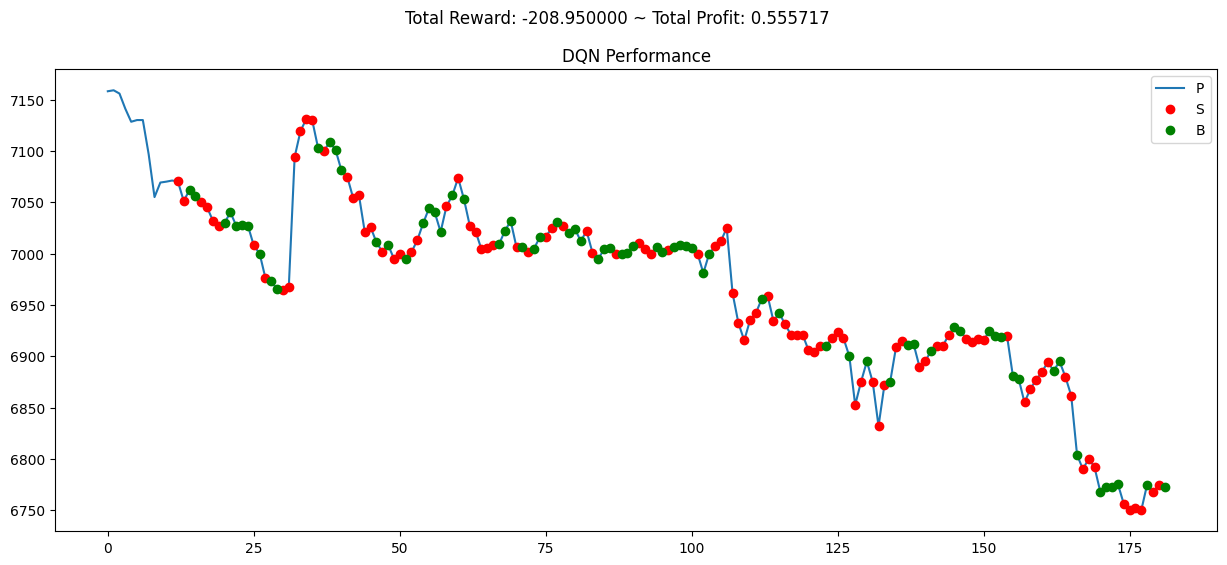

In [68]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('DQN Performance')
plt.show()